In [1]:
#######Run This
import pandas as pd
import numpy as np
import math
import json
import os
%matplotlib inline

portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

from sklearn.preprocessing import MultiLabelBinarizer

cleaned_portfolio = portfolio.copy()
cleaned_portfolio.rename(columns={'id':'offer_id'}, inplace=True)

s = cleaned_portfolio['channels']
mlb = MultiLabelBinarizer()
channels = pd.DataFrame(mlb.fit_transform(s),columns=mlb.classes_, index=cleaned_portfolio.index)

cleaned_portfolio = cleaned_portfolio.join(channels)
cleaned_portfolio.drop(['channels'], axis=1, inplace=True)
cleaned_portfolio

#profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')
profile.rename(columns={"id":"person"}, inplace=True)
undefined_group = None
cleaned_profile = None

#cleaning profile and dividing it into cleaned_profile and undefined_group
undefined_group = profile.copy()
undefined_group['gender'] = undefined_group['gender'].fillna('U')
undefined_group = undefined_group.loc[undefined_group['gender'] == 'U'].reset_index(drop=True)
cleaned_profile = profile.dropna().reset_index(drop=True)
cleaned_profile



cleaned_transcript = transcript.copy()
value = cleaned_transcript['value']
cleaned_transcript['amount'] = [int(i['amount']) if i.get('amount') else 0 for i in value]

cleaned_transcript['offer_id'] = [i['offer_id'] if i.get('offer_id') else (i['offer id'] if i.get('offer id') else '0') for i in value]

cleaned_transcript.drop(['value'], axis=1, inplace=True)

#drop the profile which have no gender or income
cleaned_transcript = cleaned_transcript[~cleaned_transcript.person.isin(undefined_group.person)]
cleaned_transcript

person            event  time  amount  \
0       78afa995795e4d85b5d9ceeca43f5fef   offer received     0       0   
2       e2127556f4f64592b11af22de27a7932   offer received     0       0   
5       389bc3fa690240e798340f5a15918d5c   offer received     0       0   
7       2eeac8d8feae4a8cad5a6af0499a211d   offer received     0       0   
8       aa4862eba776480b8bb9c68455b8c2e1   offer received     0       0   
...                                  ...              ...   ...     ...   
306527  24f56b5e1849462093931b164eb803b5  offer completed   714       0   
306529  b3a1272bc9904337b331bf348c3e8c17      transaction   714       1   
306530  68213b08d99a4ae1b0dcb72aebd9aa35      transaction   714       9   
306531  a00058cf10334a308c68e7631c529907      transaction   714       3   
306532  76ddbd6576844afe811f1a3c0fbb5bec      transaction   714       3   

                                offer_id  
0       9b98b8c7a33c4b65b9aebfe6a799e6d9  
2       2906b810c7d4411798c6938adc9daaa5  
5       f19421c1d4aa40978ebb69ca19b0e20d  
7       3f207df678b143eea3cee63160fa8bed  
8       0b1e1539f2cc45b7b9fa7c272da2e1d7  
...                                  ...  
306527  fafdcd668e3743c1bb461111dcafc2a4  
306529                                 0  
306530                                 0  
306531                                 0  
306532                                 0  

[272762 rows x 5 columns]

In [2]:
cleaned_profile

gender  age                            person  became_member_on  \
0          F   55  0610b486422d4921ae7d2bf64640c50b          20170715   
1          F   75  78afa995795e4d85b5d9ceeca43f5fef          20170509   
2          M   68  e2127556f4f64592b11af22de27a7932          20180426   
3          M   65  389bc3fa690240e798340f5a15918d5c          20180209   
4          M   58  2eeac8d8feae4a8cad5a6af0499a211d          20171111   
...      ...  ...                               ...               ...   
14820      F   45  6d5f3a774f3d4714ab0c092238f3a1d7          20180604   
14821      M   61  2cb4f97358b841b9a9773a7aa05a9d77          20180713   
14822      M   49  01d26f638c274aa0b965d24cefe3183f          20170126   
14823      F   83  9dc1421481194dcd9400aec7c9ae6366          20160307   
14824      F   62  e4052622e5ba45a8b96b59aba68cf068          20170722   

         income  
0      112000.0  
1      100000.0  
2       70000.0  
3       53000.0  
4       51000.0  
...         ...  
14820   54000.0  
14821   72000.0  
14822   73000.0  
14823   50000.0  
14824   82000.0  

[14825 rows x 5 columns]

In [3]:
cleaned_portfolio

reward  difficulty  duration     offer_type  \
0      10          10         7           bogo   
1      10          10         5           bogo   
2       0           0         4  informational   
3       5           5         7           bogo   
4       5          20        10       discount   
5       3           7         7       discount   
6       2          10        10       discount   
7       0           0         3  informational   
8       5           5         5           bogo   
9       2          10         7       discount   

                           offer_id  email  mobile  social  web  
0  ae264e3637204a6fb9bb56bc8210ddfd      1       1       1    0  
1  4d5c57ea9a6940dd891ad53e9dbe8da0      1       1       1    1  
2  3f207df678b143eea3cee63160fa8bed      1       1       0    1  
3  9b98b8c7a33c4b65b9aebfe6a799e6d9      1       1       0    1  
4  0b1e1539f2cc45b7b9fa7c272da2e1d7      1       0       0    1  
5  2298d6c36e964ae4a3e7e9706d1fb8c2      1       1       1    1  
6  fafdcd668e3743c1bb461111dcafc2a4      1       1       1    1  
7  5a8bc65990b245e5a138643cd4eb9837      1       1       1    0  
8  f19421c1d4aa40978ebb69ca19b0e20d      1       1       1    1  
9  2906b810c7d4411798c6938adc9daaa5      1       1       0    1

In [4]:
one = cleaned_transcript.loc[cleaned_transcript.person =='0610b486422d4921ae7d2bf64640c50b']
offer_received = one.loc[ one['event'] == 'offer received']
offer_viewed = one.loc[ one['event'] == 'offer viewed']
offer_completed = one.loc[ one['event'] == 'offer completed']
transaction = one.loc[ one['event'] == 'transaction']
# print(offer_received)
# print(offer_viewed)
# print(offer_completed)
# print(transaction)


In [5]:
cleaned_transcript.groupby(['person']).sum()

time  amount
person                                         
0009655768c64bdeb2e877511632db8f   9414     125
0011e0d4e6b944f998e987f904e8c1e5   6570      77
0020c2b971eb4e9188eac86d93036a77   6378     193
0020ccbbb6d84e358d3414a3ff76cffd   8622     148
003d66b6608740288d6cc97a6903f4f0  11718      40
...                                 ...     ...
fff3ba4757bd42088c044ca26d73817a   6156     574
fff7576017104bcc8677a8d63322b5e1   6528      27
fff8957ea8b240a6b5e634b6ee8eafcf   4476       9
fffad4f4828548d1b5583907f2e9906b   7524      83
ffff82501cea40309d5fdd7edcca4a07  11292     220

[14825 rows x 2 columns]

In [6]:
comb = offer_received.merge(offer_viewed,how='left', on=['person', 'offer_id'])
comb = comb.merge(offer_completed, how='left', on=['person', 'offer_id'])
comb = comb.merge(transaction, how='left', on=['person', 'time'])
#comb = comb.dropna()
comb

person         event_x  time_x  amount_x  \
0  0610b486422d4921ae7d2bf64640c50b  offer received     408         0   
1  0610b486422d4921ae7d2bf64640c50b  offer received     504         0   

                         offer_id_x event_y  time_y  amount_y  \
0  9b98b8c7a33c4b65b9aebfe6a799e6d9     NaN     NaN       NaN   
1  3f207df678b143eea3cee63160fa8bed     NaN     NaN       NaN   

           event_x   time  amount_x      event_y  amount_y offer_id_y  
0  offer completed  528.0       0.0  transaction      23.0          0  
1              NaN    NaN       NaN          NaN       NaN        NaN

In [7]:
#######Run This
sort_df = cleaned_transcript.sort_values(by=['person', 'time'])
sort_df

person            event  time  amount  \
55972   0009655768c64bdeb2e877511632db8f   offer received   168       0   
77705   0009655768c64bdeb2e877511632db8f     offer viewed   192       0   
89291   0009655768c64bdeb2e877511632db8f      transaction   228      22   
113605  0009655768c64bdeb2e877511632db8f   offer received   336       0   
139992  0009655768c64bdeb2e877511632db8f     offer viewed   372       0   
...                                  ...              ...   ...     ...   
258361  ffff82501cea40309d5fdd7edcca4a07      transaction   576      14   
258362  ffff82501cea40309d5fdd7edcca4a07  offer completed   576       0   
262475  ffff82501cea40309d5fdd7edcca4a07     offer viewed   582       0   
274809  ffff82501cea40309d5fdd7edcca4a07      transaction   606      10   
289924  ffff82501cea40309d5fdd7edcca4a07      transaction   648      18   

                                offer_id  
55972   5a8bc65990b245e5a138643cd4eb9837  
77705   5a8bc65990b245e5a138643cd4eb9837  
89291                                  0  
113605  3f207df678b143eea3cee63160fa8bed  
139992  3f207df678b143eea3cee63160fa8bed  
...                                  ...  
258361                                 0  
258362  2906b810c7d4411798c6938adc9daaa5  
262475  2906b810c7d4411798c6938adc9daaa5  
274809                                 0  
289924                                 0  

[272762 rows x 5 columns]

In [8]:
def get_valid_data(cleaned_transcript):
    complete_df = pd.DataFrame()
    comb = pd.DataFrame()
    
    offer_received = cleaned_transcript.loc[cleaned_transcript['event'] == 'offer received']
    offer_viewed = cleaned_transcript.loc[cleaned_transcript['event'] == 'offer viewed']
    offer_completed = cleaned_transcript.loc[cleaned_transcript['event'] == 'offer completed']
    transaction = cleaned_transcript.loc[cleaned_transcript['event'] == 'transaction']

    if (offer_received.empty == False) and (offer_viewed.empty == False) and (offer_completed.empty == False):
        comb = offer_received.merge(offer_viewed,how='left', on=['person', 'offer_id'])
        comb = comb.merge(offer_completed, how='left', on=['person', 'offer_id'])
        #comb = comb.merge(transaction, how='left', on=['person', 'time'])
        comb = comb.dropna()


        complete_df = pd.concat([comb, complete_df], ignore_index=True)
        complete_df = complete_df.loc[complete_df['time_x'] <= complete_df['time_y']]
        complete_df = complete_df.loc[complete_df['time_y'] <= complete_df['time']]

#         else:
#             print(persons[i], i)

       

        
    return complete_df

c = get_valid_data(sort_df)
c

person         event_x  time_x  amount_x  \
2      0011e0d4e6b944f998e987f904e8c1e5  offer received     168         0   
3      0011e0d4e6b944f998e987f904e8c1e5  offer received     408         0   
4      0011e0d4e6b944f998e987f904e8c1e5  offer received     504         0   
5      0020c2b971eb4e9188eac86d93036a77  offer received       0         0   
6      0020c2b971eb4e9188eac86d93036a77  offer received       0         0   
...                                 ...             ...     ...       ...   
59182  ffff82501cea40309d5fdd7edcca4a07  offer received     336         0   
59184  ffff82501cea40309d5fdd7edcca4a07  offer received     336         0   
59185  ffff82501cea40309d5fdd7edcca4a07  offer received     336         0   
59193  ffff82501cea40309d5fdd7edcca4a07  offer received     408         0   
59194  ffff82501cea40309d5fdd7edcca4a07  offer received     408         0   

                               offer_id       event_y  time_y  amount_y  \
2      2298d6c36e964ae4a3e7e9706d1fb8c2  offer viewed   186.0       0.0   
3      0b1e1539f2cc45b7b9fa7c272da2e1d7  offer viewed   432.0       0.0   
4      9b98b8c7a33c4b65b9aebfe6a799e6d9  offer viewed   516.0       0.0   
5      fafdcd668e3743c1bb461111dcafc2a4  offer viewed    12.0       0.0   
6      fafdcd668e3743c1bb461111dcafc2a4  offer viewed    12.0       0.0   
...                                 ...           ...     ...       ...   
59182  2906b810c7d4411798c6938adc9daaa5  offer viewed   354.0       0.0   
59184  2906b810c7d4411798c6938adc9daaa5  offer viewed   414.0       0.0   
59185  2906b810c7d4411798c6938adc9daaa5  offer viewed   414.0       0.0   
59193  2906b810c7d4411798c6938adc9daaa5  offer viewed   414.0       0.0   
59194  2906b810c7d4411798c6938adc9daaa5  offer viewed   414.0       0.0   

                 event   time  amount  
2      offer completed  252.0     0.0  
3      offer completed  576.0     0.0  
4      offer completed  576.0     0.0  
5      offer completed   54.0     0.0  
6      offer completed  510.0     0.0  
...                ...    ...     ...  
59182  offer completed  576.0     0.0  
59184  offer completed  414.0     0.0  
59185  offer completed  576.0     0.0  
59193  offer completed  414.0     0.0  
59194  offer completed  576.0     0.0  

[32772 rows x 11 columns]

In [9]:
def valid_offer_completed(df, cleaned_portfolio):
    df = df.rename(columns={"offer_id_x":"offer_id"})
    offers = cleaned_portfolio[['offer_id', 'offer_type', 'duration']]
    df = df.merge(offers,how='left', on='offer_id')
    
    
    
    df['response'] = np.where((df['time'] - df['time_x'])/24 > df['duration'] , 0, 1)
    
    df =  df.loc[df.response == 1]
    
    df = df.drop(['amount_x', 'amount_y', 'amount', 'response', 'event_x', 'event_y', 'event'], axis=1).reset_index(drop=True)
    df = df[['person','offer_id','time_x','time_y', 'time', 'offer_type', 'duration']]
    return df

valid_data = valid_offer_completed(c, cleaned_portfolio)
valid_data

person                          offer_id  \
0      0011e0d4e6b944f998e987f904e8c1e5  2298d6c36e964ae4a3e7e9706d1fb8c2   
1      0011e0d4e6b944f998e987f904e8c1e5  0b1e1539f2cc45b7b9fa7c272da2e1d7   
2      0011e0d4e6b944f998e987f904e8c1e5  9b98b8c7a33c4b65b9aebfe6a799e6d9   
3      0020c2b971eb4e9188eac86d93036a77  fafdcd668e3743c1bb461111dcafc2a4   
4      0020c2b971eb4e9188eac86d93036a77  4d5c57ea9a6940dd891ad53e9dbe8da0   
...                                 ...                               ...   
24789  ffff82501cea40309d5fdd7edcca4a07  2906b810c7d4411798c6938adc9daaa5   
24790  ffff82501cea40309d5fdd7edcca4a07  2906b810c7d4411798c6938adc9daaa5   
24791  ffff82501cea40309d5fdd7edcca4a07  2906b810c7d4411798c6938adc9daaa5   
24792  ffff82501cea40309d5fdd7edcca4a07  2906b810c7d4411798c6938adc9daaa5   
24793  ffff82501cea40309d5fdd7edcca4a07  2906b810c7d4411798c6938adc9daaa5   

       time_x  time_y   time offer_type  duration  
0         168   186.0  252.0   discount         7  
1         408   432.0  576.0   discount        10  
2         504   516.0  576.0       bogo         7  
3           0    12.0   54.0   discount        10  
4         408   426.0  510.0       bogo         5  
...       ...     ...    ...        ...       ...  
24789     336   354.0  384.0   discount         7  
24790     336   354.0  414.0   discount         7  
24791     336   414.0  414.0   discount         7  
24792     408   414.0  414.0   discount         7  
24793     408   414.0  576.0   discount         7  

[24794 rows x 7 columns]

In [10]:
# total_amount spent by each user
# (Done)No.of offers received
# (Daone)No.of offers completed
# (Done)completion rat
# (Done)Bogo, informational, discount => count of each offer_type received
# (Done)All these has to be added to the cleaned_profile

# (Done)Now add informational offers to the valid_data
# (Done)Remove the unnecessary columns
# Create Dendogram
# Perform PCA and capture 90% or above variance
# Perform K-means abnd visualize the clusters 
# Perform Agglomerative clustering and visulaize that data and compare it with k-means

# Now we have data for each customer i.e unique profiles --> cleaned_profiles
# Shuffle that data and divide it into training, validation and test sets
# Using Xgboost algorithm get how much a user is willing to pay 
# Determine the accuracy of the model
# if time persists apply it on more Model like SVM or something
# select the best model
# Create a blog on the results 
# Submit the project



def info_offer(df):
    df_clean = df[df['offer_id'].isin(['3f207df678b143eea3cee63160fa8bed', '5a8bc65990b245e5a138643cd4eb9837'])]
    print(df_clean.shape)
    offer_received = df_clean.loc[df_clean['event'] == 'offer received']
    offer_viewed = df_clean.loc[df_clean['event'] == 'offer viewed']
    
    comb = offer_received.merge(offer_viewed,how='left', on=['person', 'offer_id'])
    

    offers = cleaned_portfolio[['offer_id', 'offer_type', 'duration']]
    comb = comb.merge(offers,how='left', on='offer_id')
    comb = comb[comb.time_x <= comb.time_y]
    comb['time'] = comb['time_x'] + comb['duration'] * 24
    comb['response'] = np.where((comb['time_y'] - comb['time_x']) > comb['duration']*24 , 0, 1)
    comb = comb.loc[comb.response == 1]
    
    
    comb = comb.drop(['response', 'amount_x', 'amount_y', 'event_x', 'event_y'], axis=1).reset_index(drop=True)
    comb = comb[['person','offer_id','time_x','time_y', 'time', 'offer_type', 'duration']]
        
    
    return comb
    
info_data = info_offer(sort_df)
info_data

(22660, 5)


person                          offer_id  \
0     0009655768c64bdeb2e877511632db8f  5a8bc65990b245e5a138643cd4eb9837   
1     0009655768c64bdeb2e877511632db8f  3f207df678b143eea3cee63160fa8bed   
2     0011e0d4e6b944f998e987f904e8c1e5  3f207df678b143eea3cee63160fa8bed   
3     0011e0d4e6b944f998e987f904e8c1e5  5a8bc65990b245e5a138643cd4eb9837   
4     0020ccbbb6d84e358d3414a3ff76cffd  5a8bc65990b245e5a138643cd4eb9837   
...                                ...                               ...   
8656  ffeaa02452ef451082a0361c3ca62ef5  5a8bc65990b245e5a138643cd4eb9837   
8657  ffeaa02452ef451082a0361c3ca62ef5  5a8bc65990b245e5a138643cd4eb9837   
8658  fff0f0aac6c547b9b263080f09a5586a  3f207df678b143eea3cee63160fa8bed   
8659  fff3ba4757bd42088c044ca26d73817a  5a8bc65990b245e5a138643cd4eb9837   
8660  fffad4f4828548d1b5583907f2e9906b  5a8bc65990b245e5a138643cd4eb9837   

      time_x  time_y  time     offer_type  duration  
0        168   192.0   240  informational         3  
1        336   372.0   432  informational         4  
2          0     6.0    96  informational         4  
3        336   354.0   408  informational         3  
4        408   408.0   480  informational         3  
...      ...     ...   ...            ...       ...  
8656     168   198.0   240  informational         3  
8657     408   420.0   480  informational         3  
8658     576   636.0   672  informational         4  
8659     504   540.0   576  informational         3  
8660     168   168.0   240  informational         3  

[8661 rows x 7 columns]

In [11]:
channels = cleaned_portfolio[['offer_id', 'web','mobile', 'social']]
complete_df = pd.concat([valid_data, info_data], ignore_index=True)
complete_df = complete_df.merge(channels,how='left', on='offer_id')
complete_df

person                          offer_id  \
0      0011e0d4e6b944f998e987f904e8c1e5  2298d6c36e964ae4a3e7e9706d1fb8c2   
1      0011e0d4e6b944f998e987f904e8c1e5  0b1e1539f2cc45b7b9fa7c272da2e1d7   
2      0011e0d4e6b944f998e987f904e8c1e5  9b98b8c7a33c4b65b9aebfe6a799e6d9   
3      0020c2b971eb4e9188eac86d93036a77  fafdcd668e3743c1bb461111dcafc2a4   
4      0020c2b971eb4e9188eac86d93036a77  4d5c57ea9a6940dd891ad53e9dbe8da0   
...                                 ...                               ...   
33450  ffeaa02452ef451082a0361c3ca62ef5  5a8bc65990b245e5a138643cd4eb9837   
33451  ffeaa02452ef451082a0361c3ca62ef5  5a8bc65990b245e5a138643cd4eb9837   
33452  fff0f0aac6c547b9b263080f09a5586a  3f207df678b143eea3cee63160fa8bed   
33453  fff3ba4757bd42088c044ca26d73817a  5a8bc65990b245e5a138643cd4eb9837   
33454  fffad4f4828548d1b5583907f2e9906b  5a8bc65990b245e5a138643cd4eb9837   

       time_x  time_y   time     offer_type  duration  web  mobile  social  
0         168   186.0  252.0       discount         7    1       1       1  
1         408   432.0  576.0       discount        10    1       0       0  
2         504   516.0  576.0           bogo         7    1       1       0  
3           0    12.0   54.0       discount        10    1       1       1  
4         408   426.0  510.0           bogo         5    1       1       1  
...       ...     ...    ...            ...       ...  ...     ...     ...  
33450     168   198.0  240.0  informational         3    0       1       1  
33451     408   420.0  480.0  informational         3    0       1       1  
33452     576   636.0  672.0  informational         4    1       1       0  
33453     504   540.0  576.0  informational         3    0       1       1  
33454     168   168.0  240.0  informational         3    0       1       1  

[33455 rows x 10 columns]

In [12]:
grouped_data = complete_df.groupby(['person'])
if '389bc3fa690240e798340f5a15918d5c' in grouped_data.groups.keys():
    print(grouped_data.get_group('389bc3fa690240e798340f5a15918d5c')['offer_type'].value_counts().sum())
    print('yes go ahead')
else:
    print('go back bitch')
        

5
yes go ahead


In [12]:
#######Run This


df = None
def fill_profile(gd, df):
    grouped_data = gd.groupby(['person'])
    
    invalid = []
    for index, row in df.iterrows():
        if row['person'] in grouped_data.groups.keys():
            offers = grouped_data.get_group(row['person'])['offer_type'].value_counts()
            df.at[index, 'offers completed'] = offers.sum()
            
            
            channel_mobile = grouped_data.get_group(row['person'])['mobile']
            df.at[index, 'mobile'] = channel_mobile.sum()
            channel_web = grouped_data.get_group(row['person'])['web']
            df.at[index, 'web'] = channel_web.sum()
            channel_social = grouped_data.get_group(row['person'])['social']
            df.at[index, 'social'] = channel_social.sum()
            
            for offer, count in offers.items():
                df.at[index, offer] = count
                
        else:
            invalid.append(row['person'])
    print(len(invalid))
    df = df.fillna(0)
    return df
    
# df = fill_profile(complete_df, cleaned_profile)
# df

In [13]:
#######Run This


#new_df = cleaned_transcript.groupby(['person', 'event'])
def find_data(gd, df):
    gd = gd[(gd.event == 'offer received')].reset_index(drop=True)
    grouped_data = gd.groupby(['person'])

    
    for index, row in df.iterrows():
        if row['person'] in grouped_data.groups.keys():
            events = grouped_data.get_group(row['person'])['event'].count()
            df.at[index, 'offers received'] = events
            df.at[index, 'completion rate'] = row['offers completed'] * 100 / events
            
    return df
    
# df = find_data(cleaned_transcript, df)
# df

In [ ]:
##Testing code starts

In [528]:
new_df = cleaned_transcript[(cleaned_transcript.event == 'offer viewed')].reset_index(drop=True)
new_df = new_df.groupby(['person'])
new_df.get_group('fffad4f4828548d1b5583907f2e9906b')['event']

1777     offer viewed
8616     offer viewed
35062    offer viewed
49178    offer viewed
Name: event, dtype: object

In [148]:
df[df['completion rate'] > 100]

gender  age                            person  became_member_on  \
43         M   44  b7a66e629b134079a9bc7120c7b9947b          20170924   
49         M   67  2e87ba0fba1a4d1a8614af771f07a94d          20170226   
66         F   74  2c5c63e5124e417b8504f76c868a4190          20151224   
82         F   19  1abeb816d9fa49b4b5b5ae51bc3d24c3          20161015   
86         M   52  94f14dcfedba47e18b7efca13dd7574b          20170515   
...      ...  ...                               ...               ...   
14695      F   57  86d03d35d7e0434b935e7743e83be3a0          20161226   
14716      F   75  6d9ab08312224d7699d7c2a10e01d1d6          20160521   
14750      M   48  2e33545f0a764d27b2ccff95fc8d72c4          20160510   
14777      M   37  986d627671cc4bcf933079194b5f4f77          20170124   
14807      F   39  122c0c2a3c2540848f8c3fdc37e97639          20160921   

         income  offers completed  bogo  informational  discount  \
43      35000.0               5.0   1.0            0.0       4.0   
49      76000.0               7.0   1.0            1.0       5.0   
66     107000.0              11.0   0.0            0.0      11.0   
82      73000.0               6.0   0.0            0.0       6.0   
86      78000.0               6.0   2.0            0.0       4.0   
...         ...               ...   ...            ...       ...   
14695   53000.0               7.0   1.0            2.0       4.0   
14716   83000.0               6.0   1.0            0.0       5.0   
14750   64000.0               6.0   5.0            0.0       1.0   
14777   60000.0               7.0   2.0            0.0       5.0   
14807   54000.0               8.0   1.0            1.0       6.0   

       offers received  completion rate  
43                 4.0       125.000000  
49                 5.0       140.000000  
66                 5.0       220.000000  
82                 5.0       120.000000  
86                 5.0       120.000000  
...                ...              ...  
14695              6.0       116.666667  
14716              4.0       150.000000  
14750              5.0       120.000000  
14777              5.0       140.000000  
14807              4.0       200.000000  

[474 rows x 11 columns]

In [16]:
person = 'b7a66e629b134079a9bc7120c7b9947b'
sort_df[complete.person == person]

NameError: name 'complete' is not defined

In [68]:
eg1 = sort_df[(sort_df.person == person) & (sort_df.event == 'offer received')].reset_index(drop=True) 
eg1

person           event  time  amount  \
0  0009655768c64bdeb2e877511632db8f  offer received   168       0   
1  0009655768c64bdeb2e877511632db8f  offer received   336       0   
2  0009655768c64bdeb2e877511632db8f  offer received   408       0   
3  0009655768c64bdeb2e877511632db8f  offer received   504       0   
4  0009655768c64bdeb2e877511632db8f  offer received   576       0   

                           offer_id  
0  5a8bc65990b245e5a138643cd4eb9837  
1  3f207df678b143eea3cee63160fa8bed  
2  f19421c1d4aa40978ebb69ca19b0e20d  
3  fafdcd668e3743c1bb461111dcafc2a4  
4  2906b810c7d4411798c6938adc9daaa5

In [69]:
eg2 = sort_df[(sort_df.person == person) & (sort_df.event == 'offer viewed')].reset_index(drop=True)
eg2

person         event  time  amount  \
0  0009655768c64bdeb2e877511632db8f  offer viewed   192       0   
1  0009655768c64bdeb2e877511632db8f  offer viewed   372       0   
2  0009655768c64bdeb2e877511632db8f  offer viewed   456       0   
3  0009655768c64bdeb2e877511632db8f  offer viewed   540       0   

                           offer_id  
0  5a8bc65990b245e5a138643cd4eb9837  
1  3f207df678b143eea3cee63160fa8bed  
2  f19421c1d4aa40978ebb69ca19b0e20d  
3  fafdcd668e3743c1bb461111dcafc2a4

In [70]:
eg3 = sort_df[(sort_df.person == person) & (sort_df.event == 'offer completed')].reset_index(drop=True)
eg3

person            event  time  amount  \
0  0009655768c64bdeb2e877511632db8f  offer completed   414       0   
1  0009655768c64bdeb2e877511632db8f  offer completed   528       0   
2  0009655768c64bdeb2e877511632db8f  offer completed   576       0   

                           offer_id  
0  f19421c1d4aa40978ebb69ca19b0e20d  
1  fafdcd668e3743c1bb461111dcafc2a4  
2  2906b810c7d4411798c6938adc9daaa5

In [13]:
sort_df[sort_df.person == person]

NameError: name 'person' is not defined

In [252]:
sort_df[sort_df.event == 'offer completed']

person            event  time  amount  \
168413  0009655768c64bdeb2e877511632db8f  offer completed   414       0   
228423  0009655768c64bdeb2e877511632db8f  offer completed   528       0   
258884  0009655768c64bdeb2e877511632db8f  offer completed   576       0   
95422   0011e0d4e6b944f998e987f904e8c1e5  offer completed   252       0   
258980  0011e0d4e6b944f998e987f904e8c1e5  offer completed   576       0   
...                                  ...              ...   ...     ...   
79668   ffff82501cea40309d5fdd7edcca4a07  offer completed   198       0   
143788  ffff82501cea40309d5fdd7edcca4a07  offer completed   384       0   
168024  ffff82501cea40309d5fdd7edcca4a07  offer completed   414       0   
214717  ffff82501cea40309d5fdd7edcca4a07  offer completed   504       0   
258362  ffff82501cea40309d5fdd7edcca4a07  offer completed   576       0   

                                offer_id  
168413  f19421c1d4aa40978ebb69ca19b0e20d  
228423  fafdcd668e3743c1bb461111dcafc2a4  
258884  2906b810c7d4411798c6938adc9daaa5  
95422   2298d6c36e964ae4a3e7e9706d1fb8c2  
258980  0b1e1539f2cc45b7b9fa7c272da2e1d7  
...                                  ...  
79668   0b1e1539f2cc45b7b9fa7c272da2e1d7  
143788  2906b810c7d4411798c6938adc9daaa5  
168024  2906b810c7d4411798c6938adc9daaa5  
214717  9b98b8c7a33c4b65b9aebfe6a799e6d9  
258362  2906b810c7d4411798c6938adc9daaa5  

[32444 rows x 5 columns]

In [253]:
complete_df.shape

(33455, 7)

In [336]:
# comb = eg1.merge(eg2, on=['person' , 'offer_id'])
# comb = comb.merge(eg3, on=['person', 'offer_id'])
# #comb = comb.dropna()
# comb

eg1['g'] = eg1.groupby('offer_id').cumcount()
eg2['g'] = eg2.groupby('offer_id').cumcount()
eg3['g'] = eg3.groupby('offer_id').cumcount()


result = None
result = pd.merge(eg1, eg2, on=['person', 'offer_id', 'g'], how='outer')
result = pd.merge(result, eg3, on=['person', 'offer_id', 'g'], how='outer')
result = result.dropna()
result

person         event_x  time_x  amount_x  \
0  00840a2ca5d2408e982d56544dc14ffd  offer received       0         0   
1  00840a2ca5d2408e982d56544dc14ffd  offer received     168         0   

                           offer_id  g       event_y  time_y  amount_y  \
0  2906b810c7d4411798c6938adc9daaa5  0  offer viewed   510.0       0.0   
1  fafdcd668e3743c1bb461111dcafc2a4  0  offer viewed   204.0       0.0   

             event   time  amount  
0  offer completed  540.0     0.0  
1  offer completed  246.0     0.0

In [15]:
def get_valid_data2(cleaned_transcript):
    complete_df = pd.DataFrame()
    comb = pd.DataFrame()
    
    offer_received = cleaned_transcript.loc[cleaned_transcript['event'] == 'offer received'].reset_index(drop=True)
    offer_viewed = cleaned_transcript.loc[cleaned_transcript['event'] == 'offer viewed'].reset_index(drop=True)
    offer_completed = cleaned_transcript.loc[cleaned_transcript['event'] == 'offer completed'].reset_index(drop=True)
    transaction = cleaned_transcript.loc[cleaned_transcript['event'] == 'transaction'].reset_index(drop=True)

    if (offer_received.empty == False) and (offer_viewed.empty == False) and (offer_completed.empty == False):
        comb = offer_received.merge(offer_viewed, right_index=True, left_index=True)
        comb = comb.merge(offer_completed, right_index=True, left_index=True)
        #comb = comb.merge(transaction, how='left', on=['person', 'time'])
        #comb = comb.dropna()


        
    return comb

sample = get_valid_data2(sort_df)
sample

person_x         event_x  time_x  amount_x  \
0      0009655768c64bdeb2e877511632db8f  offer received     168         0   
1      0009655768c64bdeb2e877511632db8f  offer received     336         0   
2      0009655768c64bdeb2e877511632db8f  offer received     408         0   
3      0009655768c64bdeb2e877511632db8f  offer received     504         0   
4      0009655768c64bdeb2e877511632db8f  offer received     576         0   
...                                 ...             ...     ...       ...   
32439  7cfe16f1771d49949bb1003075194e27  offer received       0         0   
32440  7cfe16f1771d49949bb1003075194e27  offer received     168         0   
32441  7cfe16f1771d49949bb1003075194e27  offer received     336         0   
32442  7cfe16f1771d49949bb1003075194e27  offer received     408         0   
32443  7cfe16f1771d49949bb1003075194e27  offer received     504         0   

                             offer_id_x                          person_y  \
0      5a8bc65990b245e5a138643cd4eb9837  0009655768c64bdeb2e877511632db8f   
1      3f207df678b143eea3cee63160fa8bed  0009655768c64bdeb2e877511632db8f   
2      f19421c1d4aa40978ebb69ca19b0e20d  0009655768c64bdeb2e877511632db8f   
3      fafdcd668e3743c1bb461111dcafc2a4  0009655768c64bdeb2e877511632db8f   
4      2906b810c7d4411798c6938adc9daaa5  0011e0d4e6b944f998e987f904e8c1e5   
...                                 ...                               ...   
32439  4d5c57ea9a6940dd891ad53e9dbe8da0  a5a0645e00a64608a5cdc6073c440f9c   
32440  2906b810c7d4411798c6938adc9daaa5  a5a0645e00a64608a5cdc6073c440f9c   
32441  2298d6c36e964ae4a3e7e9706d1fb8c2  a5a0645e00a64608a5cdc6073c440f9c   
32442  5a8bc65990b245e5a138643cd4eb9837  a5a0645e00a64608a5cdc6073c440f9c   
32443  f19421c1d4aa40978ebb69ca19b0e20d  a5a0645e00a64608a5cdc6073c440f9c   

            event_y  time_y  amount_y                        offer_id_y  \
0      offer viewed     192         0  5a8bc65990b245e5a138643cd4eb9837   
1      offer viewed     372         0  3f207df678b143eea3cee63160fa8bed   
2      offer viewed     456         0  f19421c1d4aa40978ebb69ca19b0e20d   
3      offer viewed     540         0  fafdcd668e3743c1bb461111dcafc2a4   
4      offer viewed       6         0  3f207df678b143eea3cee63160fa8bed   
...             ...     ...       ...                               ...   
32439  offer viewed      36         0  3f207df678b143eea3cee63160fa8bed   
32440  offer viewed     186         0  2298d6c36e964ae4a3e7e9706d1fb8c2   
32441  offer viewed     354         0  2906b810c7d4411798c6938adc9daaa5   
32442  offer viewed     414         0  2298d6c36e964ae4a3e7e9706d1fb8c2   
32443  offer viewed     576         0  fafdcd668e3743c1bb461111dcafc2a4   

                                 person            event  time  amount  \
0      0009655768c64bdeb2e877511632db8f  offer completed   414       0   
1      0009655768c64bdeb2e877511632db8f  offer completed   528       0   
2      0009655768c64bdeb2e877511632db8f  offer completed   576       0   
3      0011e0d4e6b944f998e987f904e8c1e5  offer completed   252       0   
4      0011e0d4e6b944f998e987f904e8c1e5  offer completed   576       0   
...                                 ...              ...   ...     ...   
32439  ffff82501cea40309d5fdd7edcca4a07  offer completed   198       0   
32440  ffff82501cea40309d5fdd7edcca4a07  offer completed   384       0   
32441  ffff82501cea40309d5fdd7edcca4a07  offer completed   414       0   
32442  ffff82501cea40309d5fdd7edcca4a07  offer completed   504       0   
32443  ffff82501cea40309d5fdd7edcca4a07  offer completed   576       0   

                               offer_id  
0      f19421c1d4aa40978ebb69ca19b0e20d  
1      fafdcd668e3743c1bb461111dcafc2a4  
2      2906b810c7d4411798c6938adc9daaa5  
3      2298d6c36e964ae4a3e7e9706d1fb8c2  
4      0b1e1539f2cc45b7b9fa7c272da2e1d7  
...                                 ...  
32439  0b1e1539f2cc45b7b9fa7c272da2e1d7  
32440  2906b810c7d4411798c6938adc9daaa5  
32441  2906b8

In [292]:
def get_valid_data3(df):
    
    list_df = list(df.groupby('person'))
    result = pd.DataFrame()
    
    for i in range(len(list_df)):
        person = list_df[i][0]
        person_df = list_df[i][1]
        offer_received = person_df.loc[person_df['event'] == 'offer received'].reset_index(drop=True)
        offer_viewed = cleaned_transcript.loc[cleaned_transcript['event'] == 'offer viewed'].reset_index(drop=True)
        offer_completed = cleaned_transcript.loc[cleaned_transcript['event'] == 'offer completed'].reset_index(drop=True)
        
    
        offer_received['g'] = offer_received.groupby('offer_id').cumcount()
        offer_viewed['g'] = offer_viewed.groupby('offer_id').cumcount()
        offer_completed['g'] = offer_completed.groupby('offer_id').cumcount()
        
        print(i)



        r = pd.merge(offer_received, offer_viewed, on=['person', 'offer_id', 'g'], how='left')
        r = pd.merge(r, offer_completed, on=['person', 'offer_id', 'g'], how='left')
        result = result.append(r, ignore_index = True) 


        
    return result

sample2 = get_valid_data3(sort_df[-(sort_df.event == 'transaction')])
sample2

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699


5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338


6778
6779
6780
6781
6782
6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977


8417
8418
8419
8420
8421
8422
8423
8424
8425
8426
8427
8428
8429
8430
8431
8432
8433
8434
8435
8436
8437
8438
8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616


10047
10048
10049
10050
10051
10052
10053
10054
10055
10056
10057
10058
10059
10060
10061
10062
10063
10064
10065
10066
10067
10068
10069
10070
10071
10072
10073
10074
10075
10076
10077
10078
10079
10080
10081
10082
10083
10084
10085
10086
10087
10088
10089
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
1021

11413
11414
11415
11416
11417
11418
11419
11420
11421
11422
11423
11424
11425
11426
11427
11428
11429
11430
11431
11432
11433
11434
11435
11436
11437
11438
11439
11440
11441
11442
11443
11444
11445
11446
11447
11448
11449
11450
11451
11452
11453
11454
11455
11456
11457
11458
11459
11460
11461
11462
11463
11464
11465
11466
11467
11468
11469
11470
11471
11472
11473
11474
11475
11476
11477
11478
11479
11480
11481
11482
11483
11484
11485
11486
11487
11488
11489
11490
11491
11492
11493
11494
11495
11496
11497
11498
11499
11500
11501
11502
11503
11504
11505
11506
11507
11508
11509
11510
11511
11512
11513
11514
11515
11516
11517
11518
11519
11520
11521
11522
11523
11524
11525
11526
11527
11528
11529
11530
11531
11532
11533
11534
11535
11536
11537
11538
11539
11540
11541
11542
11543
11544
11545
11546
11547
11548
11549
11550
11551
11552
11553
11554
11555
11556
11557
11558
11559
11560
11561
11562
11563
11564
11565
11566
11567
11568
11569
11570
11571
11572
11573
11574
11575
11576
11577
11578
1157

12779
12780
12781
12782
12783
12784
12785
12786
12787
12788
12789
12790
12791
12792
12793
12794
12795
12796
12797
12798
12799
12800
12801
12802
12803
12804
12805
12806
12807
12808
12809
12810
12811
12812
12813
12814
12815
12816
12817
12818
12819
12820
12821
12822
12823
12824
12825
12826
12827
12828
12829
12830
12831
12832
12833
12834
12835
12836
12837
12838
12839
12840
12841
12842
12843
12844
12845
12846
12847
12848
12849
12850
12851
12852
12853
12854
12855
12856
12857
12858
12859
12860
12861
12862
12863
12864
12865
12866
12867
12868
12869
12870
12871
12872
12873
12874
12875
12876
12877
12878
12879
12880
12881
12882
12883
12884
12885
12886
12887
12888
12889
12890
12891
12892
12893
12894
12895
12896
12897
12898
12899
12900
12901
12902
12903
12904
12905
12906
12907
12908
12909
12910
12911
12912
12913
12914
12915
12916
12917
12918
12919
12920
12921
12922
12923
12924
12925
12926
12927
12928
12929
12930
12931
12932
12933
12934
12935
12936
12937
12938
12939
12940
12941
12942
12943
12944
1294

14145
14146
14147
14148
14149
14150
14151
14152
14153
14154
14155
14156
14157
14158
14159
14160
14161
14162
14163
14164
14165
14166
14167
14168
14169
14170
14171
14172
14173
14174
14175
14176
14177
14178
14179
14180
14181
14182
14183
14184
14185
14186
14187
14188
14189
14190
14191
14192
14193
14194
14195
14196
14197
14198
14199
14200
14201
14202
14203
14204
14205
14206
14207
14208
14209
14210
14211
14212
14213
14214
14215
14216
14217
14218
14219
14220
14221
14222
14223
14224
14225
14226
14227
14228
14229
14230
14231
14232
14233
14234
14235
14236
14237
14238
14239
14240
14241
14242
14243
14244
14245
14246
14247
14248
14249
14250
14251
14252
14253
14254
14255
14256
14257
14258
14259
14260
14261
14262
14263
14264
14265
14266
14267
14268
14269
14270
14271
14272
14273
14274
14275
14276
14277
14278
14279
14280
14281
14282
14283
14284
14285
14286
14287
14288
14289
14290
14291
14292
14293
14294
14295
14296
14297
14298
14299
14300
14301
14302
14303
14304
14305
14306
14307
14308
14309
14310
1431

person         event_x  time_x  amount_x  \
0      0009655768c64bdeb2e877511632db8f  offer received     168         0   
1      0009655768c64bdeb2e877511632db8f  offer received     336         0   
2      0009655768c64bdeb2e877511632db8f  offer received     408         0   
3      0009655768c64bdeb2e877511632db8f  offer received     504         0   
4      0009655768c64bdeb2e877511632db8f  offer received     576         0   
...                                 ...             ...     ...       ...   
66496  ffff82501cea40309d5fdd7edcca4a07  offer received     168         0   
66497  ffff82501cea40309d5fdd7edcca4a07  offer received     336         0   
66498  ffff82501cea40309d5fdd7edcca4a07  offer received     408         0   
66499  ffff82501cea40309d5fdd7edcca4a07  offer received     504         0   
66500  ffff82501cea40309d5fdd7edcca4a07  offer received     576         0   

                               offer_id  g event_y  time_y  amount_y event  \
0      5a8bc65990b245e5a138643cd4eb9837  0     NaN     NaN       NaN   NaN   
1      3f207df678b143eea3cee63160fa8bed  0     NaN     NaN       NaN   NaN   
2      f19421c1d4aa40978ebb69ca19b0e20d  0     NaN     NaN       NaN   NaN   
3      fafdcd668e3743c1bb461111dcafc2a4  0     NaN     NaN       NaN   NaN   
4      2906b810c7d4411798c6938adc9daaa5  0     NaN     NaN       NaN   NaN   
...                                 ... ..     ...     ...       ...   ...   
66496  0b1e1539f2cc45b7b9fa7c272da2e1d7  0     NaN     NaN       NaN   NaN   
66497  2906b810c7d4411798c6938adc9daaa5  0     NaN     NaN       NaN   NaN   
66498  2906b810c7d4411798c6938adc9daaa5  1     NaN     NaN       NaN   NaN   
66499  9b98b8c7a33c4b65b9aebfe6a799e6d9  0     NaN     NaN       NaN   NaN   
66500  2906b810c7d4411798c6938adc9daaa5  2     NaN     NaN       NaN   NaN   

       time  amount  
0       NaN     NaN  
1       NaN     NaN  
2       NaN     NaN  
3       NaN     NaN  
4       NaN     NaN  
...     ...     ...  
66496   NaN     NaN  
66497   NaN     NaN  
66498   NaN     NaN  
66499   NaN     NaN  
66500   NaN     NaN  

[66501 rows x 12 columns]

In [279]:
list_df = list(sort_df.groupby('person'))
list_df[0][0]

('0009655768c64bdeb2e877511632db8f',
                                   person            event  time  amount  \
 55972   0009655768c64bdeb2e877511632db8f   offer received   168       0   
 77705   0009655768c64bdeb2e877511632db8f     offer viewed   192       0   
 89291   0009655768c64bdeb2e877511632db8f      transaction   228      22   
 113605  0009655768c64bdeb2e877511632db8f   offer received   336       0   
 139992  0009655768c64bdeb2e877511632db8f     offer viewed   372       0   
 153401  0009655768c64bdeb2e877511632db8f   offer received   408       0   
 168412  0009655768c64bdeb2e877511632db8f      transaction   414       8   
 168413  0009655768c64bdeb2e877511632db8f  offer completed   414       0   
 187554  0009655768c64bdeb2e877511632db8f     offer viewed   456       0   
 204340  0009655768c64bdeb2e877511632db8f   offer received   504       0   
 228422  0009655768c64bdeb2e877511632db8f      transaction   528      14   
 228423  0009655768c64bdeb2e877511632db8f  offer co

In [16]:
#######Run This
def get_valid_data4(df):
        
    offer_received = df.loc[df['event'] == 'offer received'].reset_index(drop=True)
    offer_viewed = df.loc[df['event'] == 'offer viewed'].reset_index(drop=True)
    offer_completed = df.loc[df['event'] == 'offer completed'].reset_index(drop=True)


    offer_received['g'] = offer_received.groupby('offer_id').cumcount()
    offer_viewed['g'] = offer_viewed.groupby('offer_id').cumcount()
    offer_completed['g'] = offer_completed.groupby('offer_id').cumcount()
        

    res = pd.merge(offer_received, offer_viewed, on=['person', 'offer_id', 'g'], how='outer')
    res = pd.merge(res, offer_completed, on=['person', 'offer_id', 'g'], how='outer')

        
    return res

In [17]:
#######Run This

a  = sort_df.groupby('person').apply(lambda x: get_valid_data4(x))

In [18]:
#######Run This

a = a.dropna()
a

person  \
person                                                                 
0009655768c64bdeb2e877511632db8f 2  0009655768c64bdeb2e877511632db8f   
                                 3  0009655768c64bdeb2e877511632db8f   
0011e0d4e6b944f998e987f904e8c1e5 1  0011e0d4e6b944f998e987f904e8c1e5   
                                 3  0011e0d4e6b944f998e987f904e8c1e5   
                                 4  0011e0d4e6b944f998e987f904e8c1e5   
...                                                              ...   
ffff82501cea40309d5fdd7edcca4a07 1  ffff82501cea40309d5fdd7edcca4a07   
                                 2  ffff82501cea40309d5fdd7edcca4a07   
                                 3  ffff82501cea40309d5fdd7edcca4a07   
                                 4  ffff82501cea40309d5fdd7edcca4a07   
                                 5  ffff82501cea40309d5fdd7edcca4a07   

                                           event_x  time_x  amount_x  \
person                                                                 
0009655768c64bdeb2e877511632db8f 2  offer received     408         0   
                                 3  offer received     504         0   
0011e0d4e6b944f998e987f904e8c1e5 1  offer received     168         0   
                                 3  offer received     408         0   
                                 4  offer received     504         0   
...                                            ...     ...       ...   
ffff82501cea40309d5fdd7edcca4a07 1  offer received     168         0   
                                 2  offer received     336         0   
                                 3  offer received     408         0   
                                 4  offer received     504         0   
                                 5  offer received     576         0   

                                                            offer_id  g  \
person                                                                    
0009655768c64bdeb2e877511632db8f 2  f19421c1d4aa40978ebb69ca19b0e20d  0   
                                 3  fafdcd668e3743c1bb461111dcafc2a4  0   
0011e0d4e6b944f998e987f904e8c1e5 1  2298d6c36e964ae4a3e7e9706d1fb8c2  0   
                                 3  0b1e1539f2cc45b7b9fa7c272da2e1d7  0   
                                 4  9b98b8c7a33c4b65b9aebfe6a799e6d9  0   
...                                                              ... ..   
ffff82501cea40309d5fdd7edcca4a07 1  0b1e1539f2cc45b7b9fa7c272da2e1d7  0   
                                 2  2906b810c7d4411798c6938adc9daaa5  0   
                                 3  2906b810c7d4411798c6938adc9daaa5  1   
                                 4  9b98b8c7a33c4b65b9aebfe6a799e6d9  0   
                                 5  2906b810c7d4411798c6938adc9daaa5  2   

                                         event_y  time_y  amount_y  \
person                                                               
0009655768c64bdeb2e877511632db8f 2  offer viewed   456.0       0.0   
                                 3  offer viewed   540.0       0.0   
0011e0d4e6b944f998e987f904e8c1e5 1  offer viewed   186.0       0.0   
                                 3  offer viewed   432.0       0.0   
                                 4  offer viewed   516.0       0.0   
...                                          ...     ...       ...   
ffff82501cea40309d5fdd7edcca4a07 1  offer viewed   174.0       0.0   
                                 2  offer viewed   354.0       0.0   
                                 3  offer viewed   414.0       0.0   
                                 4  offer viewed   534.0       0.0   
                                 5  offer viewed   582.0       0.0   

                                              event   time  amount  
person                                                              
0009655768c64bdeb2e877511632db8f 2  offer completed  414.0     0.0  
                                 3  offer completed  528.0     0.0  
0011e0d4e6b944f998e987f90

In [19]:
#######Run This

a = a.reset_index(drop=True)
a

person         event_x  time_x  amount_x  \
0      0009655768c64bdeb2e877511632db8f  offer received     408         0   
1      0009655768c64bdeb2e877511632db8f  offer received     504         0   
2      0011e0d4e6b944f998e987f904e8c1e5  offer received     168         0   
3      0011e0d4e6b944f998e987f904e8c1e5  offer received     408         0   
4      0011e0d4e6b944f998e987f904e8c1e5  offer received     504         0   
...                                 ...             ...     ...       ...   
26916  ffff82501cea40309d5fdd7edcca4a07  offer received     168         0   
26917  ffff82501cea40309d5fdd7edcca4a07  offer received     336         0   
26918  ffff82501cea40309d5fdd7edcca4a07  offer received     408         0   
26919  ffff82501cea40309d5fdd7edcca4a07  offer received     504         0   
26920  ffff82501cea40309d5fdd7edcca4a07  offer received     576         0   

                               offer_id  g       event_y  time_y  amount_y  \
0      f19421c1d4aa40978ebb69ca19b0e20d  0  offer viewed   456.0       0.0   
1      fafdcd668e3743c1bb461111dcafc2a4  0  offer viewed   540.0       0.0   
2      2298d6c36e964ae4a3e7e9706d1fb8c2  0  offer viewed   186.0       0.0   
3      0b1e1539f2cc45b7b9fa7c272da2e1d7  0  offer viewed   432.0       0.0   
4      9b98b8c7a33c4b65b9aebfe6a799e6d9  0  offer viewed   516.0       0.0   
...                                 ... ..           ...     ...       ...   
26916  0b1e1539f2cc45b7b9fa7c272da2e1d7  0  offer viewed   174.0       0.0   
26917  2906b810c7d4411798c6938adc9daaa5  0  offer viewed   354.0       0.0   
26918  2906b810c7d4411798c6938adc9daaa5  1  offer viewed   414.0       0.0   
26919  9b98b8c7a33c4b65b9aebfe6a799e6d9  0  offer viewed   534.0       0.0   
26920  2906b810c7d4411798c6938adc9daaa5  2  offer viewed   582.0       0.0   

                 event   time  amount  
0      offer completed  414.0     0.0  
1      offer completed  528.0     0.0  
2      offer completed  252.0     0.0  
3      offer completed  576.0     0.0  
4      offer completed  576.0     0.0  
...                ...    ...     ...  
26916  offer completed  198.0     0.0  
26917  offer completed  384.0     0.0  
26918  offer completed  414.0     0.0  
26919  offer completed  504.0     0.0  
26920  offer completed  576.0     0.0  

[26921 rows x 12 columns]

In [338]:
info_data

person                          offer_id  \
0     0009655768c64bdeb2e877511632db8f  5a8bc65990b245e5a138643cd4eb9837   
1     0009655768c64bdeb2e877511632db8f  3f207df678b143eea3cee63160fa8bed   
2     0011e0d4e6b944f998e987f904e8c1e5  3f207df678b143eea3cee63160fa8bed   
3     0011e0d4e6b944f998e987f904e8c1e5  5a8bc65990b245e5a138643cd4eb9837   
4     0020ccbbb6d84e358d3414a3ff76cffd  5a8bc65990b245e5a138643cd4eb9837   
...                                ...                               ...   
8656  ffeaa02452ef451082a0361c3ca62ef5  5a8bc65990b245e5a138643cd4eb9837   
8657  ffeaa02452ef451082a0361c3ca62ef5  5a8bc65990b245e5a138643cd4eb9837   
8658  fff0f0aac6c547b9b263080f09a5586a  3f207df678b143eea3cee63160fa8bed   
8659  fff3ba4757bd42088c044ca26d73817a  5a8bc65990b245e5a138643cd4eb9837   
8660  fffad4f4828548d1b5583907f2e9906b  5a8bc65990b245e5a138643cd4eb9837   

      time_x  time_y  time     offer_type  duration  
0        168   192.0   240  informational         3  
1        336   372.0   432  informational         4  
2          0     6.0    96  informational         4  
3        336   354.0   408  informational         3  
4        408   408.0   480  informational         3  
...      ...     ...   ...            ...       ...  
8656     168   198.0   240  informational         3  
8657     408   420.0   480  informational         3  
8658     576   636.0   672  informational         4  
8659     504   540.0   576  informational         3  
8660     168   168.0   240  informational         3  

[8661 rows x 7 columns]

In [20]:
#######Run This

def valid_offer_completed2(df, cleaned_portfolio):
    df = df.rename(columns={"offer_id_x":"offer_id"})
    offers = cleaned_portfolio[['offer_id', 'offer_type', 'duration']]
    df = df.merge(offers,how='left', on='offer_id')
    
    
    df = df.drop(['amount_x', 'amount_y', 'amount', 'event_x', 'event_y', 'event', 'g'], axis=1).reset_index(drop=True)
    df = df[['person','offer_id','time_x','time_y', 'time', 'offer_type', 'duration']]
    return df
new_valid = valid_offer_completed2(a, cleaned_portfolio)
new_valid

person                          offer_id  \
0      0009655768c64bdeb2e877511632db8f  f19421c1d4aa40978ebb69ca19b0e20d   
1      0009655768c64bdeb2e877511632db8f  fafdcd668e3743c1bb461111dcafc2a4   
2      0011e0d4e6b944f998e987f904e8c1e5  2298d6c36e964ae4a3e7e9706d1fb8c2   
3      0011e0d4e6b944f998e987f904e8c1e5  0b1e1539f2cc45b7b9fa7c272da2e1d7   
4      0011e0d4e6b944f998e987f904e8c1e5  9b98b8c7a33c4b65b9aebfe6a799e6d9   
...                                 ...                               ...   
26916  ffff82501cea40309d5fdd7edcca4a07  0b1e1539f2cc45b7b9fa7c272da2e1d7   
26917  ffff82501cea40309d5fdd7edcca4a07  2906b810c7d4411798c6938adc9daaa5   
26918  ffff82501cea40309d5fdd7edcca4a07  2906b810c7d4411798c6938adc9daaa5   
26919  ffff82501cea40309d5fdd7edcca4a07  9b98b8c7a33c4b65b9aebfe6a799e6d9   
26920  ffff82501cea40309d5fdd7edcca4a07  2906b810c7d4411798c6938adc9daaa5   

       time_x  time_y   time offer_type  duration  
0         408   456.0  414.0       bogo         5  
1         504   540.0  528.0   discount        10  
2         168   186.0  252.0   discount         7  
3         408   432.0  576.0   discount        10  
4         504   516.0  576.0       bogo         7  
...       ...     ...    ...        ...       ...  
26916     168   174.0  198.0   discount        10  
26917     336   354.0  384.0   discount         7  
26918     408   414.0  414.0   discount         7  
26919     504   534.0  504.0       bogo         7  
26920     576   582.0  576.0   discount         7  

[26921 rows x 7 columns]

In [21]:
#######Run This

def info_offer2(df):
#     df_clean = df[df['offer_id'].isin(['3f207df678b143eea3cee63160fa8bed', '5a8bc65990b245e5a138643cd4eb9837'])]
#     print(df_clean.shape)
#     offer_received = df_clean.loc[df_clean['event'] == 'offer received']
#     offer_viewed = df_clean.loc[df_clean['event'] == 'offer viewed']
    
#     comb = offer_received.merge(offer_viewed,how='left', on=['person', 'offer_id'])
    

#     offers = cleaned_portfolio[['offer_id', 'offer_type', 'duration']]
#     comb = comb.merge(offers,how='left', on='offer_id')
#     comb = comb[comb.time_x <= comb.time_y]
#     comb['time'] = comb['time_x'] + comb['duration'] * 24
#     comb['response'] = np.where((comb['time_y'] - comb['time_x']) > comb['duration']*24 , 0, 1)
#     comb = comb.loc[comb.response == 1]
    
    
#     comb = comb.drop(['response', 'amount_x', 'amount_y', 'event_x', 'event_y'], axis=1).reset_index(drop=True)
#     comb = comb[['person','offer_id','time_x','time_y', 'time', 'offer_type', 'duration']]



    offer_received = df.loc[df['event'] == 'offer received'].reset_index(drop=True)
    offer_viewed = df.loc[df['event'] == 'offer viewed'].reset_index(drop=True)


    offer_received['g'] = offer_received.groupby('offer_id').cumcount()
    offer_viewed['g'] = offer_viewed.groupby('offer_id').cumcount()
        

    res = pd.merge(offer_received, offer_viewed, on=['person', 'offer_id', 'g'], how='outer')
    
    offers = cleaned_portfolio[['offer_id', 'offer_type', 'duration']]
    res = res.merge(offers,how='left', on='offer_id')
    
    res['time'] = res['time_x'] + res['duration'] * 24
    res = res.dropna()
    
    res = res[res.time_x <= res.time_y]
    res['response'] = np.where(res.time_y > res.time , 0, 1)
    res = res.loc[res.response == 1]
    
    
    res = res.drop(['response', 'amount_x', 'amount_y', 'event_x', 'event_y', 'g'], axis=1).reset_index(drop=True)
    res = res[['person','offer_id','time_x','time_y', 'time', 'offer_type', 'duration']]
    
        
    
    return res

info_df = sort_df[sort_df['offer_id'].isin(['3f207df678b143eea3cee63160fa8bed', '5a8bc65990b245e5a138643cd4eb9837'])]
info_data2 = info_df.groupby('person').apply(lambda x: info_offer2(x))
info_data2

person  \
person                                                                 
0009655768c64bdeb2e877511632db8f 0  0009655768c64bdeb2e877511632db8f   
                                 1  0009655768c64bdeb2e877511632db8f   
0011e0d4e6b944f998e987f904e8c1e5 0  0011e0d4e6b944f998e987f904e8c1e5   
                                 1  0011e0d4e6b944f998e987f904e8c1e5   
0020ccbbb6d84e358d3414a3ff76cffd 0  0020ccbbb6d84e358d3414a3ff76cffd   
...                                                              ...   
ffd810f301ad42d6bfe98c4ba6ee4125 0  ffd810f301ad42d6bfe98c4ba6ee4125   
ffeaa02452ef451082a0361c3ca62ef5 0  ffeaa02452ef451082a0361c3ca62ef5   
                                 1  ffeaa02452ef451082a0361c3ca62ef5   
fff0f0aac6c547b9b263080f09a5586a 0  fff0f0aac6c547b9b263080f09a5586a   
fffad4f4828548d1b5583907f2e9906b 0  fffad4f4828548d1b5583907f2e9906b   

                                                            offer_id  time_x  \
person                                                                         
0009655768c64bdeb2e877511632db8f 0  5a8bc65990b245e5a138643cd4eb9837     168   
                                 1  3f207df678b143eea3cee63160fa8bed     336   
0011e0d4e6b944f998e987f904e8c1e5 0  3f207df678b143eea3cee63160fa8bed       0   
                                 1  5a8bc65990b245e5a138643cd4eb9837     336   
0020ccbbb6d84e358d3414a3ff76cffd 0  5a8bc65990b245e5a138643cd4eb9837     408   
...                                                              ...     ...   
ffd810f301ad42d6bfe98c4ba6ee4125 0  3f207df678b143eea3cee63160fa8bed     336   
ffeaa02452ef451082a0361c3ca62ef5 0  5a8bc65990b245e5a138643cd4eb9837     168   
                                 1  5a8bc65990b245e5a138643cd4eb9837     408   
fff0f0aac6c547b9b263080f09a5586a 0  3f207df678b143eea3cee63160fa8bed     576   
fffad4f4828548d1b5583907f2e9906b 0  5a8bc65990b245e5a138643cd4eb9837     168   

                                    time_y  time     offer_type  duration  
person                                                                     
0009655768c64bdeb2e877511632db8f 0   192.0   240  informational         3  
                                 1   372.0   432  informational         4  
0011e0d4e6b944f998e987f904e8c1e5 0     6.0    96  informational         4  
                                 1   354.0   408  informational         3  
0020ccbbb6d84e358d3414a3ff76cffd 0   408.0   480  informational         3  
...                                    ...   ...            ...       ...  
ffd810f301ad42d6bfe98c4ba6ee4125 0   342.0   432  informational         4  
ffeaa02452ef451082a0361c3ca62ef5 0   198.0   240  informational         3  
                                 1   420.0   480  informational         3  
fff0f0aac6c547b9b263080f09a5586a 0   636.0   672  informational         4  
fffad4f4828548d1b5583907f2e9906b 0   168.0   240  informational         3  

[8352 rows x 7 columns]

In [22]:
#######Run This
info_data2 =info_data2.reset_index(drop=True)
info_data2

person                          offer_id  \
0     0009655768c64bdeb2e877511632db8f  5a8bc65990b245e5a138643cd4eb9837   
1     0009655768c64bdeb2e877511632db8f  3f207df678b143eea3cee63160fa8bed   
2     0011e0d4e6b944f998e987f904e8c1e5  3f207df678b143eea3cee63160fa8bed   
3     0011e0d4e6b944f998e987f904e8c1e5  5a8bc65990b245e5a138643cd4eb9837   
4     0020ccbbb6d84e358d3414a3ff76cffd  5a8bc65990b245e5a138643cd4eb9837   
...                                ...                               ...   
8347  ffd810f301ad42d6bfe98c4ba6ee4125  3f207df678b143eea3cee63160fa8bed   
8348  ffeaa02452ef451082a0361c3ca62ef5  5a8bc65990b245e5a138643cd4eb9837   
8349  ffeaa02452ef451082a0361c3ca62ef5  5a8bc65990b245e5a138643cd4eb9837   
8350  fff0f0aac6c547b9b263080f09a5586a  3f207df678b143eea3cee63160fa8bed   
8351  fffad4f4828548d1b5583907f2e9906b  5a8bc65990b245e5a138643cd4eb9837   

      time_x  time_y  time     offer_type  duration  
0        168   192.0   240  informational         3  
1        336   372.0   432  informational         4  
2          0     6.0    96  informational         4  
3        336   354.0   408  informational         3  
4        408   408.0   480  informational         3  
...      ...     ...   ...            ...       ...  
8347     336   342.0   432  informational         4  
8348     168   198.0   240  informational         3  
8349     408   420.0   480  informational         3  
8350     576   636.0   672  informational         4  
8351     168   168.0   240  informational         3  

[8352 rows x 7 columns]

In [110]:
#######Run This



# total_amount spent by each user
# (Done)No.of offers received
# (Daone)No.of offers completed
# completion rat
# (Done)Bogo, informational, discount => count of each offer_type received
# (Done)All these has to be added to the cleaned_profile

# (Done)Now add informational offers to the valid_data
# (Done)Remove the unnecessary columns
# Create Dendogram
# Perform PCA and capture 90% or above variance
# Perform K-means abnd visualize the clusters 
# Perform Agglomerative clustering and visulaize that data and compare it with k-means

# Now we have data for each customer i.e unique profiles --> cleaned_profiles
# Shuffle that data and divide it into training, validation and test sets
# Using Xgboost algorithm get how much a user is willing to pay 
# Determine the accuracy of the model
# if time persists apply it on more Model like SVM or something
# select the best model
# Create a blog on the results 
# Submit the project
complete = pd.concat([new_valid, info_data2], ignore_index=True)
channels = cleaned_portfolio[['offer_id', 'web','mobile', 'social']]
complete = complete.merge(channels,how='left', on='offer_id')
complete

person                          offer_id  \
0      0009655768c64bdeb2e877511632db8f  f19421c1d4aa40978ebb69ca19b0e20d   
1      0009655768c64bdeb2e877511632db8f  fafdcd668e3743c1bb461111dcafc2a4   
2      0011e0d4e6b944f998e987f904e8c1e5  2298d6c36e964ae4a3e7e9706d1fb8c2   
3      0011e0d4e6b944f998e987f904e8c1e5  0b1e1539f2cc45b7b9fa7c272da2e1d7   
4      0011e0d4e6b944f998e987f904e8c1e5  9b98b8c7a33c4b65b9aebfe6a799e6d9   
...                                 ...                               ...   
35268  ffd810f301ad42d6bfe98c4ba6ee4125  3f207df678b143eea3cee63160fa8bed   
35269  ffeaa02452ef451082a0361c3ca62ef5  5a8bc65990b245e5a138643cd4eb9837   
35270  ffeaa02452ef451082a0361c3ca62ef5  5a8bc65990b245e5a138643cd4eb9837   
35271  fff0f0aac6c547b9b263080f09a5586a  3f207df678b143eea3cee63160fa8bed   
35272  fffad4f4828548d1b5583907f2e9906b  5a8bc65990b245e5a138643cd4eb9837   

       time_x  time_y   time     offer_type  duration  web  mobile  social  
0         408   456.0  414.0           bogo         5    1       1       1  
1         504   540.0  528.0       discount        10    1       1       1  
2         168   186.0  252.0       discount         7    1       1       1  
3         408   432.0  576.0       discount        10    1       0       0  
4         504   516.0  576.0           bogo         7    1       1       0  
...       ...     ...    ...            ...       ...  ...     ...     ...  
35268     336   342.0  432.0  informational         4    1       1       0  
35269     168   198.0  240.0  informational         3    0       1       1  
35270     408   420.0  480.0  informational         3    0       1       1  
35271     576   636.0  672.0  informational         4    1       1       0  
35272     168   168.0  240.0  informational         3    0       1       1  

[35273 rows x 10 columns]

In [111]:
#######Run This

df2 = fill_profile(complete, cleaned_profile)
df2

1838


gender  age                            person  became_member_on  \
0          F   55  0610b486422d4921ae7d2bf64640c50b          20170715   
1          F   75  78afa995795e4d85b5d9ceeca43f5fef          20170509   
2          M   68  e2127556f4f64592b11af22de27a7932          20180426   
3          M   65  389bc3fa690240e798340f5a15918d5c          20180209   
4          M   58  2eeac8d8feae4a8cad5a6af0499a211d          20171111   
...      ...  ...                               ...               ...   
14820      F   45  6d5f3a774f3d4714ab0c092238f3a1d7          20180604   
14821      M   61  2cb4f97358b841b9a9773a7aa05a9d77          20180713   
14822      M   49  01d26f638c274aa0b965d24cefe3183f          20170126   
14823      F   83  9dc1421481194dcd9400aec7c9ae6366          20160307   
14824      F   62  e4052622e5ba45a8b96b59aba68cf068          20170722   

         income  offers completed  bogo  informational  discount  mobile  web  \
0      112000.0               0.0   0.0            0.0       0.0     0.0  0.0   
1      100000.0               4.0   3.0            1.0       0.0     4.0  2.0   
2       70000.0               2.0   1.0            0.0       1.0     2.0  2.0   
3       53000.0               5.0   3.0            0.0       2.0     5.0  5.0   
4       51000.0               1.0   0.0            0.0       1.0     1.0  1.0   
...         ...               ...   ...            ...       ...     ...  ...   
14820   54000.0               1.0   0.0            1.0       0.0     1.0  0.0   
14821   72000.0               1.0   0.0            1.0       0.0     1.0  0.0   
14822   73000.0               1.0   0.0            1.0       0.0     1.0  0.0   
14823   50000.0               3.0   3.0            0.0       0.0     3.0  2.0   
14824   82000.0               2.0   1.0            0.0       1.0     2.0  2.0   

       social  
0         0.0  
1         3.0  
2         1.0  
3         3.0  
4         1.0  
...       ...  
14820     1.0  
14821     1.0  
14822     1.0  
14823     2.0  
14824     2.0  

[14825 rows x 12 columns]

In [112]:
#######Run This
df2 = find_data(sort_df, df2)
df2

gender  age                            person  became_member_on  \
0          F   55  0610b486422d4921ae7d2bf64640c50b          20170715   
1          F   75  78afa995795e4d85b5d9ceeca43f5fef          20170509   
2          M   68  e2127556f4f64592b11af22de27a7932          20180426   
3          M   65  389bc3fa690240e798340f5a15918d5c          20180209   
4          M   58  2eeac8d8feae4a8cad5a6af0499a211d          20171111   
...      ...  ...                               ...               ...   
14820      F   45  6d5f3a774f3d4714ab0c092238f3a1d7          20180604   
14821      M   61  2cb4f97358b841b9a9773a7aa05a9d77          20180713   
14822      M   49  01d26f638c274aa0b965d24cefe3183f          20170126   
14823      F   83  9dc1421481194dcd9400aec7c9ae6366          20160307   
14824      F   62  e4052622e5ba45a8b96b59aba68cf068          20170722   

         income  offers completed  bogo  informational  discount  mobile  web  \
0      112000.0               0.0   0.0            0.0       0.0     0.0  0.0   
1      100000.0               4.0   3.0            1.0       0.0     4.0  2.0   
2       70000.0               2.0   1.0            0.0       1.0     2.0  2.0   
3       53000.0               5.0   3.0            0.0       2.0     5.0  5.0   
4       51000.0               1.0   0.0            0.0       1.0     1.0  1.0   
...         ...               ...   ...            ...       ...     ...  ...   
14820   54000.0               1.0   0.0            1.0       0.0     1.0  0.0   
14821   72000.0               1.0   0.0            1.0       0.0     1.0  0.0   
14822   73000.0               1.0   0.0            1.0       0.0     1.0  0.0   
14823   50000.0               3.0   3.0            0.0       0.0     3.0  2.0   
14824   82000.0               2.0   1.0            0.0       1.0     2.0  2.0   

       social  offers received  completion rate  
0         0.0              2.0         0.000000  
1         3.0              4.0       100.000000  
2         1.0              4.0        50.000000  
3         3.0              6.0        83.333333  
4         1.0              3.0        33.333333  
...       ...              ...              ...  
14820     1.0              3.0        33.333333  
14821     1.0              3.0        33.333333  
14822     1.0              3.0        33.333333  
14823     2.0              3.0       100.000000  
14824     2.0              4.0        50.000000  

[14825 rows x 14 columns]

In [40]:
# df2[df2['web'] == df2['social']]
complete[complete.person == '0009655768c64bdeb2e877511632db8f']

person                          offer_id  \
0      0009655768c64bdeb2e877511632db8f  f19421c1d4aa40978ebb69ca19b0e20d   
1      0009655768c64bdeb2e877511632db8f  fafdcd668e3743c1bb461111dcafc2a4   
26921  0009655768c64bdeb2e877511632db8f  5a8bc65990b245e5a138643cd4eb9837   
26922  0009655768c64bdeb2e877511632db8f  3f207df678b143eea3cee63160fa8bed   

       time_x  time_y   time     offer_type  duration  web  mobile  social  
0         408   456.0  414.0           bogo         5    1       1       1  
1         504   540.0  528.0       discount        10    1       1       1  
26921     168   192.0  240.0  informational         3    0       1       1  
26922     336   372.0  432.0  informational         4    1       1       0

In [31]:
df2[df2['completion rate']>100]

Empty DataFrame
Columns: [gender, age, person, became_member_on, income, offers completed, bogo, informational, discount, offers received, completion rate]
Index: []

In [114]:
#######Run This


##################################################################################################################################################################################################################
######################################################################################################################################################
########################################################################################################################
########################################################################################################################
######################################################################################################################################################
######################################################################################################################################################
########################################################################################################################

#df2, complete ---> final dataframes
complete
df2 = df2[['person', 'gender', 'age', 'became_member_on', 'income', 'bogo', 'informational', 'discount', 'offers completed', 'offers received', 'web', 'mobile', 'social', 'completion rate']]
df2

person gender  age  became_member_on  \
0      0610b486422d4921ae7d2bf64640c50b      F   55          20170715   
1      78afa995795e4d85b5d9ceeca43f5fef      F   75          20170509   
2      e2127556f4f64592b11af22de27a7932      M   68          20180426   
3      389bc3fa690240e798340f5a15918d5c      M   65          20180209   
4      2eeac8d8feae4a8cad5a6af0499a211d      M   58          20171111   
...                                 ...    ...  ...               ...   
14820  6d5f3a774f3d4714ab0c092238f3a1d7      F   45          20180604   
14821  2cb4f97358b841b9a9773a7aa05a9d77      M   61          20180713   
14822  01d26f638c274aa0b965d24cefe3183f      M   49          20170126   
14823  9dc1421481194dcd9400aec7c9ae6366      F   83          20160307   
14824  e4052622e5ba45a8b96b59aba68cf068      F   62          20170722   

         income  bogo  informational  discount  offers completed  \
0      112000.0   0.0            0.0       0.0               0.0   
1      100000.0   3.0            1.0       0.0               4.0   
2       70000.0   1.0            0.0       1.0               2.0   
3       53000.0   3.0            0.0       2.0               5.0   
4       51000.0   0.0            0.0       1.0               1.0   
...         ...   ...            ...       ...               ...   
14820   54000.0   0.0            1.0       0.0               1.0   
14821   72000.0   0.0            1.0       0.0               1.0   
14822   73000.0   0.0            1.0       0.0               1.0   
14823   50000.0   3.0            0.0       0.0               3.0   
14824   82000.0   1.0            0.0       1.0               2.0   

       offers received  web  mobile  social  completion rate  
0                  2.0  0.0     0.0     0.0         0.000000  
1                  4.0  2.0     4.0     3.0       100.000000  
2                  4.0  2.0     2.0     1.0        50.000000  
3                  6.0  5.0     5.0     3.0        83.333333  
4                  3.0  1.0     1.0     1.0        33.333333  
...                ...  ...     ...     ...              ...  
14820              3.0  0.0     1.0     1.0        33.333333  
14821              3.0  0.0     1.0     1.0        33.333333  
14822              3.0  0.0     1.0     1.0        33.333333  
14823              3.0  2.0     3.0     2.0       100.000000  
14824              4.0  2.0     2.0     2.0        50.000000  

[14825 rows x 14 columns]

In [115]:
#######Run This

def find_amount(df):
    amount = pd.DataFrame()
    values = df.groupby(['person']).sum()
    amount['person'] = values.index
    amount['total amount'] = values.amount.to_numpy()
    return amount
    

total_amount = find_amount(cleaned_transcript)
df2 = df2.merge(total_amount, on='person')
df2

person gender  age  became_member_on  \
0      0610b486422d4921ae7d2bf64640c50b      F   55          20170715   
1      78afa995795e4d85b5d9ceeca43f5fef      F   75          20170509   
2      e2127556f4f64592b11af22de27a7932      M   68          20180426   
3      389bc3fa690240e798340f5a15918d5c      M   65          20180209   
4      2eeac8d8feae4a8cad5a6af0499a211d      M   58          20171111   
...                                 ...    ...  ...               ...   
14820  6d5f3a774f3d4714ab0c092238f3a1d7      F   45          20180604   
14821  2cb4f97358b841b9a9773a7aa05a9d77      M   61          20180713   
14822  01d26f638c274aa0b965d24cefe3183f      M   49          20170126   
14823  9dc1421481194dcd9400aec7c9ae6366      F   83          20160307   
14824  e4052622e5ba45a8b96b59aba68cf068      F   62          20170722   

         income  bogo  informational  discount  offers completed  \
0      112000.0   0.0            0.0       0.0               0.0   
1      100000.0   3.0            1.0       0.0               4.0   
2       70000.0   1.0            0.0       1.0               2.0   
3       53000.0   3.0            0.0       2.0               5.0   
4       51000.0   0.0            0.0       1.0               1.0   
...         ...   ...            ...       ...               ...   
14820   54000.0   0.0            1.0       0.0               1.0   
14821   72000.0   0.0            1.0       0.0               1.0   
14822   73000.0   0.0            1.0       0.0               1.0   
14823   50000.0   3.0            0.0       0.0               3.0   
14824   82000.0   1.0            0.0       1.0               2.0   

       offers received  web  mobile  social  completion rate  total amount  
0                  2.0  0.0     0.0     0.0         0.000000            76  
1                  4.0  2.0     4.0     3.0       100.000000           154  
2                  4.0  2.0     2.0     1.0        50.000000            56  
3                  6.0  5.0     5.0     3.0        83.333333            35  
4                  3.0  1.0     1.0     1.0        33.333333            14  
...                ...  ...     ...     ...              ...           ...  
14820              3.0  0.0     1.0     1.0        33.333333            16  
14821              3.0  0.0     1.0     1.0        33.333333            22  
14822              3.0  0.0     1.0     1.0        33.333333            36  
14823              3.0  2.0     3.0     2.0       100.000000           184  
14824              4.0  2.0     2.0     2.0        50.000000           140  

[14825 rows x 15 columns]

In [116]:
df2 = df2[['person', 'gender', 'age', 'became_member_on', 'income', 'bogo', 'informational', 'discount', 'offers completed', 'offers received','total amount', 'mobile','web','social','completion rate']]

# (Done)total_amount spent by each user
# (Done)No.of offers received
# (Daone)No.of offers completed
# completion rat
# (Done)Bogo, informational, discount => count of each offer_type received
# (Done)All these has to be added to the cleaned_profile

# (Done)Now add informational offers to the valid_data
# (Done)Remove the unnecessary columns
# Create Dendogram
# Perform PCA and capture 90% or above variance
# Perform K-means abnd visualize the clusters 
# Perform Agglomerative clustering and visulaize that data and compare it with k-means

# Now we have data for each customer i.e unique profiles --> cleaned_profiles
# Shuffle that data and divide it into training, validation and test sets
# Using Xgboost algorithm get how much a user is willing to pay 
# Determine the accuracy of the model
# if time persists apply it on more Model like SVM or something
# select the best model
# Create a blog on the results 
# Submit the project
df2 =df2.reset_index(drop=True)
df2



person gender  age  became_member_on  \
0      0610b486422d4921ae7d2bf64640c50b      F   55          20170715   
1      78afa995795e4d85b5d9ceeca43f5fef      F   75          20170509   
2      e2127556f4f64592b11af22de27a7932      M   68          20180426   
3      389bc3fa690240e798340f5a15918d5c      M   65          20180209   
4      2eeac8d8feae4a8cad5a6af0499a211d      M   58          20171111   
...                                 ...    ...  ...               ...   
14820  6d5f3a774f3d4714ab0c092238f3a1d7      F   45          20180604   
14821  2cb4f97358b841b9a9773a7aa05a9d77      M   61          20180713   
14822  01d26f638c274aa0b965d24cefe3183f      M   49          20170126   
14823  9dc1421481194dcd9400aec7c9ae6366      F   83          20160307   
14824  e4052622e5ba45a8b96b59aba68cf068      F   62          20170722   

         income  bogo  informational  discount  offers completed  \
0      112000.0   0.0            0.0       0.0               0.0   
1      100000.0   3.0            1.0       0.0               4.0   
2       70000.0   1.0            0.0       1.0               2.0   
3       53000.0   3.0            0.0       2.0               5.0   
4       51000.0   0.0            0.0       1.0               1.0   
...         ...   ...            ...       ...               ...   
14820   54000.0   0.0            1.0       0.0               1.0   
14821   72000.0   0.0            1.0       0.0               1.0   
14822   73000.0   0.0            1.0       0.0               1.0   
14823   50000.0   3.0            0.0       0.0               3.0   
14824   82000.0   1.0            0.0       1.0               2.0   

       offers received  total amount  mobile  web  social  completion rate  
0                  2.0            76     0.0  0.0     0.0         0.000000  
1                  4.0           154     4.0  2.0     3.0       100.000000  
2                  4.0            56     2.0  2.0     1.0        50.000000  
3                  6.0            35     5.0  5.0     3.0        83.333333  
4                  3.0            14     1.0  1.0     1.0        33.333333  
...                ...           ...     ...  ...     ...              ...  
14820              3.0            16     1.0  0.0     1.0        33.333333  
14821              3.0            22     1.0  0.0     1.0        33.333333  
14822              3.0            36     1.0  0.0     1.0        33.333333  
14823              3.0           184     3.0  2.0     2.0       100.000000  
14824              4.0           140     2.0  2.0     2.0        50.000000  

[14825 rows x 15 columns]

# Data Visualization

### Visualising the Data in 1D Space

In [73]:
######
df2
complete_df = complete[complete.time_y <= complete.time].reset_index(drop=True)
complete_df

person                          offer_id  \
0      0011e0d4e6b944f998e987f904e8c1e5  2298d6c36e964ae4a3e7e9706d1fb8c2   
1      0011e0d4e6b944f998e987f904e8c1e5  0b1e1539f2cc45b7b9fa7c272da2e1d7   
2      0011e0d4e6b944f998e987f904e8c1e5  9b98b8c7a33c4b65b9aebfe6a799e6d9   
3      0020c2b971eb4e9188eac86d93036a77  fafdcd668e3743c1bb461111dcafc2a4   
4      0020c2b971eb4e9188eac86d93036a77  4d5c57ea9a6940dd891ad53e9dbe8da0   
...                                 ...                               ...   
30951  ffd810f301ad42d6bfe98c4ba6ee4125  3f207df678b143eea3cee63160fa8bed   
30952  ffeaa02452ef451082a0361c3ca62ef5  5a8bc65990b245e5a138643cd4eb9837   
30953  ffeaa02452ef451082a0361c3ca62ef5  5a8bc65990b245e5a138643cd4eb9837   
30954  fff0f0aac6c547b9b263080f09a5586a  3f207df678b143eea3cee63160fa8bed   
30955  fffad4f4828548d1b5583907f2e9906b  5a8bc65990b245e5a138643cd4eb9837   

       time_x  time_y   time     offer_type  duration  
0         168   186.0  252.0       discount         7  
1         408   432.0  576.0       discount        10  
2         504   516.0  576.0           bogo         7  
3           0    12.0   54.0       discount        10  
4         408   426.0  510.0           bogo         5  
...       ...     ...    ...            ...       ...  
30951     336   342.0  432.0  informational         4  
30952     168   198.0  240.0  informational         3  
30953     408   420.0  480.0  informational         3  
30954     576   636.0  672.0  informational         4  
30955     168   168.0  240.0  informational         3  

[30956 rows x 7 columns]

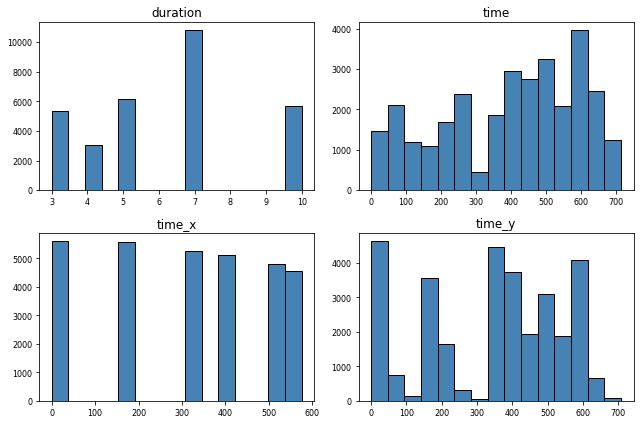

In [127]:
import matplotlib.pyplot as plt
import matplotlib

complete_df.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.5, 1.5))   

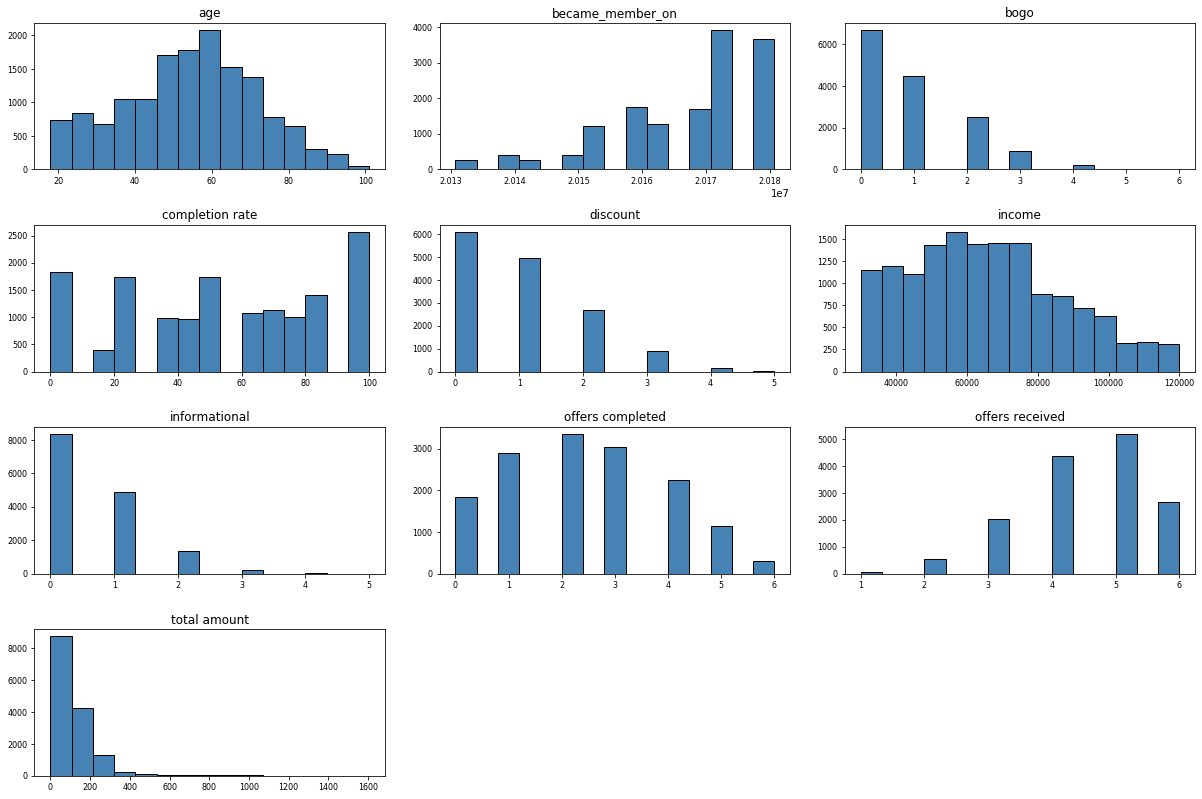

In [129]:
df2.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 2.8, 2.8))

In [77]:
complete_df.offer_type.value_counts()

discount         11812
bogo             10792
informational     8352
Name: offer_type, dtype: int64

Most of the users have received 4-5 offers while most of the users have completed 2-3 offers 

In [78]:
df2['total amount'].describe()

count    14825.000000
mean       112.914199
std        129.093890
min          0.000000
25%         27.000000
50%         83.000000
75%        156.000000
max       1606.000000
Name: total amount, dtype: float64

In [126]:
incomplete_df = complete[complete.time_y > complete.time].reset_index(drop=True)
rich = incomplete_df['person'].unique()
rich_df = df2[df2.person.isin(rich)]
rich_df['total amount'].describe()

count    3610.000000
mean      173.244044
std       148.377265
min         9.000000
25%        91.000000
50%       144.000000
75%       209.000000
max      1606.000000
Name: total amount, dtype: float64

In [153]:
df2[df2.bogo == 6 ]

person gender  age  became_member_on  \
11772  1acb3e87e3304271a3c917cc80a53780      F   87          20160514   

        income  bogo  informational  discount  offers completed  \
11772  76000.0   6.0            0.0       0.0               6.0   

       offers received  total amount  completion rate  
11772              6.0           138            100.0

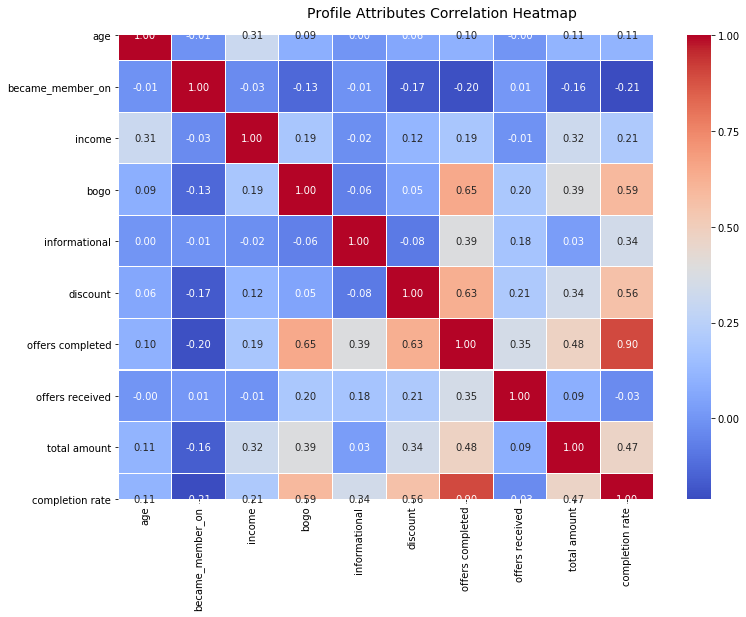

In [170]:
import seaborn as sns

f, ax = plt.subplots(figsize=(12, 8))
corr = df2.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Profile Attributes Correlation Heatmap', fontsize=14)

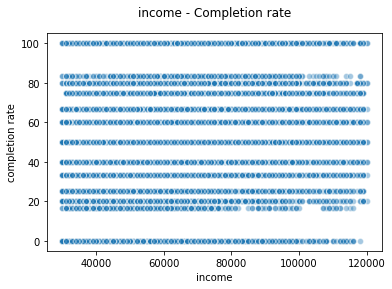

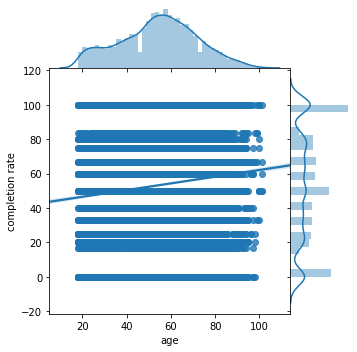

In [202]:
plt.scatter(df2['income'], df2['completion rate'],
            alpha=0.4, edgecolors='w')

plt.xlabel('income')
plt.ylabel('completion rate')
plt.title('income - Completion rate',y=1.05)


# Joint Plot
jp = sns.jointplot(x='age', y='completion rate', data=df2,
                   kind='reg', space=0, size=5, ratio=4)

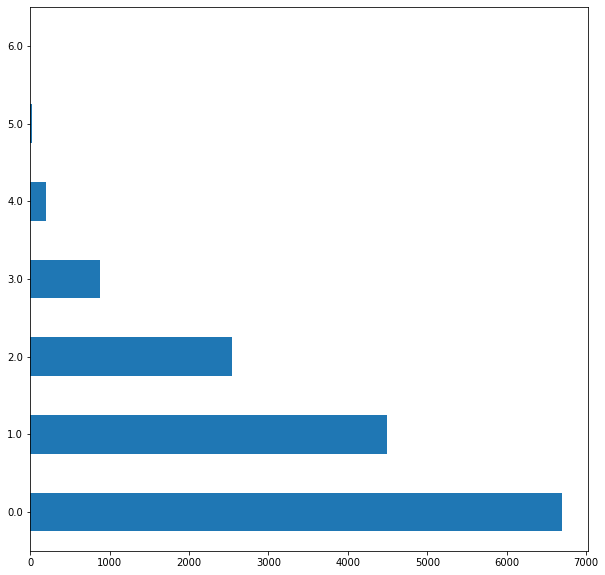

In [221]:
df2['bogo'].value_counts().plot(kind='barh', figsize=(10,10))

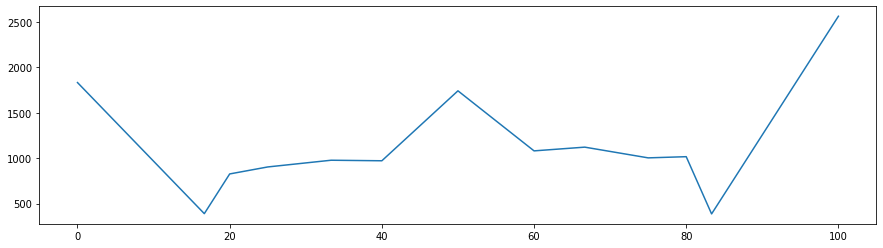

In [228]:
plt.figure(figsize=(15,4))
plt.plot(df2['completion rate'].value_counts().sort_index())


## Performing PCA

In [122]:
########### Run This

df2['gender'] = df2['gender'].map({'M': 0, 'F': 1, 'O': 2})
df2


gender  age  became_member_on    income  \
person                                                                      
0610b486422d4921ae7d2bf64640c50b       1   55          20170715  112000.0   
78afa995795e4d85b5d9ceeca43f5fef       1   75          20170509  100000.0   
e2127556f4f64592b11af22de27a7932       0   68          20180426   70000.0   
389bc3fa690240e798340f5a15918d5c       0   65          20180209   53000.0   
2eeac8d8feae4a8cad5a6af0499a211d       0   58          20171111   51000.0   
...                                  ...  ...               ...       ...   
6d5f3a774f3d4714ab0c092238f3a1d7       1   45          20180604   54000.0   
2cb4f97358b841b9a9773a7aa05a9d77       0   61          20180713   72000.0   
01d26f638c274aa0b965d24cefe3183f       0   49          20170126   73000.0   
9dc1421481194dcd9400aec7c9ae6366       1   83          20160307   50000.0   
e4052622e5ba45a8b96b59aba68cf068       1   62          20170722   82000.0   

                                  bogo  informational  discount  \
person                                                            
0610b486422d4921ae7d2bf64640c50b   0.0            0.0       0.0   
78afa995795e4d85b5d9ceeca43f5fef   3.0            1.0       0.0   
e2127556f4f64592b11af22de27a7932   1.0            0.0       1.0   
389bc3fa690240e798340f5a15918d5c   3.0            0.0       2.0   
2eeac8d8feae4a8cad5a6af0499a211d   0.0            0.0       1.0   
...                                ...            ...       ...   
6d5f3a774f3d4714ab0c092238f3a1d7   0.0            1.0       0.0   
2cb4f97358b841b9a9773a7aa05a9d77   0.0            1.0       0.0   
01d26f638c274aa0b965d24cefe3183f   0.0            1.0       0.0   
9dc1421481194dcd9400aec7c9ae6366   3.0            0.0       0.0   
e4052622e5ba45a8b96b59aba68cf068   1.0            0.0       1.0   

                                  offers completed  offers received  \
person                                                                
0610b486422d4921ae7d2bf64640c50b               0.0              2.0   
78afa995795e4d85b5d9ceeca43f5fef               4.0              4.0   
e2127556f4f64592b11af22de27a7932               2.0              4.0   
389bc3fa690240e798340f5a15918d5c               5.0              6.0   
2eeac8d8feae4a8cad5a6af0499a211d               1.0              3.0   
...                                            ...              ...   
6d5f3a774f3d4714ab0c092238f3a1d7               1.0              3.0   
2cb4f97358b841b9a9773a7aa05a9d77               1.0              3.0   
01d26f638c274aa0b965d24cefe3183f               1.0              3.0   
9dc1421481194dcd9400aec7c9ae6366               3.0              3.0   
e4052622e5ba45a8b96b59aba68cf068               2.0              4.0   

                                  total amount  mobile  web  social  \
person                                                                
0610b486422d4921ae7d2bf64640c50b            76     0.0  0.0     0.0   
78afa995795e4d85b5d9ceeca43f5fef           154     4.0  2.0     3.0   
e2127556f4f64592b11af22de27a7932            56     2.0  2.0     1.0   
389bc3fa690240e798340f5a15918d5c            35     5.0  5.0     3.0   
2eeac8d8feae4a8cad5a6af0499a211d            14     1.0  1.0     1.0   
...                                        ...     ...  ...     ...   
6d5f3a774f3d4714ab0c092238f3a1d7            16     1.0  0.0     1.0   
2cb4f97358b841b9a9773a7aa05a9d77            22     1.0  0.0     1.0   
01d26f638c274aa0b965d24cefe3183f            36     1.0  0.0     1.0   
9dc1421481194dcd9400aec7c9ae6366           184     3.0  2.0     2.0   
e4052622e5ba45a8b96b59aba68cf068           140     2.0  2.0     2.0   

                                  completion rate  
person                                             
0610b486422d4921ae7d2bf64640c50b         0.000000  
78afa995795e4d85b5d9ceeca43f5fef       100.000000  
e2127556f4f64592b11af22de27a7932        50.000000  
389bc3fa690240e798340f5a15918d5c        83.333333  


In [48]:
# Create Dendogram
# (Not Required since we do not have a really high dimensional data)Perform PCA and capture 90% or above variance
# Perform K-means abnd visualize the clusters 
# Perform Agglomerative clustering and visulaize that data and compare it with k-means

# Now we have data for each customer i.e unique profiles --> cleaned_profiles
# Shuffle that data and divide it into training, validation and test sets
# Using Xgboost algorithm get how much a user is willing to pay 
# Determine the accuracy of the model
# if time persists apply it on more Model like SVM or something
# select the best model
# Create a blog on the results 
# Submit the project
def data_info(data, filename):
    path = os.path.join('explore', filename)
    if not os.path.isfile(path):
        pd.DataFrame(data).to_csv(path)
    print(data.shape)

data_info(df2, 'complete_profile.csv')

(14825, 15)


In [120]:
########### Run This

df2.index = df2['person']
df2 = df2.drop(['person'], axis = 1)
df2['offers received'] = df2['offers received'].fillna(0)
df2['completion rate'] = df2['completion rate'].fillna(0)

df2

gender  age  became_member_on    income  \
person                                                                     
0610b486422d4921ae7d2bf64640c50b      F   55          20170715  112000.0   
78afa995795e4d85b5d9ceeca43f5fef      F   75          20170509  100000.0   
e2127556f4f64592b11af22de27a7932      M   68          20180426   70000.0   
389bc3fa690240e798340f5a15918d5c      M   65          20180209   53000.0   
2eeac8d8feae4a8cad5a6af0499a211d      M   58          20171111   51000.0   
...                                 ...  ...               ...       ...   
6d5f3a774f3d4714ab0c092238f3a1d7      F   45          20180604   54000.0   
2cb4f97358b841b9a9773a7aa05a9d77      M   61          20180713   72000.0   
01d26f638c274aa0b965d24cefe3183f      M   49          20170126   73000.0   
9dc1421481194dcd9400aec7c9ae6366      F   83          20160307   50000.0   
e4052622e5ba45a8b96b59aba68cf068      F   62          20170722   82000.0   

                                  bogo  informational  discount  \
person                                                            
0610b486422d4921ae7d2bf64640c50b   0.0            0.0       0.0   
78afa995795e4d85b5d9ceeca43f5fef   3.0            1.0       0.0   
e2127556f4f64592b11af22de27a7932   1.0            0.0       1.0   
389bc3fa690240e798340f5a15918d5c   3.0            0.0       2.0   
2eeac8d8feae4a8cad5a6af0499a211d   0.0            0.0       1.0   
...                                ...            ...       ...   
6d5f3a774f3d4714ab0c092238f3a1d7   0.0            1.0       0.0   
2cb4f97358b841b9a9773a7aa05a9d77   0.0            1.0       0.0   
01d26f638c274aa0b965d24cefe3183f   0.0            1.0       0.0   
9dc1421481194dcd9400aec7c9ae6366   3.0            0.0       0.0   
e4052622e5ba45a8b96b59aba68cf068   1.0            0.0       1.0   

                                  offers completed  offers received  \
person                                                                
0610b486422d4921ae7d2bf64640c50b               0.0              2.0   
78afa995795e4d85b5d9ceeca43f5fef               4.0              4.0   
e2127556f4f64592b11af22de27a7932               2.0              4.0   
389bc3fa690240e798340f5a15918d5c               5.0              6.0   
2eeac8d8feae4a8cad5a6af0499a211d               1.0              3.0   
...                                            ...              ...   
6d5f3a774f3d4714ab0c092238f3a1d7               1.0              3.0   
2cb4f97358b841b9a9773a7aa05a9d77               1.0              3.0   
01d26f638c274aa0b965d24cefe3183f               1.0              3.0   
9dc1421481194dcd9400aec7c9ae6366               3.0              3.0   
e4052622e5ba45a8b96b59aba68cf068               2.0              4.0   

                                  total amount  mobile  web  social  \
person                                                                
0610b486422d4921ae7d2bf64640c50b            76     0.0  0.0     0.0   
78afa995795e4d85b5d9ceeca43f5fef           154     4.0  2.0     3.0   
e2127556f4f64592b11af22de27a7932            56     2.0  2.0     1.0   
389bc3fa690240e798340f5a15918d5c            35     5.0  5.0     3.0   
2eeac8d8feae4a8cad5a6af0499a211d            14     1.0  1.0     1.0   
...                                        ...     ...  ...     ...   
6d5f3a774f3d4714ab0c092238f3a1d7            16     1.0  0.0     1.0   
2cb4f97358b841b9a9773a7aa05a9d77            22     1.0  0.0     1.0   
01d26f638c274aa0b965d24cefe3183f            36     1.0  0.0     1.0   
9dc1421481194dcd9400aec7c9ae6366           184     3.0  2.0     2.0   
e4052622e5ba45a8b96b59aba68cf068           140     2.0  2.0     2.0   

                                  completion rate  
person                                             
0610b486422d4921ae7d2bf64640c50b         0.000000  
78afa995795e4d85b5d9ceeca43f5fef       100.000000  
e2127556f4f64592b11af22de27a7932        50.000000  
389bc3fa690240e798340f5a15918d5c        83.333333  
2eeac8d8feae

In [89]:
from sklearn.preprocessing import MinMaxScaler

def normalize_data(df):
    scaler = MinMaxScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df.astype(float)))
    df_scaled.columns = df.columns
    df_scaled.index = df.index
    
    return df_scaled

df_scaled = normalize_data(df2)
df_scaled

gender       age  became_member_on    income      bogo  informational  \
0         1.0  0.445783          0.799768  0.911111  0.000000            0.0   
1         1.0  0.686747          0.795648  0.777778  0.500000            0.2   
2         0.0  0.602410          0.994000  0.444444  0.166667            0.0   
3         0.0  0.566265          0.989659  0.255556  0.500000            0.0   
4         0.0  0.481928          0.807688  0.233333  0.000000            0.0   
...       ...       ...               ...       ...       ...            ...   
14820     1.0  0.325301          0.997560  0.266667  0.000000            0.2   
14821     0.0  0.518072          0.999740  0.466667  0.000000            0.2   
14822     0.0  0.373494          0.787987  0.477778  0.000000            0.2   
14823     1.0  0.783133          0.591595  0.222222  0.500000            0.0   
14824     1.0  0.530120          0.799908  0.577778  0.166667            0.0   

       discount  offers completed  offers received  total amount  \
0           0.0          0.000000         0.333333      0.047323   
1           0.0          0.666667         0.666667      0.095890   
2           0.2          0.333333         0.666667      0.034869   
3           0.4          0.833333         1.000000      0.021793   
4           0.2          0.166667         0.500000      0.008717   
...         ...               ...              ...           ...   
14820       0.0          0.166667         0.500000      0.009963   
14821       0.0          0.166667         0.500000      0.013699   
14822       0.0          0.166667         0.500000      0.022416   
14823       0.0          0.500000         0.500000      0.114570   
14824       0.2          0.333333         0.666667      0.087173   

       completion rate  cluster  
0             0.000000     0.00  
1             1.000000     0.00  
2             0.500000     1.00  
3             0.833333     0.25  
4             0.333333     0.25  
...                ...      ...  
14820         0.333333     0.25  
14821         0.333333     1.00  
14822         0.333333     1.00  
14823         1.000000     0.75  
14824         0.500000     1.00  

[14825 rows x 12 columns]

In [300]:
df_scaled.gender.value_counts()

0.0    8484
0.5    6129
1.0     212
Name: gender, dtype: int64

In [301]:
df2.gender.value_counts()

0    8484
1    6129
2     212
Name: gender, dtype: int64

In [302]:
# Get people who have received no offers
#df2[df2.isnull().any(axis=1)]


gender       age  became_member_on  \
person                                                                 
0610b486422d4921ae7d2bf64640c50b     0.5  0.445783          0.799768   
78afa995795e4d85b5d9ceeca43f5fef     0.5  0.686747          0.795648   
e2127556f4f64592b11af22de27a7932     0.0  0.602410          0.994000   
389bc3fa690240e798340f5a15918d5c     0.0  0.566265          0.989659   
2eeac8d8feae4a8cad5a6af0499a211d     0.0  0.481928          0.807688   
...                                  ...       ...               ...   
6d5f3a774f3d4714ab0c092238f3a1d7     0.5  0.325301          0.997560   
2cb4f97358b841b9a9773a7aa05a9d77     0.0  0.518072          0.999740   
01d26f638c274aa0b965d24cefe3183f     0.0  0.373494          0.787987   
9dc1421481194dcd9400aec7c9ae6366     0.5  0.783133          0.591595   
e4052622e5ba45a8b96b59aba68cf068     0.5  0.530120          0.799908   

                                    income      bogo  informational  discount  \
person                                                                          
0610b486422d4921ae7d2bf64640c50b  0.911111  0.000000            0.0       0.0   
78afa995795e4d85b5d9ceeca43f5fef  0.777778  0.500000            0.2       0.0   
e2127556f4f64592b11af22de27a7932  0.444444  0.166667            0.0       0.2   
389bc3fa690240e798340f5a15918d5c  0.255556  0.500000            0.0       0.4   
2eeac8d8feae4a8cad5a6af0499a211d  0.233333  0.000000            0.0       0.2   
...                                    ...       ...            ...       ...   
6d5f3a774f3d4714ab0c092238f3a1d7  0.266667  0.000000            0.2       0.0   
2cb4f97358b841b9a9773a7aa05a9d77  0.466667  0.000000            0.2       0.0   
01d26f638c274aa0b965d24cefe3183f  0.477778  0.000000            0.2       0.0   
9dc1421481194dcd9400aec7c9ae6366  0.222222  0.500000            0.0       0.0   
e4052622e5ba45a8b96b59aba68cf068  0.577778  0.166667            0.0       0.2   

                                  offers completed  offers received  \
person                                                                
0610b486422d4921ae7d2bf64640c50b          0.000000         0.333333   
78afa995795e4d85b5d9ceeca43f5fef          0.666667         0.666667   
e2127556f4f64592b11af22de27a7932          0.333333         0.666667   
389bc3fa690240e798340f5a15918d5c          0.833333         1.000000   
2eeac8d8feae4a8cad5a6af0499a211d          0.166667         0.500000   
...                                            ...              ...   
6d5f3a774f3d4714ab0c092238f3a1d7          0.166667         0.500000   
2cb4f97358b841b9a9773a7aa05a9d77          0.166667         0.500000   
01d26f638c274aa0b965d24cefe3183f          0.166667         0.500000   
9dc1421481194dcd9400aec7c9ae6366          0.500000         0.500000   
e4052622e5ba45a8b96b59aba68cf068          0.333333         0.666667   

                                  total amount  completion rate  
person                                                           
0610b486422d4921ae7d2bf64640c50b      0.047323         0.000000  
78afa995795e4d85b5d9ceeca43f5fef      0.095890         1.000000  
e2127556f4f64592b11af22de27a7932      0.034869         0.500000  
389bc3fa690240e798340f5a15918d5c      0.021793         0.833333  
2eeac8d8feae4a8cad5a6af0499a211d      0.008717         0.333333  
...                                        ...              ...  
6d5f3a774f3d4714ab0c092238f3a1d7      0.009963         0.333333  
2cb4f97358b841b9a9773a7aa05a9d77      0.013699         0.333333  
01d26f638c274aa0b965d24cefe3183f      0.022416         0.333333  
9dc1421481194dcd9400aec7c9ae6366      0.114570         1.000000  
e4052622e5ba45a8b96b59aba68cf068      0.087173         0.500000  

[14825 rows x 11 columns]

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [55.0, 55.0, 65.0, 65.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [60.0, 60.0, 83.75, 83.75],
  [45.0, 45.0, 71.875, 71.875],
  [30.0, 30.0, 58.4375, 58.4375],
  [10.0, 10.0, 44.21875, 44.21875]],
 'dcoord': [[0.0, 36.25098688012404, 36.25098688012404, 0.0],
  [0.0, 32.81913141111118, 32.81913141111118, 0.0],
  [0.0, 24.2439224915804, 24.2439224915804, 0.0],
  [0.0, 20.805597664820105, 20.805597664820105, 0.0],
  [0.0, 20.921298116102726, 20.921298116102726, 20.805597664820105],
  [0.0, 26.472889255760744, 26.472889255760744, 20.921298116102726],
  [24.2439224915804,
   35.662663326728286,
   35.662663326728286,
   26.472889255760744],
  [0.0, 36.48173058760655, 36.48173058760655, 35.662663326728286],
  [32.81913141111118, 38.49370318877079, 38.49370318877079, 36.48173058760655],
  [36.25098688012404,
   50.489458747243596,
   50.489458747243596,
   38.49370318877079]],
 

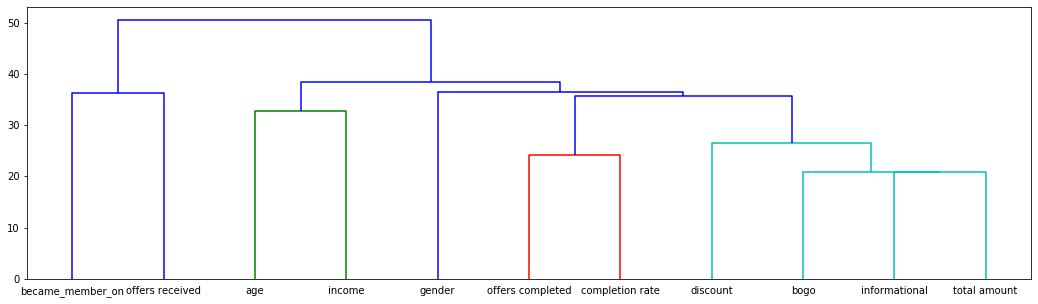

In [303]:
import matplotlib.pyplot as plt
from hcluster import pdist, linkage, dendrogram

X = df_scaled.T.values #Transpose values 
Y = pdist(X)
Z = linkage(Y)
plt.subplots(figsize=(18,5))
dendrogram(Z, labels = df_scaled.columns)

In [304]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)

principalComponents = pca.fit_transform(df_scaled)

pca_score = pca.explained_variance_ratio_
pca_score

array([0.38921018, 0.14918421, 0.10363894, 0.09912848, 0.0736385 ,
       0.0649654 , 0.06119686, 0.04606777, 0.00831178, 0.00465789])

In [306]:
def explained_variance(s, n_top_components):
    '''Calculates the approx. data variance that n_top_components captures.
       :param s: A dataframe of singular values for top components; 
           the top value is in the last row.
       :param n_top_components: An integer, the number of top components to use.
       :return: The expected data variance covered by the n_top_components.'''
    
    # calculate approx variance
    exp_variance = np.square(s.iloc[:n_top_components,:]).sum()/np.square(s).sum()
    
    return exp_variance[0]
n_top_components = 5 # select a value for the number of top components

s = pd.DataFrame(pca_score)
v = pd.DataFrame(pca.components_)
exp_variance = explained_variance(s, n_top_components)
print('Explained variance: ', exp_variance)

Explained variance:  0.9515096067910608


Features: 
 ['gender' 'age' 'became_member_on' 'income' 'bogo' 'informational'
 'discount' 'offers completed' 'offers received' 'total amount'
 'completion rate']


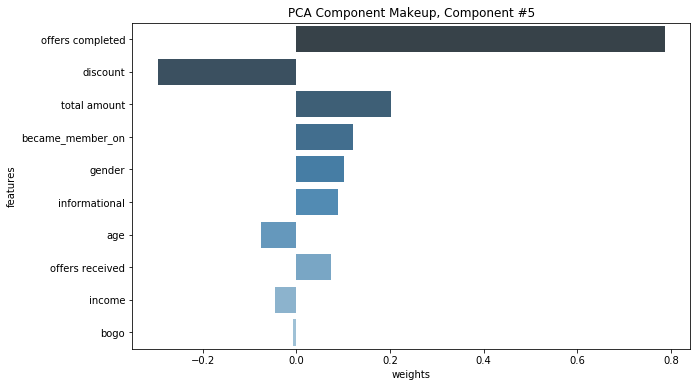

In [310]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

N_COMPONENTS=10

features_list = df_scaled.columns.values
print('Features: \n', features_list)
def display_component(v, features_list, component_num, n_weights=10):
    
    # get index of component (last row - component_num)
    row_idx = N_COMPONENTS-component_num

    # get the list of weights from a row in v, dataframe
    v_1_row = v.iloc[:, row_idx]
    v_1 = np.squeeze(v_1_row.values)

    # match weights to features in counties_scaled dataframe, using list comporehension
    comps = pd.DataFrame(list(zip(v_1, features_list)), 
                         columns=['weights', 'features'])

    # we'll want to sort by the largest n_weights
    # weights can be neg/pos and we'll sort by magnitude
    comps['abs_weights']=comps['weights'].apply(lambda x: np.abs(x))
    sorted_weight_data = comps.sort_values('abs_weights', ascending=False).head(n_weights)

    # display using seaborn
    ax=plt.subplots(figsize=(10,6))
    ax=sns.barplot(data=sorted_weight_data, 
                   x="weights", 
                   y="features", 
                   palette="Blues_d")
    ax.set_title("PCA Component Makeup, Component #" + str(component_num))
    plt.show()

num=5
display_component(v, df_scaled.columns.values, component_num=num, n_weights=16)

In [324]:
### Ignore PCA No Use
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(df_scaled)

array([1, 0, 0, ..., 0, 0, 0])

In [325]:
df_scaled['cluster'] = cluster.labels_
df_scaled

gender       age  became_member_on  \
person                                                                 
0610b486422d4921ae7d2bf64640c50b     0.5  0.445783          0.799768   
78afa995795e4d85b5d9ceeca43f5fef     0.5  0.686747          0.795648   
e2127556f4f64592b11af22de27a7932     0.0  0.602410          0.994000   
389bc3fa690240e798340f5a15918d5c     0.0  0.566265          0.989659   
2eeac8d8feae4a8cad5a6af0499a211d     0.0  0.481928          0.807688   
...                                  ...       ...               ...   
6d5f3a774f3d4714ab0c092238f3a1d7     0.5  0.325301          0.997560   
2cb4f97358b841b9a9773a7aa05a9d77     0.0  0.518072          0.999740   
01d26f638c274aa0b965d24cefe3183f     0.0  0.373494          0.787987   
9dc1421481194dcd9400aec7c9ae6366     0.5  0.783133          0.591595   
e4052622e5ba45a8b96b59aba68cf068     0.5  0.530120          0.799908   

                                    income      bogo  informational  discount  \
person                                                                          
0610b486422d4921ae7d2bf64640c50b  0.911111  0.000000            0.0       0.0   
78afa995795e4d85b5d9ceeca43f5fef  0.777778  0.500000            0.2       0.0   
e2127556f4f64592b11af22de27a7932  0.444444  0.166667            0.0       0.2   
389bc3fa690240e798340f5a15918d5c  0.255556  0.500000            0.0       0.4   
2eeac8d8feae4a8cad5a6af0499a211d  0.233333  0.000000            0.0       0.2   
...                                    ...       ...            ...       ...   
6d5f3a774f3d4714ab0c092238f3a1d7  0.266667  0.000000            0.2       0.0   
2cb4f97358b841b9a9773a7aa05a9d77  0.466667  0.000000            0.2       0.0   
01d26f638c274aa0b965d24cefe3183f  0.477778  0.000000            0.2       0.0   
9dc1421481194dcd9400aec7c9ae6366  0.222222  0.500000            0.0       0.0   
e4052622e5ba45a8b96b59aba68cf068  0.577778  0.166667            0.0       0.2   

                                  offers completed  offers received  \
person                                                                
0610b486422d4921ae7d2bf64640c50b          0.000000         0.333333   
78afa995795e4d85b5d9ceeca43f5fef          0.666667         0.666667   
e2127556f4f64592b11af22de27a7932          0.333333         0.666667   
389bc3fa690240e798340f5a15918d5c          0.833333         1.000000   
2eeac8d8feae4a8cad5a6af0499a211d          0.166667         0.500000   
...                                            ...              ...   
6d5f3a774f3d4714ab0c092238f3a1d7          0.166667         0.500000   
2cb4f97358b841b9a9773a7aa05a9d77          0.166667         0.500000   
01d26f638c274aa0b965d24cefe3183f          0.166667         0.500000   
9dc1421481194dcd9400aec7c9ae6366          0.500000         0.500000   
e4052622e5ba45a8b96b59aba68cf068          0.333333         0.666667   

                                  total amount  completion rate  cluster  
person                                                                    
0610b486422d4921ae7d2bf64640c50b      0.047323         0.000000        1  
78afa995795e4d85b5d9ceeca43f5fef      0.095890         1.000000        0  
e2127556f4f64592b11af22de27a7932      0.034869         0.500000        0  
389bc3fa690240e798340f5a15918d5c      0.021793         0.833333        1  
2eeac8d8feae4a8cad5a6af0499a211d      0.008717         0.333333        0  
...                                        ...              ...      ...  
6d5f3a774f3d4714ab0c092238f3a1d7      0.009963         0.333333        1  
2cb4f97358b841b9a9773a7aa05a9d77      0.013699         0.333333        0  
01d26f638c274aa0b965d24cefe3183f      0.022416         0.333333        0  
9dc1421481194dcd9400aec7c9ae6366      0.114570         1.000000        0  
e4052622e5ba45a8b96b59aba68cf068      0.087173         0.500000        0  

[14825 rows x 12 columns]

KeyboardInterrupt: 

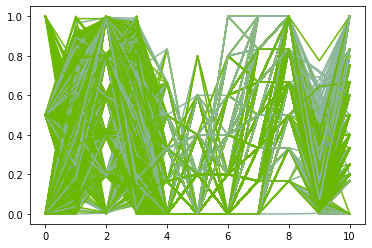

In [418]:
pd.plotting.parallel_coordinates(df_scaled, 'cluster')

In [ ]:
import pylab as pl
for i in range(0, df_scaled.shape[0]):
    if df_scaled.cluster[i] == 0:
        c1 = pl.scatter(df_scaled[i,0],df_scaled[i,1],c='r',marker='+')
    elif df_scaled.cluster[i] == 1:
        c2 = pl.scatter(df_scaled[i,0],df_scaled[i,1],c='g',marker='o')
    elif df_scaled.cluster[i] == 2:
        c3 = pl.scatter(df_scaled[i,0],df_scaled[i,1],c='b',marker='*')
        
pl.legend([c1, c2, c3], ['Cluster 0', 'Cluster 1','Cluster 2'])
pl.title('Cluster Visualizaton')
pl.show()

In [327]:
parallel_coordinates(df_scaled, class_column='cluster', cols=['var 1', 'var 2', 'var 3'])

NameError: name 'parallel_coordinates' is not defined

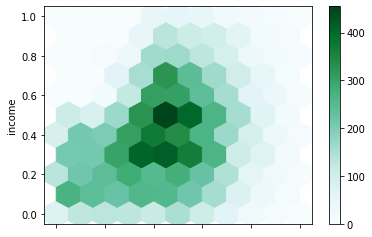

In [342]:
df_scaled.plot.hexbin(x='age', y='income', gridsize=10)

In [343]:
df_scaled

gender       age  became_member_on  \
person                                                                 
0610b486422d4921ae7d2bf64640c50b     0.5  0.445783          0.799768   
78afa995795e4d85b5d9ceeca43f5fef     0.5  0.686747          0.795648   
e2127556f4f64592b11af22de27a7932     0.0  0.602410          0.994000   
389bc3fa690240e798340f5a15918d5c     0.0  0.566265          0.989659   
2eeac8d8feae4a8cad5a6af0499a211d     0.0  0.481928          0.807688   
...                                  ...       ...               ...   
6d5f3a774f3d4714ab0c092238f3a1d7     0.5  0.325301          0.997560   
2cb4f97358b841b9a9773a7aa05a9d77     0.0  0.518072          0.999740   
01d26f638c274aa0b965d24cefe3183f     0.0  0.373494          0.787987   
9dc1421481194dcd9400aec7c9ae6366     0.5  0.783133          0.591595   
e4052622e5ba45a8b96b59aba68cf068     0.5  0.530120          0.799908   

                                    income      bogo  informational  discount  \
person                                                                          
0610b486422d4921ae7d2bf64640c50b  0.911111  0.000000            0.0       0.0   
78afa995795e4d85b5d9ceeca43f5fef  0.777778  0.500000            0.2       0.0   
e2127556f4f64592b11af22de27a7932  0.444444  0.166667            0.0       0.2   
389bc3fa690240e798340f5a15918d5c  0.255556  0.500000            0.0       0.4   
2eeac8d8feae4a8cad5a6af0499a211d  0.233333  0.000000            0.0       0.2   
...                                    ...       ...            ...       ...   
6d5f3a774f3d4714ab0c092238f3a1d7  0.266667  0.000000            0.2       0.0   
2cb4f97358b841b9a9773a7aa05a9d77  0.466667  0.000000            0.2       0.0   
01d26f638c274aa0b965d24cefe3183f  0.477778  0.000000            0.2       0.0   
9dc1421481194dcd9400aec7c9ae6366  0.222222  0.500000            0.0       0.0   
e4052622e5ba45a8b96b59aba68cf068  0.577778  0.166667            0.0       0.2   

                                  offers completed  offers received  \
person                                                                
0610b486422d4921ae7d2bf64640c50b          0.000000         0.333333   
78afa995795e4d85b5d9ceeca43f5fef          0.666667         0.666667   
e2127556f4f64592b11af22de27a7932          0.333333         0.666667   
389bc3fa690240e798340f5a15918d5c          0.833333         1.000000   
2eeac8d8feae4a8cad5a6af0499a211d          0.166667         0.500000   
...                                            ...              ...   
6d5f3a774f3d4714ab0c092238f3a1d7          0.166667         0.500000   
2cb4f97358b841b9a9773a7aa05a9d77          0.166667         0.500000   
01d26f638c274aa0b965d24cefe3183f          0.166667         0.500000   
9dc1421481194dcd9400aec7c9ae6366          0.500000         0.500000   
e4052622e5ba45a8b96b59aba68cf068          0.333333         0.666667   

                                  total amount  completion rate  cluster  
person                                                                    
0610b486422d4921ae7d2bf64640c50b      0.047323         0.000000        1  
78afa995795e4d85b5d9ceeca43f5fef      0.095890         1.000000        0  
e2127556f4f64592b11af22de27a7932      0.034869         0.500000        0  
389bc3fa690240e798340f5a15918d5c      0.021793         0.833333        1  
2eeac8d8feae4a8cad5a6af0499a211d      0.008717         0.333333        0  
...                                        ...              ...      ...  
6d5f3a774f3d4714ab0c092238f3a1d7      0.009963         0.333333        1  
2cb4f97358b841b9a9773a7aa05a9d77      0.013699         0.333333        0  
01d26f638c274aa0b965d24cefe3183f      0.022416         0.333333        0  
9dc1421481194dcd9400aec7c9ae6366      0.114570         1.000000        0  
e4052622e5ba45a8b96b59aba68cf068      0.087173         0.500000        0  

[14825 rows x 12 columns]

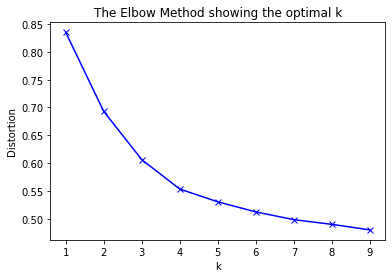

In [344]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt


# create new plot and data
plt.plot()
X = df_scaled
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [351]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(df_scaled)

labels = kmeans.predict(df_scaled)
centroids = kmeans.cluster_centers_

labels

array([2, 0, 1, ..., 1, 0, 0], dtype=int32)

In [680]:
def likelihood(rate):
    if rate >= 80 and rate <= 100:
        return 4
    elif rate >= 60 and rate < 80:
        return 3
    elif rate >= 40 and rate < 60:
        return 2
    elif rate >= 20 and rate < 40:
        return 1
    else:
        return 0

#     if rate > 64:
#         return 3
#     elif rate <= 64 and rate > 33:
#         return 2
#     else:
#         return 1
    
df2['likeliness'] = df2['completion rate'].apply(lambda x: likelihood(x))
df2

gender  age  became_member_on    income  \
person                                                                      
0610b486422d4921ae7d2bf64640c50b       1   55          20170715  112000.0   
78afa995795e4d85b5d9ceeca43f5fef       1   75          20170509  100000.0   
e2127556f4f64592b11af22de27a7932       0   68          20180426   70000.0   
389bc3fa690240e798340f5a15918d5c       0   65          20180209   53000.0   
2eeac8d8feae4a8cad5a6af0499a211d       0   58          20171111   51000.0   
...                                  ...  ...               ...       ...   
6d5f3a774f3d4714ab0c092238f3a1d7       1   45          20180604   54000.0   
2cb4f97358b841b9a9773a7aa05a9d77       0   61          20180713   72000.0   
01d26f638c274aa0b965d24cefe3183f       0   49          20170126   73000.0   
9dc1421481194dcd9400aec7c9ae6366       1   83          20160307   50000.0   
e4052622e5ba45a8b96b59aba68cf068       1   62          20170722   82000.0   

                                  bogo  informational  discount  \
person                                                            
0610b486422d4921ae7d2bf64640c50b   0.0            0.0       0.0   
78afa995795e4d85b5d9ceeca43f5fef   3.0            1.0       0.0   
e2127556f4f64592b11af22de27a7932   1.0            0.0       1.0   
389bc3fa690240e798340f5a15918d5c   3.0            0.0       2.0   
2eeac8d8feae4a8cad5a6af0499a211d   0.0            0.0       1.0   
...                                ...            ...       ...   
6d5f3a774f3d4714ab0c092238f3a1d7   0.0            1.0       0.0   
2cb4f97358b841b9a9773a7aa05a9d77   0.0            1.0       0.0   
01d26f638c274aa0b965d24cefe3183f   0.0            1.0       0.0   
9dc1421481194dcd9400aec7c9ae6366   3.0            0.0       0.0   
e4052622e5ba45a8b96b59aba68cf068   1.0            0.0       1.0   

                                  offers completed  offers received  \
person                                                                
0610b486422d4921ae7d2bf64640c50b               0.0              2.0   
78afa995795e4d85b5d9ceeca43f5fef               4.0              4.0   
e2127556f4f64592b11af22de27a7932               2.0              4.0   
389bc3fa690240e798340f5a15918d5c               5.0              6.0   
2eeac8d8feae4a8cad5a6af0499a211d               1.0              3.0   
...                                            ...              ...   
6d5f3a774f3d4714ab0c092238f3a1d7               1.0              3.0   
2cb4f97358b841b9a9773a7aa05a9d77               1.0              3.0   
01d26f638c274aa0b965d24cefe3183f               1.0              3.0   
9dc1421481194dcd9400aec7c9ae6366               3.0              3.0   
e4052622e5ba45a8b96b59aba68cf068               2.0              4.0   

                                  total amount  completion rate  likeliness  
person                                                                       
0610b486422d4921ae7d2bf64640c50b            76         0.000000           0  
78afa995795e4d85b5d9ceeca43f5fef           154       100.000000           4  
e2127556f4f64592b11af22de27a7932            56        50.000000           2  
389bc3fa690240e798340f5a15918d5c            35        83.333333           4  
2eeac8d8feae4a8cad5a6af0499a211d            14        33.333333           1  
...                                        ...              ...         ...  
6d5f3a774f3d4714ab0c092238f3a1d7            16        33.333333           1  
2cb4f97358b841b9a9773a7aa05a9d77            22        33.333333           1  
01d26f638c274aa0b965d24cefe3183f            36        33.333333           1  
9dc1421481194dcd9400aec7c9ae6366           184       100.000000           4  
e4052622e5ba45a8b96b59aba68cf068           140        50.000000           2  

[14825 rows x 12 columns]

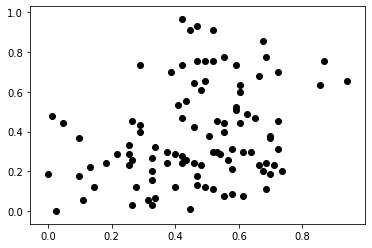

In [468]:
# those who have completion rate > 80 have responded very similary for bogo and discount offers
rng = np.random.RandomState(0)
colors = rng.rand(100)

plt.scatter(df_scaled['age'][:100], df_scaled['income'][:100], c='black')

In [645]:
#df_scaled.drop(['cluster'], axis=1, inplace = True)
mat = df2.values
print(mat.shape)

(14825, 12)


In [646]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X = mat[:,0:11]
Y = mat[:,11]

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [647]:
# fit model no training data
print(Y.shape)
model = XGBClassifier()
model.fit(X_train, y_train)

(14825,)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [648]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [655]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))


Accuracy: 100.00%


In [531]:
predictions[30:40]

[4.0, 2.0, 0.0, 1.0, 2.0, 1.0, 4.0, 2.0, 1.0, 1.0]

In [530]:
y_test[30:40]

array([4., 2., 0., 1., 2., 1., 4., 2., 1., 1.])

In [599]:
# mat = df2_scaled.values
# X = mat[:,0:11]
# Y = mat[:,11]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)

In [650]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

/Users/lokesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [651]:
y_pred = svclassifier.predict(X_test)
y_test

array([3., 1., 3., ..., 1., 2., 1.])

In [652]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[   8    0 1242]
 [   0    0 1604]
 [   0    0 2039]]
              precision    recall  f1-score   support

         1.0       1.00      0.01      0.01      1250
         2.0       0.00      0.00      0.00      1604
         3.0       0.42      1.00      0.59      2039

    accuracy                           0.42      4893
   macro avg       0.47      0.34      0.20      4893
weighted avg       0.43      0.42      0.25      4893



/Users/lokesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [653]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 41.84%


In [520]:
print(df2[df2.likeliness == 0].shape)
print(df2[df2.likeliness == 1].shape)
print(df2[df2.likeliness == 2].shape)
print(df2[df2.likeliness == 3].shape)
print(df2[df2.likeliness == 4].shape)
print(df2.shape)

(2228, 12)
(2709, 12)
(2714, 12)
(3207, 12)
(3967, 12)
(14825, 12)


In [551]:
print(y_test[:10])
print(y_pred[:700])

[2. 3. 0. 2. 2. 4. 4. 0. 4. 3.]
[4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 0. 4. 

In [576]:
df2_scaled = normalize_data(df2)
df2_scaled

gender       age  became_member_on  \
person                                                                 
0610b486422d4921ae7d2bf64640c50b     0.5  0.445783          0.799768   
78afa995795e4d85b5d9ceeca43f5fef     0.5  0.686747          0.795648   
e2127556f4f64592b11af22de27a7932     0.0  0.602410          0.994000   
389bc3fa690240e798340f5a15918d5c     0.0  0.566265          0.989659   
2eeac8d8feae4a8cad5a6af0499a211d     0.0  0.481928          0.807688   
...                                  ...       ...               ...   
6d5f3a774f3d4714ab0c092238f3a1d7     0.5  0.325301          0.997560   
2cb4f97358b841b9a9773a7aa05a9d77     0.0  0.518072          0.999740   
01d26f638c274aa0b965d24cefe3183f     0.0  0.373494          0.787987   
9dc1421481194dcd9400aec7c9ae6366     0.5  0.783133          0.591595   
e4052622e5ba45a8b96b59aba68cf068     0.5  0.530120          0.799908   

                                    income      bogo  informational  discount  \
person                                                                          
0610b486422d4921ae7d2bf64640c50b  0.911111  0.000000            0.0       0.0   
78afa995795e4d85b5d9ceeca43f5fef  0.777778  0.500000            0.2       0.0   
e2127556f4f64592b11af22de27a7932  0.444444  0.166667            0.0       0.2   
389bc3fa690240e798340f5a15918d5c  0.255556  0.500000            0.0       0.4   
2eeac8d8feae4a8cad5a6af0499a211d  0.233333  0.000000            0.0       0.2   
...                                    ...       ...            ...       ...   
6d5f3a774f3d4714ab0c092238f3a1d7  0.266667  0.000000            0.2       0.0   
2cb4f97358b841b9a9773a7aa05a9d77  0.466667  0.000000            0.2       0.0   
01d26f638c274aa0b965d24cefe3183f  0.477778  0.000000            0.2       0.0   
9dc1421481194dcd9400aec7c9ae6366  0.222222  0.500000            0.0       0.0   
e4052622e5ba45a8b96b59aba68cf068  0.577778  0.166667            0.0       0.2   

                                  offers completed  offers received  \
person                                                                
0610b486422d4921ae7d2bf64640c50b          0.000000         0.333333   
78afa995795e4d85b5d9ceeca43f5fef          0.666667         0.666667   
e2127556f4f64592b11af22de27a7932          0.333333         0.666667   
389bc3fa690240e798340f5a15918d5c          0.833333         1.000000   
2eeac8d8feae4a8cad5a6af0499a211d          0.166667         0.500000   
...                                            ...              ...   
6d5f3a774f3d4714ab0c092238f3a1d7          0.166667         0.500000   
2cb4f97358b841b9a9773a7aa05a9d77          0.166667         0.500000   
01d26f638c274aa0b965d24cefe3183f          0.166667         0.500000   
9dc1421481194dcd9400aec7c9ae6366          0.500000         0.500000   
e4052622e5ba45a8b96b59aba68cf068          0.333333         0.666667   

                                  total amount  completion rate  likeliness  
person                                                                       
0610b486422d4921ae7d2bf64640c50b      0.047323         0.000000        0.00  
78afa995795e4d85b5d9ceeca43f5fef      0.095890         1.000000        1.00  
e2127556f4f64592b11af22de27a7932      0.034869         0.500000        0.50  
389bc3fa690240e798340f5a15918d5c      0.021793         0.833333        1.00  
2eeac8d8feae4a8cad5a6af0499a211d      0.008717         0.333333        0.25  
...                                        ...              ...         ...  
6d5f3a774f3d4714ab0c092238f3a1d7      0.009963         0.333333        0.25  
2cb4f97358b841b9a9773a7aa05a9d77      0.013699         0.333333        0.25  
01d26f638c274aa0b965d24cefe3183f      0.022416         0.333333        0.25  
9dc1421481194dcd9400aec7c9ae6366      0.114570         1.000000        1.00  
e4052622e5ba45a8b96b59aba68cf068      0.087173         0.500000        0.50  

[14825 rows x 12 columns]

In [591]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
lol = le.fit(mat[:,10])
le.classes_

array([0.        , 0.16666667, 0.2       , 0.25      , 0.33333333,
       0.4       , 0.5       , 0.6       , 0.66666667, 0.75      ,
       0.8       , 0.83333333, 1.        ])

In [594]:
Y

array([0.  , 1.  , 0.5 , ..., 0.25, 1.  , 0.5 ])

In [656]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train)
print(clf.coef_)
print(clf.intercept_)

[[-1.18267374e-09 -1.51365367e-08 -1.41300762e-08 -8.51003751e-06
  -9.32483736e-09 -4.40170393e-09 -9.33620043e-09 -2.30627417e-08
  -3.11569392e-10 -8.85146635e-07 -5.21155290e-07]
 [ 9.31903758e-11  4.75442338e-09 -5.33388248e-08  1.17536927e-06
  -2.04897391e-09 -1.33660070e-10 -1.15393237e-09 -3.33656636e-09
   1.97006159e-09 -1.95265800e-07 -1.01387163e-07]
 [ 1.08167156e-09  1.02172617e-08 -7.55911959e-08  7.18856279e-06
   1.13299743e-08  4.50707568e-09  1.04498250e-08  2.62868750e-08
  -1.66184536e-09  1.07605883e-06  6.20147684e-07]]
[-2.83125037e-12  8.50376043e-13  1.92664654e-12]


/Users/lokesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [657]:
y_pred = clf.predict(X_test)

In [658]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 34.21%


In [608]:
y_pred

array([4., 4., 4., ..., 4., 4., 4.])

In [659]:
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
clf = OneVsRestClassifier(SVC()).fit(X_train, y_train)
y_pred = clf.predict(X_test)


/Users/lokesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/lokesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/lokesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [661]:
def find_accuracy(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
find_accuracy(y_test, y_pred)

Accuracy: 41.90%


In [662]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

/Users/lokesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [663]:
find_accuracy(y_test, y_pred)

Accuracy: 100.00%


In [625]:
print(X[:10,:])

[[1.00000000e+00 5.50000000e+01 2.01707150e+07 1.12000000e+05
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.00000000e+00 7.60000000e+01 0.00000000e+00]
 [1.00000000e+00 7.50000000e+01 2.01705090e+07 1.00000000e+05
  3.00000000e+00 1.00000000e+00 0.00000000e+00 4.00000000e+00
  4.00000000e+00 1.54000000e+02 1.00000000e+02]
 [0.00000000e+00 6.80000000e+01 2.01804260e+07 7.00000000e+04
  1.00000000e+00 0.00000000e+00 1.00000000e+00 2.00000000e+00
  4.00000000e+00 5.60000000e+01 5.00000000e+01]
 [0.00000000e+00 6.50000000e+01 2.01802090e+07 5.30000000e+04
  3.00000000e+00 0.00000000e+00 2.00000000e+00 5.00000000e+00
  6.00000000e+00 3.50000000e+01 8.33333333e+01]
 [0.00000000e+00 5.80000000e+01 2.01711110e+07 5.10000000e+04
  0.00000000e+00 0.00000000e+00 1.00000000e+00 1.00000000e+00
  3.00000000e+00 1.40000000e+01 3.33333333e+01]
 [1.00000000e+00 6.10000000e+01 2.01709110e+07 5.70000000e+04
  3.00000000e+00 1.00000000e+00 0.00000000e+00 4.00000000e+00
  5.00000000e+00

In [666]:
from sklearn import svm
clf = svm.SVR()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/Users/lokesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [667]:
find_accuracy(y_test, y_pred)

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [690]:
label_4 = df2[df2.likeliness == 4]
label_4

gender  age  became_member_on    income  \
person                                                                      
78afa995795e4d85b5d9ceeca43f5fef       1   75          20170509  100000.0   
389bc3fa690240e798340f5a15918d5c       0   65          20180209   53000.0   
aa4862eba776480b8bb9c68455b8c2e1       1   61          20170911   57000.0   
440cf1fd7580490c971d8c651ed962af       1   40          20160504   71000.0   
c27e0d6ab72c455a8bb66d980963de60       1   78          20170616   71000.0   
...                                  ...  ...               ...       ...   
e2fd53ed790240c586b3188f23542cca       1   44          20170119   51000.0   
08eb126ad33f447ca3ad076482445c05       0   30          20151012   57000.0   
122c0c2a3c2540848f8c3fdc37e97639       1   39          20160921   54000.0   
79edb810789c447e8d212a324b44cc16       1   70          20160310   39000.0   
9dc1421481194dcd9400aec7c9ae6366       1   83          20160307   50000.0   

                                  bogo  informational  discount  \
person                                                            
78afa995795e4d85b5d9ceeca43f5fef   3.0            1.0       0.0   
389bc3fa690240e798340f5a15918d5c   3.0            0.0       2.0   
aa4862eba776480b8bb9c68455b8c2e1   3.0            1.0       0.0   
440cf1fd7580490c971d8c651ed962af   0.0            0.0       4.0   
c27e0d6ab72c455a8bb66d980963de60   0.0            4.0       1.0   
...                                ...            ...       ...   
e2fd53ed790240c586b3188f23542cca   0.0            1.0       2.0   
08eb126ad33f447ca3ad076482445c05   2.0            1.0       1.0   
122c0c2a3c2540848f8c3fdc37e97639   1.0            1.0       2.0   
79edb810789c447e8d212a324b44cc16   1.0            1.0       3.0   
9dc1421481194dcd9400aec7c9ae6366   3.0            0.0       0.0   

                                  offers completed  offers received  \
person                                                                
78afa995795e4d85b5d9ceeca43f5fef               4.0              4.0   
389bc3fa690240e798340f5a15918d5c               5.0              6.0   
aa4862eba776480b8bb9c68455b8c2e1               4.0              5.0   
440cf1fd7580490c971d8c651ed962af               4.0              5.0   
c27e0d6ab72c455a8bb66d980963de60               5.0              6.0   
...                                            ...              ...   
e2fd53ed790240c586b3188f23542cca               3.0              3.0   
08eb126ad33f447ca3ad076482445c05               4.0              4.0   
122c0c2a3c2540848f8c3fdc37e97639               4.0              4.0   
79edb810789c447e8d212a324b44cc16               5.0              5.0   
9dc1421481194dcd9400aec7c9ae6366               3.0              3.0   

                                  total amount  completion rate  likeliness  
person                                                                       
78afa995795e4d85b5d9ceeca43f5fef           154       100.000000           4  
389bc3fa690240e798340f5a15918d5c            35        83.333333           4  
aa4862eba776480b8bb9c68455b8c2e1            83        80.000000           4  
440cf1fd7580490c971d8c651ed962af           292        80.000000           4  
c27e0d6ab72c455a8bb66d980963de60           151        83.333333           4  
...                                        ...              ...         ...  
e2fd53ed790240c586b3188f23542cca            97       100.000000           4  
08eb126ad33f447ca3ad076482445c05           279       100.000000           4  
122c0c2a3c2540848f8c3fdc37e97639           109       100.000000           4  
79edb810789c447e8d212a324b44cc16           135       100.000000           4  
9dc1421481194dcd9400aec7c9ae6366           184       100.000000           4  

[3967 rows x 12 columns]

In [702]:
df2[df2.income == 30000]['became_member_on'].describe()

count    8.800000e+01
mean     2.016817e+07
std      1.099050e+04
min      2.013111e+07
25%      2.016088e+07
50%      2.017091e+07
75%      2.018011e+07
max      2.018072e+07
Name: became_member_on, dtype: float64

In [34]:
df_scaled

gender       age  became_member_on  \
person                                                                 
0610b486422d4921ae7d2bf64640c50b     0.5  0.445783          0.799768   
78afa995795e4d85b5d9ceeca43f5fef     0.5  0.686747          0.795648   
e2127556f4f64592b11af22de27a7932     0.0  0.602410          0.994000   
389bc3fa690240e798340f5a15918d5c     0.0  0.566265          0.989659   
2eeac8d8feae4a8cad5a6af0499a211d     0.0  0.481928          0.807688   
...                                  ...       ...               ...   
6d5f3a774f3d4714ab0c092238f3a1d7     0.5  0.325301          0.997560   
2cb4f97358b841b9a9773a7aa05a9d77     0.0  0.518072          0.999740   
01d26f638c274aa0b965d24cefe3183f     0.0  0.373494          0.787987   
9dc1421481194dcd9400aec7c9ae6366     0.5  0.783133          0.591595   
e4052622e5ba45a8b96b59aba68cf068     0.5  0.530120          0.799908   

                                    income      bogo  informational  discount  \
person                                                                          
0610b486422d4921ae7d2bf64640c50b  0.911111  0.000000            0.0       0.0   
78afa995795e4d85b5d9ceeca43f5fef  0.777778  0.500000            0.2       0.0   
e2127556f4f64592b11af22de27a7932  0.444444  0.166667            0.0       0.2   
389bc3fa690240e798340f5a15918d5c  0.255556  0.500000            0.0       0.4   
2eeac8d8feae4a8cad5a6af0499a211d  0.233333  0.000000            0.0       0.2   
...                                    ...       ...            ...       ...   
6d5f3a774f3d4714ab0c092238f3a1d7  0.266667  0.000000            0.2       0.0   
2cb4f97358b841b9a9773a7aa05a9d77  0.466667  0.000000            0.2       0.0   
01d26f638c274aa0b965d24cefe3183f  0.477778  0.000000            0.2       0.0   
9dc1421481194dcd9400aec7c9ae6366  0.222222  0.500000            0.0       0.0   
e4052622e5ba45a8b96b59aba68cf068  0.577778  0.166667            0.0       0.2   

                                  offers completed  offers received  \
person                                                                
0610b486422d4921ae7d2bf64640c50b          0.000000         0.333333   
78afa995795e4d85b5d9ceeca43f5fef          0.666667         0.666667   
e2127556f4f64592b11af22de27a7932          0.333333         0.666667   
389bc3fa690240e798340f5a15918d5c          0.833333         1.000000   
2eeac8d8feae4a8cad5a6af0499a211d          0.166667         0.500000   
...                                            ...              ...   
6d5f3a774f3d4714ab0c092238f3a1d7          0.166667         0.500000   
2cb4f97358b841b9a9773a7aa05a9d77          0.166667         0.500000   
01d26f638c274aa0b965d24cefe3183f          0.166667         0.500000   
9dc1421481194dcd9400aec7c9ae6366          0.500000         0.500000   
e4052622e5ba45a8b96b59aba68cf068          0.333333         0.666667   

                                  total amount  completion rate  
person                                                           
0610b486422d4921ae7d2bf64640c50b      0.047323         0.000000  
78afa995795e4d85b5d9ceeca43f5fef      0.095890         1.000000  
e2127556f4f64592b11af22de27a7932      0.034869         0.500000  
389bc3fa690240e798340f5a15918d5c      0.021793         0.833333  
2eeac8d8feae4a8cad5a6af0499a211d      0.008717         0.333333  
...                                        ...              ...  
6d5f3a774f3d4714ab0c092238f3a1d7      0.009963         0.333333  
2cb4f97358b841b9a9773a7aa05a9d77      0.013699         0.333333  
01d26f638c274aa0b965d24cefe3183f      0.022416         0.333333  
9dc1421481194dcd9400aec7c9ae6366      0.114570         1.000000  
e4052622e5ba45a8b96b59aba68cf068      0.087173         0.500000  

[14825 rows x 11 columns]

In [126]:
########### Run This

def calculate_likeliness(rate):
    if rate >= 80 and rate <= 100:
        return 4
    elif rate >= 60 and rate < 80:
        return 3
    elif rate >= 40 and rate < 60:
        return 2
    elif rate >= 20 and rate < 40:
        return 1
    else:
        return 0


def likelihood(row):
    mobile = row[10]
    web = row[11]
    social = row[12]
    completion_rate= row[13]
    
    rate = (mobile + web + social + completion_rate*3)/6
    return calculate_likeliness(rate * 100)
    

#df_scaled.apply(lambda x: likelihood(x), axis=1)
df_scaled['likeliness'] = df_scaled.apply(lambda x: likelihood(x), axis=1)
df_scaled

gender       age  became_member_on  \
person                                                                 
0610b486422d4921ae7d2bf64640c50b     0.5  0.445783          0.799768   
78afa995795e4d85b5d9ceeca43f5fef     0.5  0.686747          0.795648   
e2127556f4f64592b11af22de27a7932     0.0  0.602410          0.994000   
389bc3fa690240e798340f5a15918d5c     0.0  0.566265          0.989659   
2eeac8d8feae4a8cad5a6af0499a211d     0.0  0.481928          0.807688   
...                                  ...       ...               ...   
6d5f3a774f3d4714ab0c092238f3a1d7     0.5  0.325301          0.997560   
2cb4f97358b841b9a9773a7aa05a9d77     0.0  0.518072          0.999740   
01d26f638c274aa0b965d24cefe3183f     0.0  0.373494          0.787987   
9dc1421481194dcd9400aec7c9ae6366     0.5  0.783133          0.591595   
e4052622e5ba45a8b96b59aba68cf068     0.5  0.530120          0.799908   

                                    income      bogo  informational  discount  \
person                                                                          
0610b486422d4921ae7d2bf64640c50b  0.911111  0.000000            0.0       0.0   
78afa995795e4d85b5d9ceeca43f5fef  0.777778  0.500000            0.2       0.0   
e2127556f4f64592b11af22de27a7932  0.444444  0.166667            0.0       0.2   
389bc3fa690240e798340f5a15918d5c  0.255556  0.500000            0.0       0.4   
2eeac8d8feae4a8cad5a6af0499a211d  0.233333  0.000000            0.0       0.2   
...                                    ...       ...            ...       ...   
6d5f3a774f3d4714ab0c092238f3a1d7  0.266667  0.000000            0.2       0.0   
2cb4f97358b841b9a9773a7aa05a9d77  0.466667  0.000000            0.2       0.0   
01d26f638c274aa0b965d24cefe3183f  0.477778  0.000000            0.2       0.0   
9dc1421481194dcd9400aec7c9ae6366  0.222222  0.500000            0.0       0.0   
e4052622e5ba45a8b96b59aba68cf068  0.577778  0.166667            0.0       0.2   

                                  offers completed  offers received  \
person                                                                
0610b486422d4921ae7d2bf64640c50b          0.000000         0.333333   
78afa995795e4d85b5d9ceeca43f5fef          0.666667         0.666667   
e2127556f4f64592b11af22de27a7932          0.333333         0.666667   
389bc3fa690240e798340f5a15918d5c          0.833333         1.000000   
2eeac8d8feae4a8cad5a6af0499a211d          0.166667         0.500000   
...                                            ...              ...   
6d5f3a774f3d4714ab0c092238f3a1d7          0.166667         0.500000   
2cb4f97358b841b9a9773a7aa05a9d77          0.166667         0.500000   
01d26f638c274aa0b965d24cefe3183f          0.166667         0.500000   
9dc1421481194dcd9400aec7c9ae6366          0.500000         0.500000   
e4052622e5ba45a8b96b59aba68cf068          0.333333         0.666667   

                                  total amount    mobile       web    social  \
person                                                                         
0610b486422d4921ae7d2bf64640c50b      0.047323  0.000000  0.000000  0.000000   
78afa995795e4d85b5d9ceeca43f5fef      0.095890  0.666667  0.333333  0.500000   
e2127556f4f64592b11af22de27a7932      0.034869  0.333333  0.333333  0.166667   
389bc3fa690240e798340f5a15918d5c      0.021793  0.833333  0.833333  0.500000   
2eeac8d8feae4a8cad5a6af0499a211d      0.008717  0.166667  0.166667  0.166667   
...                                        ...       ...       ...       ...   
6d5f3a774f3d4714ab0c092238f3a1d7      0.009963  0.166667  0.000000  0.166667   
2cb4f97358b841b9a9773a7aa05a9d77      0.013699  0.166667  0.000000  0.166667   
01d26f638c274aa0b965d24cefe3183f      0.022416  0.166667  0.000000  0.166667   
9dc1421481194dcd9400aec7c9ae6366      0.114570  0.500000  0.333333  0.333333   
e4052622e5ba45a8b96b59aba68cf068      0.087173  0.333333  0.333333  0.333333   

                                  completion rate  cluster_agglp  \
person    

In [54]:
df_scaled['likeliness'].describe()
df_scaled = df_scaled.drop(['mobile', 'web', 'social', 'completion rate'], axis=1)
df_scaled

gender       age  became_member_on  \
person                                                                 
0610b486422d4921ae7d2bf64640c50b     0.5  0.445783          0.799768   
78afa995795e4d85b5d9ceeca43f5fef     0.5  0.686747          0.795648   
e2127556f4f64592b11af22de27a7932     0.0  0.602410          0.994000   
389bc3fa690240e798340f5a15918d5c     0.0  0.566265          0.989659   
2eeac8d8feae4a8cad5a6af0499a211d     0.0  0.481928          0.807688   
...                                  ...       ...               ...   
6d5f3a774f3d4714ab0c092238f3a1d7     0.5  0.325301          0.997560   
2cb4f97358b841b9a9773a7aa05a9d77     0.0  0.518072          0.999740   
01d26f638c274aa0b965d24cefe3183f     0.0  0.373494          0.787987   
9dc1421481194dcd9400aec7c9ae6366     0.5  0.783133          0.591595   
e4052622e5ba45a8b96b59aba68cf068     0.5  0.530120          0.799908   

                                    income      bogo  informational  discount  \
person                                                                          
0610b486422d4921ae7d2bf64640c50b  0.911111  0.000000            0.0       0.0   
78afa995795e4d85b5d9ceeca43f5fef  0.777778  0.500000            0.2       0.0   
e2127556f4f64592b11af22de27a7932  0.444444  0.166667            0.0       0.2   
389bc3fa690240e798340f5a15918d5c  0.255556  0.500000            0.0       0.4   
2eeac8d8feae4a8cad5a6af0499a211d  0.233333  0.000000            0.0       0.2   
...                                    ...       ...            ...       ...   
6d5f3a774f3d4714ab0c092238f3a1d7  0.266667  0.000000            0.2       0.0   
2cb4f97358b841b9a9773a7aa05a9d77  0.466667  0.000000            0.2       0.0   
01d26f638c274aa0b965d24cefe3183f  0.477778  0.000000            0.2       0.0   
9dc1421481194dcd9400aec7c9ae6366  0.222222  0.500000            0.0       0.0   
e4052622e5ba45a8b96b59aba68cf068  0.577778  0.166667            0.0       0.2   

                                  offers completed  offers received  \
person                                                                
0610b486422d4921ae7d2bf64640c50b          0.000000         0.333333   
78afa995795e4d85b5d9ceeca43f5fef          0.666667         0.666667   
e2127556f4f64592b11af22de27a7932          0.333333         0.666667   
389bc3fa690240e798340f5a15918d5c          0.833333         1.000000   
2eeac8d8feae4a8cad5a6af0499a211d          0.166667         0.500000   
...                                            ...              ...   
6d5f3a774f3d4714ab0c092238f3a1d7          0.166667         0.500000   
2cb4f97358b841b9a9773a7aa05a9d77          0.166667         0.500000   
01d26f638c274aa0b965d24cefe3183f          0.166667         0.500000   
9dc1421481194dcd9400aec7c9ae6366          0.500000         0.500000   
e4052622e5ba45a8b96b59aba68cf068          0.333333         0.666667   

                                  total amount  likeliness  
person                                                      
0610b486422d4921ae7d2bf64640c50b      0.047323           0  
78afa995795e4d85b5d9ceeca43f5fef      0.095890           3  
e2127556f4f64592b11af22de27a7932      0.034869           1  
389bc3fa690240e798340f5a15918d5c      0.021793           3  
2eeac8d8feae4a8cad5a6af0499a211d      0.008717           1  
...                                        ...         ...  
6d5f3a774f3d4714ab0c092238f3a1d7      0.009963           1  
2cb4f97358b841b9a9773a7aa05a9d77      0.013699           1  
01d26f638c274aa0b965d24cefe3183f      0.022416           1  
9dc1421481194dcd9400aec7c9ae6366      0.114570           3  
e4052622e5ba45a8b96b59aba68cf068      0.087173           2  

[14825 rows x 11 columns]

In [56]:
#df_scaled.drop(['cluster'], axis=1, inplace = True)
mat = df_scaled.values
print(mat.shape)

(14825, 11)


In [55]:
mat

array([[0.5       , 0.44578313, 0.79976799, ..., 0.33333333, 0.04732254,
        0.        ],
       [0.5       , 0.68674699, 0.79564774, ..., 0.66666667, 0.09589041,
        3.        ],
       [0.        , 0.60240964, 0.99399964, ..., 0.66666667, 0.03486924,
        1.        ],
       ...,
       [0.        , 0.37349398, 0.78798728, ..., 0.5       , 0.02241594,
        1.        ],
       [0.5       , 0.78313253, 0.5915955 , ..., 0.5       , 0.11457036,
        3.        ],
       [0.5       , 0.53012048, 0.79990799, ..., 0.66666667, 0.0871731 ,
        2.        ]])

In [57]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X = mat[:,0:10]
Y = mat[:,10]

seed = 1
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [58]:
# fit model no training data
print(Y.shape)
model = XGBClassifier()
model.fit(X_train, y_train)

(14825,)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [59]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [60]:
def find_accuracy(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
find_accuracy(y_test, y_pred)

Accuracy: 91.85%


In [69]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

/Users/lokesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [70]:
find_accuracy(y_test, y_pred)

Accuracy: 90.50%


In [63]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(X_train, y_train)
# print(clf.coef_)
# print(clf.intercept_)
y_pred = clf.predict(X_test)
find_accuracy(y_test, y_pred)

Accuracy: 80.54%


In [64]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

find_accuracy(y_test, y_pred)

/Users/lokesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[1162   47    0    0    0]
 [  43 1064   11    0    0]
 [   0   93  995   74    0]
 [   0    0   45  866  102]
 [   0    0    0   74  317]]
              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96      1209
         1.0       0.88      0.95      0.92      1118
         2.0       0.95      0.86      0.90      1162
         3.0       0.85      0.85      0.85      1013
         4.0       0.76      0.81      0.78       391

    accuracy                           0.90      4893
   macro avg       0.88      0.89      0.88      4893
weighted avg       0.90      0.90      0.90      4893

Accuracy: 90.01%


In [65]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

find_accuracy(y_test, y_pred)

/Users/lokesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[1059  150    0    0    0]
 [ 198  877   43    0    0]
 [   0  357  760   45    0]
 [   0   80  300  633    0]
 [   0    0    6  287   98]]
              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86      1209
         1.0       0.60      0.78      0.68      1118
         2.0       0.69      0.65      0.67      1162
         3.0       0.66      0.62      0.64      1013
         4.0       1.00      0.25      0.40       391

    accuracy                           0.70      4893
   macro avg       0.76      0.64      0.65      4893
weighted avg       0.72      0.70      0.69      4893

Accuracy: 70.04%


In [66]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

find_accuracy(y_test, y_pred)

[[1159   50    0    0    0]
 [  59 1051    8    0    0]
 [   0   96 1045   21    0]
 [   0    0  208  763   42]
 [   0    0    0   78  313]]
              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96      1209
         1.0       0.88      0.94      0.91      1118
         2.0       0.83      0.90      0.86      1162
         3.0       0.89      0.75      0.81      1013
         4.0       0.88      0.80      0.84       391

    accuracy                           0.89      4893
   macro avg       0.89      0.87      0.88      4893
weighted avg       0.89      0.89      0.88      4893

Accuracy: 88.51%


In [72]:
# from sklearn.ensemble import RandomForestClassifier
# rf_classifier = RandomForestClassifier()
# rf_classifier.fit(X_train, y_train)
# y_pred = rf_classifier.predict(X_test)
rf_classifier = RandomForestClassifier(random_state=0)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
find_accuracy(y_test, y_pred)

Accuracy: 90.35%


/Users/lokesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [73]:
rf_classifier = RandomForestClassifier(random_state=1)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
find_accuracy(y_test, y_pred)

Accuracy: 89.88%


/Users/lokesh/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [99]:
for i in range(1,401):
    print(i , )
    rf_classifier = RandomForestClassifier(n_estimators=i, random_state=0)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    find_accuracy(y_test, y_pred)

1
Accuracy: 87.12%
2
Accuracy: 87.00%
3
Accuracy: 89.50%
4
Accuracy: 89.56%
5
Accuracy: 89.84%
6
Accuracy: 89.70%
7
Accuracy: 90.25%
8
Accuracy: 90.01%
9
Accuracy: 90.44%
10
Accuracy: 90.35%
11
Accuracy: 90.46%
12
Accuracy: 90.23%
13
Accuracy: 90.56%
14
Accuracy: 90.46%
15
Accuracy: 90.46%
16
Accuracy: 90.66%
17
Accuracy: 90.76%
18
Accuracy: 90.86%
19
Accuracy: 90.72%
20
Accuracy: 90.86%
21
Accuracy: 90.86%
22
Accuracy: 90.82%
23
Accuracy: 91.03%
24
Accuracy: 90.93%
25
Accuracy: 91.03%
26
Accuracy: 91.17%
27
Accuracy: 91.19%
28
Accuracy: 91.07%
29
Accuracy: 91.15%
30
Accuracy: 91.21%
31
Accuracy: 91.09%
32
Accuracy: 91.19%
33
Accuracy: 91.07%
34
Accuracy: 91.17%
35
Accuracy: 91.11%
36
Accuracy: 91.09%
37
Accuracy: 91.27%
38
Accuracy: 91.31%
39
Accuracy: 91.33%
40
Accuracy: 91.35%
41
Accuracy: 91.23%
42
Accuracy: 91.38%
43
Accuracy: 91.38%
44
Accuracy: 91.27%
45
Accuracy: 91.38%
46
Accuracy: 91.31%
47
Accuracy: 91.38%
48
Accuracy: 91.27%
49
Accuracy: 91.25%
50
Accuracy: 91.19%
51
Accura

Accuracy: 91.25%
398
Accuracy: 91.23%
399
Accuracy: 91.23%
400
Accuracy: 91.25%


In [100]:
rf_classifier = RandomForestClassifier(n_estimators=60, random_state=0)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
find_accuracy(y_test, y_pred)

Accuracy: 91.48%


In [101]:
df_scaled

gender       age  became_member_on  \
person                                                                 
0610b486422d4921ae7d2bf64640c50b     0.5  0.445783          0.799768   
78afa995795e4d85b5d9ceeca43f5fef     0.5  0.686747          0.795648   
e2127556f4f64592b11af22de27a7932     0.0  0.602410          0.994000   
389bc3fa690240e798340f5a15918d5c     0.0  0.566265          0.989659   
2eeac8d8feae4a8cad5a6af0499a211d     0.0  0.481928          0.807688   
...                                  ...       ...               ...   
6d5f3a774f3d4714ab0c092238f3a1d7     0.5  0.325301          0.997560   
2cb4f97358b841b9a9773a7aa05a9d77     0.0  0.518072          0.999740   
01d26f638c274aa0b965d24cefe3183f     0.0  0.373494          0.787987   
9dc1421481194dcd9400aec7c9ae6366     0.5  0.783133          0.591595   
e4052622e5ba45a8b96b59aba68cf068     0.5  0.530120          0.799908   

                                    income      bogo  informational  discount  \
person                                                                          
0610b486422d4921ae7d2bf64640c50b  0.911111  0.000000            0.0       0.0   
78afa995795e4d85b5d9ceeca43f5fef  0.777778  0.500000            0.2       0.0   
e2127556f4f64592b11af22de27a7932  0.444444  0.166667            0.0       0.2   
389bc3fa690240e798340f5a15918d5c  0.255556  0.500000            0.0       0.4   
2eeac8d8feae4a8cad5a6af0499a211d  0.233333  0.000000            0.0       0.2   
...                                    ...       ...            ...       ...   
6d5f3a774f3d4714ab0c092238f3a1d7  0.266667  0.000000            0.2       0.0   
2cb4f97358b841b9a9773a7aa05a9d77  0.466667  0.000000            0.2       0.0   
01d26f638c274aa0b965d24cefe3183f  0.477778  0.000000            0.2       0.0   
9dc1421481194dcd9400aec7c9ae6366  0.222222  0.500000            0.0       0.0   
e4052622e5ba45a8b96b59aba68cf068  0.577778  0.166667            0.0       0.2   

                                  offers completed  offers received  \
person                                                                
0610b486422d4921ae7d2bf64640c50b          0.000000         0.333333   
78afa995795e4d85b5d9ceeca43f5fef          0.666667         0.666667   
e2127556f4f64592b11af22de27a7932          0.333333         0.666667   
389bc3fa690240e798340f5a15918d5c          0.833333         1.000000   
2eeac8d8feae4a8cad5a6af0499a211d          0.166667         0.500000   
...                                            ...              ...   
6d5f3a774f3d4714ab0c092238f3a1d7          0.166667         0.500000   
2cb4f97358b841b9a9773a7aa05a9d77          0.166667         0.500000   
01d26f638c274aa0b965d24cefe3183f          0.166667         0.500000   
9dc1421481194dcd9400aec7c9ae6366          0.500000         0.500000   
e4052622e5ba45a8b96b59aba68cf068          0.333333         0.666667   

                                  total amount  likeliness  
person                                                      
0610b486422d4921ae7d2bf64640c50b      0.047323           0  
78afa995795e4d85b5d9ceeca43f5fef      0.095890           3  
e2127556f4f64592b11af22de27a7932      0.034869           1  
389bc3fa690240e798340f5a15918d5c      0.021793           3  
2eeac8d8feae4a8cad5a6af0499a211d      0.008717           1  
...                                        ...         ...  
6d5f3a774f3d4714ab0c092238f3a1d7      0.009963           1  
2cb4f97358b841b9a9773a7aa05a9d77      0.013699           1  
01d26f638c274aa0b965d24cefe3183f      0.022416           1  
9dc1421481194dcd9400aec7c9ae6366      0.114570           3  
e4052622e5ba45a8b96b59aba68cf068      0.087173           2  

[14825 rows x 11 columns]

In [124]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(df_scaled)


kmeans = KMeans(n_clusters=5)
kmeans.fit(df_scaled)

labels = kmeans.predict(df_scaled)
centroids = kmeans.cluster_centers_

print(cluster.labels_)
print(labels)

[0 1 2 ... 0 1 1]
[1 3 2 ... 4 0 0]


In [125]:
df_scaled['cluster_agglp'] = cluster.labels_
df_scaled['cluster_kmeans'] = labels
df_scaled

gender       age  became_member_on  \
person                                                                 
0610b486422d4921ae7d2bf64640c50b     0.5  0.445783          0.799768   
78afa995795e4d85b5d9ceeca43f5fef     0.5  0.686747          0.795648   
e2127556f4f64592b11af22de27a7932     0.0  0.602410          0.994000   
389bc3fa690240e798340f5a15918d5c     0.0  0.566265          0.989659   
2eeac8d8feae4a8cad5a6af0499a211d     0.0  0.481928          0.807688   
...                                  ...       ...               ...   
6d5f3a774f3d4714ab0c092238f3a1d7     0.5  0.325301          0.997560   
2cb4f97358b841b9a9773a7aa05a9d77     0.0  0.518072          0.999740   
01d26f638c274aa0b965d24cefe3183f     0.0  0.373494          0.787987   
9dc1421481194dcd9400aec7c9ae6366     0.5  0.783133          0.591595   
e4052622e5ba45a8b96b59aba68cf068     0.5  0.530120          0.799908   

                                    income      bogo  informational  discount  \
person                                                                          
0610b486422d4921ae7d2bf64640c50b  0.911111  0.000000            0.0       0.0   
78afa995795e4d85b5d9ceeca43f5fef  0.777778  0.500000            0.2       0.0   
e2127556f4f64592b11af22de27a7932  0.444444  0.166667            0.0       0.2   
389bc3fa690240e798340f5a15918d5c  0.255556  0.500000            0.0       0.4   
2eeac8d8feae4a8cad5a6af0499a211d  0.233333  0.000000            0.0       0.2   
...                                    ...       ...            ...       ...   
6d5f3a774f3d4714ab0c092238f3a1d7  0.266667  0.000000            0.2       0.0   
2cb4f97358b841b9a9773a7aa05a9d77  0.466667  0.000000            0.2       0.0   
01d26f638c274aa0b965d24cefe3183f  0.477778  0.000000            0.2       0.0   
9dc1421481194dcd9400aec7c9ae6366  0.222222  0.500000            0.0       0.0   
e4052622e5ba45a8b96b59aba68cf068  0.577778  0.166667            0.0       0.2   

                                  offers completed  offers received  \
person                                                                
0610b486422d4921ae7d2bf64640c50b          0.000000         0.333333   
78afa995795e4d85b5d9ceeca43f5fef          0.666667         0.666667   
e2127556f4f64592b11af22de27a7932          0.333333         0.666667   
389bc3fa690240e798340f5a15918d5c          0.833333         1.000000   
2eeac8d8feae4a8cad5a6af0499a211d          0.166667         0.500000   
...                                            ...              ...   
6d5f3a774f3d4714ab0c092238f3a1d7          0.166667         0.500000   
2cb4f97358b841b9a9773a7aa05a9d77          0.166667         0.500000   
01d26f638c274aa0b965d24cefe3183f          0.166667         0.500000   
9dc1421481194dcd9400aec7c9ae6366          0.500000         0.500000   
e4052622e5ba45a8b96b59aba68cf068          0.333333         0.666667   

                                  total amount    mobile       web    social  \
person                                                                         
0610b486422d4921ae7d2bf64640c50b      0.047323  0.000000  0.000000  0.000000   
78afa995795e4d85b5d9ceeca43f5fef      0.095890  0.666667  0.333333  0.500000   
e2127556f4f64592b11af22de27a7932      0.034869  0.333333  0.333333  0.166667   
389bc3fa690240e798340f5a15918d5c      0.021793  0.833333  0.833333  0.500000   
2eeac8d8feae4a8cad5a6af0499a211d      0.008717  0.166667  0.166667  0.166667   
...                                        ...       ...       ...       ...   
6d5f3a774f3d4714ab0c092238f3a1d7      0.009963  0.166667  0.000000  0.166667   
2cb4f97358b841b9a9773a7aa05a9d77      0.013699  0.166667  0.000000  0.166667   
01d26f638c274aa0b965d24cefe3183f      0.022416  0.166667  0.000000  0.166667   
9dc1421481194dcd9400aec7c9ae6366      0.114570  0.500000  0.333333  0.333333   
e4052622e5ba45a8b96b59aba68cf068      0.087173  0.333333  0.333333  0.333333   

                                  completion rate  cluster_agglp  \
person    

In [130]:
df_scaled[df_scaled.cluster_agglp == df_scaled.likeliness]

gender       age  became_member_on  \
person                                                                 
0610b486422d4921ae7d2bf64640c50b     0.5  0.445783          0.799768   
389bc3fa690240e798340f5a15918d5c     0.0  0.566265          0.989659   
62cf5e10845442329191fc246e7bcea3     0.0  0.373494          0.207692   
6445de3b47274c759400cd68131d91b4     0.0  0.469880          0.810089   
c6c9884912c645429f3333f912b55f44     0.5  0.180723          0.803988   
...                                  ...       ...               ...   
bf3069b178fe40d789dd027901bc406b     0.5  0.493976          0.800088   
76ddbd6576844afe811f1a3c0fbb5bec     0.0  0.469880          0.599636   
79edb810789c447e8d212a324b44cc16     0.5  0.626506          0.591655   
400d0536e8794cbb855b0d882d67cbda     0.5  0.036145          0.803808   
cb23b66c56f64b109d673d5e56574529     0.0  0.506024          0.995580   

                                    income      bogo  informational  discount  \
person                                                                          
0610b486422d4921ae7d2bf64640c50b  0.911111  0.000000            0.0       0.0   
389bc3fa690240e798340f5a15918d5c  0.255556  0.500000            0.0       0.4   
62cf5e10845442329191fc246e7bcea3  0.244444  0.166667            0.2       0.0   
6445de3b47274c759400cd68131d91b4  0.133333  0.000000            0.0       0.2   
c6c9884912c645429f3333f912b55f44  0.244444  0.000000            0.0       0.2   
...                                    ...       ...            ...       ...   
bf3069b178fe40d789dd027901bc406b  0.366667  0.166667            0.0       0.2   
76ddbd6576844afe811f1a3c0fbb5bec  0.111111  0.166667            0.2       0.0   
79edb810789c447e8d212a324b44cc16  0.100000  0.166667            0.2       0.6   
400d0536e8794cbb855b0d882d67cbda  0.466667  0.000000            0.0       0.0   
cb23b66c56f64b109d673d5e56574529  0.922222  0.000000            0.0       0.0   

                                  offers completed  offers received  \
person                                                                
0610b486422d4921ae7d2bf64640c50b          0.000000         0.333333   
389bc3fa690240e798340f5a15918d5c          0.833333         1.000000   
62cf5e10845442329191fc246e7bcea3          0.333333         0.500000   
6445de3b47274c759400cd68131d91b4          0.166667         0.833333   
c6c9884912c645429f3333f912b55f44          0.166667         1.000000   
...                                            ...              ...   
bf3069b178fe40d789dd027901bc406b          0.333333         0.666667   
76ddbd6576844afe811f1a3c0fbb5bec          0.333333         0.500000   
79edb810789c447e8d212a324b44cc16          0.833333         0.833333   
400d0536e8794cbb855b0d882d67cbda          0.000000         0.666667   
cb23b66c56f64b109d673d5e56574529          0.000000         0.500000   

                                  total amount    mobile       web    social  \
person                                                                         
0610b486422d4921ae7d2bf64640c50b      0.047323  0.000000  0.000000  0.000000   
389bc3fa690240e798340f5a15918d5c      0.021793  0.833333  0.833333  0.500000   
62cf5e10845442329191fc246e7bcea3      0.087173  0.333333  0.000000  0.333333   
6445de3b47274c759400cd68131d91b4      0.009963  0.166667  0.166667  0.166667   
c6c9884912c645429f3333f912b55f44      0.008095  0.166667  0.166667  0.166667   
...                                        ...       ...       ...       ...   
bf3069b178fe40d789dd027901bc406b      0.046077  0.333333  0.333333  0.166667   
76ddbd6576844afe811f1a3c0fbb5bec      0.080946  0.333333  0.166667  0.166667   
79edb810789c447e8d212a324b44cc16      0.084060  0.666667  0.833333  0.500000   
400d0536e8794cbb855b0d882d67cbda      0.009340  0.000000  0.000000  0.000000   
cb23b66c56f64b109d673d5e56574529      0.070361  0.000000  0.000000  0.000000   

                                  completion rate  cluster_agglp  \
person    

gender       age  became_member_on  \
person                                                                 
f806632c011441378d4646567f357a21     0.0  0.289157          0.001640   
fe8264108d5b4f198453bbb1fa7ca6c9     0.5  0.722892          0.605636   
b7a66e629b134079a9bc7120c7b9947b     0.0  0.313253          0.803948   
d3f146b615514c6380b168bb3df5f05b     0.0  0.602410          0.801928   
2e87ba0fba1a4d1a8614af771f07a94d     0.0  0.590361          0.789987   
...                                  ...       ...               ...   
b65affd9e07346a1906364a396950e3d     0.0  0.361446          0.791888   
986d627671cc4bcf933079194b5f4f77     0.0  0.228916          0.787947   
efba45d36ae340838b34c74b9ebb1dc2     0.0  0.554217          0.405864   
08eb126ad33f447ca3ad076482445c05     0.0  0.144578          0.405684   
79edb810789c447e8d212a324b44cc16     0.5  0.626506          0.591655   

                                    income      bogo  informational  discount  \
person                                                                          
f806632c011441378d4646567f357a21  0.433333  0.166667            0.2       0.4   
fe8264108d5b4f198453bbb1fa7ca6c9  0.700000  0.500000            0.0       0.4   
b7a66e629b134079a9bc7120c7b9947b  0.055556  0.166667            0.0       0.6   
d3f146b615514c6380b168bb3df5f05b  0.633333  0.500000            0.0       0.4   
2e87ba0fba1a4d1a8614af771f07a94d  0.511111  0.166667            0.2       0.6   
...                                    ...       ...            ...       ...   
b65affd9e07346a1906364a396950e3d  0.433333  0.500000            0.0       0.4   
986d627671cc4bcf933079194b5f4f77  0.333333  0.333333            0.0       0.6   
efba45d36ae340838b34c74b9ebb1dc2  0.300000  0.166667            0.4       0.6   
08eb126ad33f447ca3ad076482445c05  0.300000  0.333333            0.2       0.2   
79edb810789c447e8d212a324b44cc16  0.100000  0.166667            0.2       0.6   

                                  offers completed  offers received  \
person                                                                
f806632c011441378d4646567f357a21          0.666667         0.666667   
fe8264108d5b4f198453bbb1fa7ca6c9          0.833333         0.833333   
b7a66e629b134079a9bc7120c7b9947b          0.666667         0.666667   
d3f146b615514c6380b168bb3df5f05b          0.833333         0.833333   
2e87ba0fba1a4d1a8614af771f07a94d          0.833333         0.833333   
...                                            ...              ...   
b65affd9e07346a1906364a396950e3d          0.833333         0.833333   
986d627671cc4bcf933079194b5f4f77          0.833333         0.833333   
efba45d36ae340838b34c74b9ebb1dc2          1.000000         1.000000   
08eb126ad33f447ca3ad076482445c05          0.666667         0.666667   
79edb810789c447e8d212a324b44cc16          0.833333         0.833333   

                                  total amount  likeliness  cluster_agglp  \
person                                                                      
f806632c011441378d4646567f357a21      0.055417           4              4   
fe8264108d5b4f198453bbb1fa7ca6c9      0.137609           4              4   
b7a66e629b134079a9bc7120c7b9947b      0.087173           4              4   
d3f146b615514c6380b168bb3df5f05b      0.107721           4              4   
2e87ba0fba1a4d1a8614af771f07a94d      0.122665           4              4   
...                                        ...         ...            ...   
b65affd9e07346a1906364a396950e3d      0.172478           4              4   
986d627671cc4bcf933079194b5f4f77      0.112702           4              4   
efba45d36ae340838b34c74b9ebb1dc2      0.120797           4              4   
08eb126ad33f447ca3ad076482445c05      0.173724           4              4   
79edb810789c447e8d212a324b44cc16      0.084060           4              4   

                                  cluster_kmeans  
person                                            
f806632c0114413

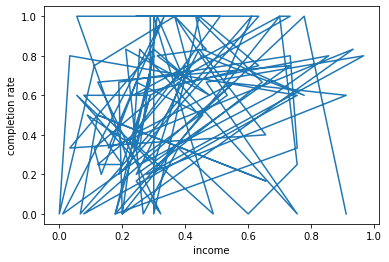

In [153]:
import matplotlib.pyplot as plt
income = df_scaled['income'].values
rate = df_scaled['completion rate'].values
plt.plot(income[:100], rate[:100])
plt.xlabel('income')
plt.ylabel('completion rate')
plt.show()


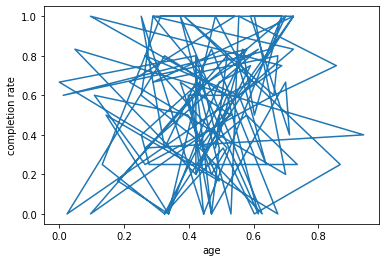

In [155]:
age = df_scaled['age'].values
rate = df_scaled['completion rate'].values
plt.plot(age[:100], rate[:100])
plt.xlabel('age')
plt.ylabel('completion rate')
plt.show()

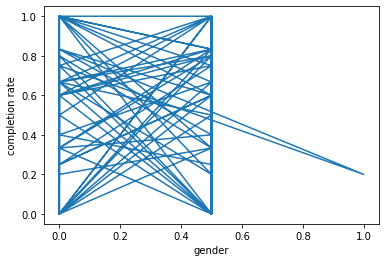

In [156]:
gender = df_scaled['gender'].values
rate = df_scaled['completion rate'].values
plt.plot(gender[:100], rate[:100])
plt.xlabel('gender')
plt.ylabel('completion rate')
plt.show()

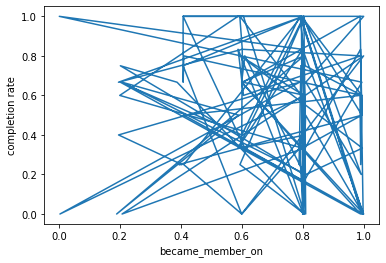

In [157]:
became_member_on = df_scaled['became_member_on'].values
rate = df_scaled['completion rate'].values
plt.plot(became_member_on[:100], rate[:100])
plt.xlabel('became_member_on')
plt.ylabel('completion rate')
plt.show()

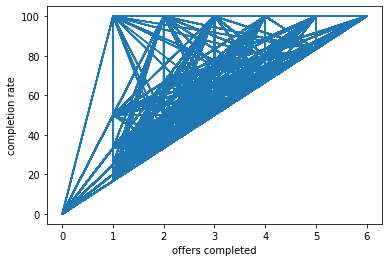

In [199]:
offers_completed = df2['offers completed'].values
rate = df2['completion rate'].values
plt.plot(offers_completed, rate)
plt.xlabel('offers completed')
plt.ylabel('completion rate')
plt.show()

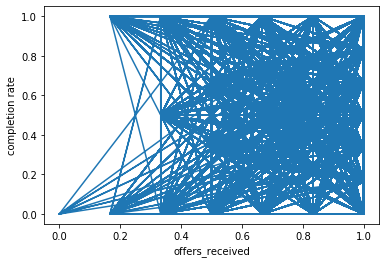

In [160]:
offers_received = df_scaled['offers received'].values
rate = df_scaled['completion rate'].values
plt.plot(offers_received, rate)
plt.xlabel('offers_received')
plt.ylabel('completion rate')
plt.show()

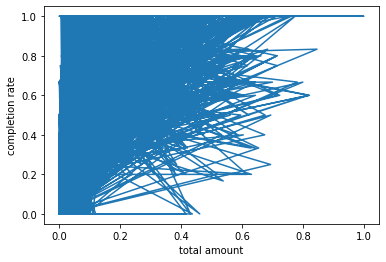

In [164]:
total_amount = df_scaled['total amount'].values
rate = df_scaled['completion rate'].values
plt.plot(total_amount, rate)
plt.xlabel('total amount')
plt.ylabel('completion rate')
plt.show()

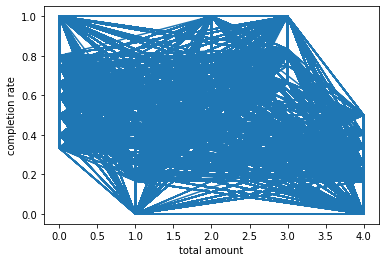

In [171]:
total_amount = df_scaled['cluster_kmeans'].values
rate = df_scaled['completion rate'].values
plt.plot(total_amount, rate)
plt.xlabel('total amount')
plt.ylabel('completion rate')
plt.show()

In [187]:
from sklearn.decomposition import PCA

pca = PCA(n_components=15)

principalComponents = pca.fit_transform(df_scaled)

pca_score = pca.explained_variance_ratio_


In [188]:
s = pd.DataFrame(pca_score)
v = pd.DataFrame(pca.components_)
print(s)
print(pca_score)
n_principal_components = 5
N_COMPONENTS=15

start_idx = N_COMPONENTS - n_principal_components  # 16-n

# print a selection of s
print(s.iloc[:5, :])

           0
0   0.834944
1   0.035175
2   0.024287
3   0.022861
4   0.022462
5   0.015729
6   0.014885
7   0.011174
8   0.007093
9   0.005778
10  0.002063
11  0.001880
12  0.001080
13  0.000555
14  0.000036
[8.34944391e-01 3.51748847e-02 2.42871694e-02 2.28609758e-02
 2.24615965e-02 1.57286033e-02 1.48845583e-02 1.11738994e-02
 7.09306299e-03 5.77807547e-03 2.06252392e-03 1.87978593e-03
 1.07978372e-03 5.54561842e-04 3.61277455e-05]
          0
0  0.834944
1  0.035175
2  0.024287
3  0.022861
4  0.022462


In [189]:
def explained_variance(s, n_top_components):
    '''Calculates the approx. data variance that n_top_components captures.
       :param s: A dataframe of singular values for top components; 
           the top value is in the last row.
       :param n_top_components: An integer, the number of top components to use.
       :return: The expected data variance covered by the n_top_components.'''
    
    # calculate approx variance
    exp_variance = np.square(s.iloc[:n_top_components,:]).sum()/np.square(s).sum()
    
    return exp_variance[0]

n_top_components = 1 # select a value for the number of top components

# calculate the explained variance
exp_variance = explained_variance(s, n_top_components)
print('Explained variance: ', exp_variance)

Explained variance:  0.9949462290119753


Features: 
 ['gender' 'age' 'became_member_on' 'income' 'bogo' 'informational'
 'discount' 'offers completed' 'offers received' 'total amount' 'mobile'
 'web' 'social' 'completion rate' 'likeliness']


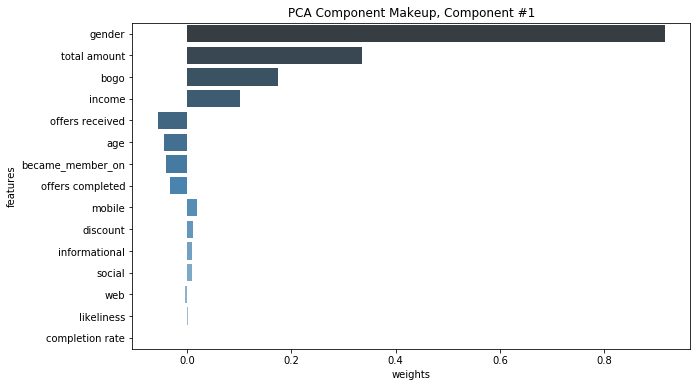

In [190]:
features_list = df_scaled.columns.values
print('Features: \n', features_list)

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns


def display_component(v, features_list, component_num, n_weights=10):
    
    # get index of component (last row - component_num)
    row_idx = N_COMPONENTS-component_num

    # get the list of weights from a row in v, dataframe
    v_1_row = v.iloc[:, row_idx]
    v_1 = np.squeeze(v_1_row.values)

    # match weights to features in counties_scaled dataframe, using list comporehension
    comps = pd.DataFrame(list(zip(v_1, features_list)), 
                         columns=['weights', 'features'])

    # we'll want to sort by the largest n_weights
    # weights can be neg/pos and we'll sort by magnitude
    comps['abs_weights']=comps['weights'].apply(lambda x: np.abs(x))
    sorted_weight_data = comps.sort_values('abs_weights', ascending=False).head(n_weights)

    # display using seaborn
    ax=plt.subplots(figsize=(10,6))
    ax=sns.barplot(data=sorted_weight_data, 
                   x="weights", 
                   y="features", 
                   palette="Blues_d")
    ax.set_title("PCA Component Makeup, Component #" + str(component_num))
    plt.show()
    
num=1
display_component(v, df_scaled.columns.values, component_num=num, n_weights=16)


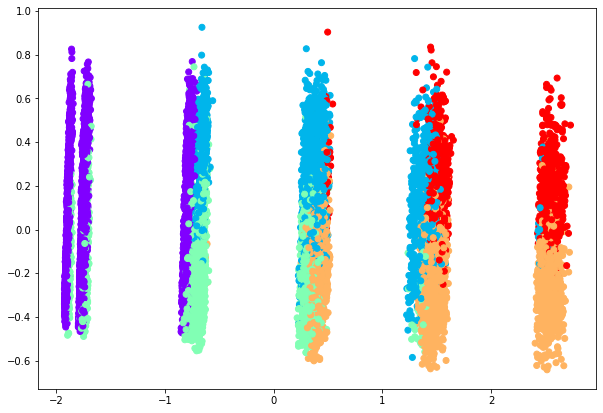

In [194]:
def create_transformed_df(v, df_scaled, n_top_components):
    ''' Return a dataframe of data points with component features. 
        The dataframe should be indexed by State-County and contain component values.
        :param train_pca: A list of pca training data, returned by a PCA model.
        :param counties_scaled: A dataframe of normalized, original features.
        :param n_top_components: An integer, the number of top components to use.
        :return: A dataframe, indexed by State-County, with n_top_component values as columns.        
     '''
    # create new dataframe to add data to
    data_transformed=pd.DataFrame(v)

    # for each of our new, transformed data points
    # append the component values to the dataframe
    # index by county, just like counties_scaled
    data_transformed.index=df_scaled.index

    # keep only the top n components
    data_transformed = data_transformed.iloc[:,:n_top_components]
    
    # reverse columns, component order     
    return data_transformed

top_n = 2

# call your function and create a new dataframe
data_transformed = create_transformed_df(principalComponents, df_scaled, n_top_components=top_n)

# add descriptive columns
#PCA_list=['c_1', 'c_2', 'c_3', 'c_4', 'c_5', 'c_6', 'c_7', 'c_8', 'c_9', 'c_10', 'c_11', 'c_12', 'c_13', 'c_14', 'c_15', 'c_16' ]
PCA_list=['c_1', 'c_2']
data_transformed.columns=PCA_list 

# print result
data_transformed

plt.figure(figsize=(10, 7))
plt.scatter(data_transformed['c_1'], data_transformed['c_2'], c=cluster.labels_, cmap='rainbow')

In [195]:
df2

gender  age  became_member_on    income  \
person                                                                      
0610b486422d4921ae7d2bf64640c50b       1   55          20170715  112000.0   
78afa995795e4d85b5d9ceeca43f5fef       1   75          20170509  100000.0   
e2127556f4f64592b11af22de27a7932       0   68          20180426   70000.0   
389bc3fa690240e798340f5a15918d5c       0   65          20180209   53000.0   
2eeac8d8feae4a8cad5a6af0499a211d       0   58          20171111   51000.0   
...                                  ...  ...               ...       ...   
6d5f3a774f3d4714ab0c092238f3a1d7       1   45          20180604   54000.0   
2cb4f97358b841b9a9773a7aa05a9d77       0   61          20180713   72000.0   
01d26f638c274aa0b965d24cefe3183f       0   49          20170126   73000.0   
9dc1421481194dcd9400aec7c9ae6366       1   83          20160307   50000.0   
e4052622e5ba45a8b96b59aba68cf068       1   62          20170722   82000.0   

                                  bogo  informational  discount  \
person                                                            
0610b486422d4921ae7d2bf64640c50b   0.0            0.0       0.0   
78afa995795e4d85b5d9ceeca43f5fef   3.0            1.0       0.0   
e2127556f4f64592b11af22de27a7932   1.0            0.0       1.0   
389bc3fa690240e798340f5a15918d5c   3.0            0.0       2.0   
2eeac8d8feae4a8cad5a6af0499a211d   0.0            0.0       1.0   
...                                ...            ...       ...   
6d5f3a774f3d4714ab0c092238f3a1d7   0.0            1.0       0.0   
2cb4f97358b841b9a9773a7aa05a9d77   0.0            1.0       0.0   
01d26f638c274aa0b965d24cefe3183f   0.0            1.0       0.0   
9dc1421481194dcd9400aec7c9ae6366   3.0            0.0       0.0   
e4052622e5ba45a8b96b59aba68cf068   1.0            0.0       1.0   

                                  offers completed  offers received  \
person                                                                
0610b486422d4921ae7d2bf64640c50b               0.0              2.0   
78afa995795e4d85b5d9ceeca43f5fef               4.0              4.0   
e2127556f4f64592b11af22de27a7932               2.0              4.0   
389bc3fa690240e798340f5a15918d5c               5.0              6.0   
2eeac8d8feae4a8cad5a6af0499a211d               1.0              3.0   
...                                            ...              ...   
6d5f3a774f3d4714ab0c092238f3a1d7               1.0              3.0   
2cb4f97358b841b9a9773a7aa05a9d77               1.0              3.0   
01d26f638c274aa0b965d24cefe3183f               1.0              3.0   
9dc1421481194dcd9400aec7c9ae6366               3.0              3.0   
e4052622e5ba45a8b96b59aba68cf068               2.0              4.0   

                                  total amount  mobile  web  social  \
person                                                                
0610b486422d4921ae7d2bf64640c50b            76     0.0  0.0     0.0   
78afa995795e4d85b5d9ceeca43f5fef           154     4.0  2.0     3.0   
e2127556f4f64592b11af22de27a7932            56     2.0  2.0     1.0   
389bc3fa690240e798340f5a15918d5c            35     5.0  5.0     3.0   
2eeac8d8feae4a8cad5a6af0499a211d            14     1.0  1.0     1.0   
...                                        ...     ...  ...     ...   
6d5f3a774f3d4714ab0c092238f3a1d7            16     1.0  0.0     1.0   
2cb4f97358b841b9a9773a7aa05a9d77            22     1.0  0.0     1.0   
01d26f638c274aa0b965d24cefe3183f            36     1.0  0.0     1.0   
9dc1421481194dcd9400aec7c9ae6366           184     3.0  2.0     2.0   
e4052622e5ba45a8b96b59aba68cf068           140     2.0  2.0     2.0   

                                  completion rate  
person                                             
0610b486422d4921ae7d2bf64640c50b         0.000000  
78afa995795e4d85b5d9ceeca43f5fef       100.000000  
e2127556f4f64592b11af22de27a7932        50.000000  
389bc3fa690240e798340f5a15918d5c        83.333333  


In [197]:
complete

person                          offer_id  \
0      0009655768c64bdeb2e877511632db8f  f19421c1d4aa40978ebb69ca19b0e20d   
1      0009655768c64bdeb2e877511632db8f  fafdcd668e3743c1bb461111dcafc2a4   
2      0011e0d4e6b944f998e987f904e8c1e5  2298d6c36e964ae4a3e7e9706d1fb8c2   
3      0011e0d4e6b944f998e987f904e8c1e5  0b1e1539f2cc45b7b9fa7c272da2e1d7   
4      0011e0d4e6b944f998e987f904e8c1e5  9b98b8c7a33c4b65b9aebfe6a799e6d9   
...                                 ...                               ...   
35268  ffd810f301ad42d6bfe98c4ba6ee4125  3f207df678b143eea3cee63160fa8bed   
35269  ffeaa02452ef451082a0361c3ca62ef5  5a8bc65990b245e5a138643cd4eb9837   
35270  ffeaa02452ef451082a0361c3ca62ef5  5a8bc65990b245e5a138643cd4eb9837   
35271  fff0f0aac6c547b9b263080f09a5586a  3f207df678b143eea3cee63160fa8bed   
35272  fffad4f4828548d1b5583907f2e9906b  5a8bc65990b245e5a138643cd4eb9837   

       time_x  time_y   time     offer_type  duration  web  mobile  social  
0         408   456.0  414.0           bogo         5    1       1       1  
1         504   540.0  528.0       discount        10    1       1       1  
2         168   186.0  252.0       discount         7    1       1       1  
3         408   432.0  576.0       discount        10    1       0       0  
4         504   516.0  576.0           bogo         7    1       1       0  
...       ...     ...    ...            ...       ...  ...     ...     ...  
35268     336   342.0  432.0  informational         4    1       1       0  
35269     168   198.0  240.0  informational         3    0       1       1  
35270     408   420.0  480.0  informational         3    0       1       1  
35271     576   636.0  672.0  informational         4    1       1       0  
35272     168   168.0  240.0  informational         3    0       1       1  

[35273 rows x 10 columns]

In [198]:
cleaned_transcript

person            event  time  amount  \
0       78afa995795e4d85b5d9ceeca43f5fef   offer received     0       0   
2       e2127556f4f64592b11af22de27a7932   offer received     0       0   
5       389bc3fa690240e798340f5a15918d5c   offer received     0       0   
7       2eeac8d8feae4a8cad5a6af0499a211d   offer received     0       0   
8       aa4862eba776480b8bb9c68455b8c2e1   offer received     0       0   
...                                  ...              ...   ...     ...   
306527  24f56b5e1849462093931b164eb803b5  offer completed   714       0   
306529  b3a1272bc9904337b331bf348c3e8c17      transaction   714       1   
306530  68213b08d99a4ae1b0dcb72aebd9aa35      transaction   714       9   
306531  a00058cf10334a308c68e7631c529907      transaction   714       3   
306532  76ddbd6576844afe811f1a3c0fbb5bec      transaction   714       3   

                                offer_id  
0       9b98b8c7a33c4b65b9aebfe6a799e6d9  
2       2906b810c7d4411798c6938adc9daaa5  
5       f19421c1d4aa40978ebb69ca19b0e20d  
7       3f207df678b143eea3cee63160fa8bed  
8       0b1e1539f2cc45b7b9fa7c272da2e1d7  
...                                  ...  
306527  fafdcd668e3743c1bb461111dcafc2a4  
306529                                 0  
306530                                 0  
306531                                 0  
306532                                 0  

[272762 rows x 5 columns]

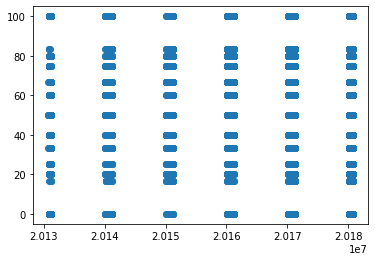

In [215]:
from matplotlib import pyplot
pyplot.scatter(df2['became_member_on'], df2['completion rate'])
pyplot.show()


In [90]:
from sklearn.cluster import KMeans
X = df_scaled.values
km = KMeans(
    n_clusters=5, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

In [92]:

# plot the 3 clusters
plt.scatter(
    X[y_km == 0, 13], X[y_km == 0, 14],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='label 0'
)

plt.scatter(
    X[y_km == 1, 13], X[y_km == 1, 14],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='label 1'
)

plt.scatter(
    X[y_km == 2, 13], X[y_km == 2, 14],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='label 2'
)

plt.scatter(
    X[y_km == 3, 13], X[y_km == 3, 14],
    s=50, c='blue',
    marker='x', edgecolor='black',
    label='label 3'
)
plt.scatter(
    X[y_km == 4, 13], X[y_km == 4, 14],
    s=50, c='blue',
    marker='p', edgecolor='black',
    label='label 4'
)

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

IndexError: index 13 is out of bounds for axis 1 with size 12

In [229]:
from sklearn.datasets import make_blobs
X, y = make_blobs(
   n_samples=150, n_features=2,
   centers=3, cluster_std=0.5,
   shuffle=True, random_state=0
)
X.shape

(150, 2)

In [279]:
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
from sklearn.cluster import KMeans 

X = df_scaled.copy()

kmeans = KMeans(n_clusters=5)

kmeans.fit(X)

clusters = kmeans.predict(X)

print(clusters)

X["Cluster"] = clusters

pca_1d = PCA(n_components=1)

#PCA with two principal components
pca_2d = PCA(n_components=2)

#PCA with three principal components
pca_3d = PCA(n_components=3)

PCs_1d = pd.DataFrame(pca_1d.fit_transform(X.drop(["Cluster"], axis=1)))
#This DataFrame contains the two principal components that will be used
#for the 2-D visualization mentioned above
PCs_2d = pd.DataFrame(pca_2d.fit_transform(X.drop(["Cluster"], axis=1)))

#And this DataFrame contains three principal components that will aid us
#in visualizing our clusters in 3-D
PCs_3d = pd.DataFrame(pca_3d.fit_transform(X.drop(["Cluster"], axis=1)))

X.reset_index(inplace = True, drop = True)
X

[2 3 1 ... 1 3 0]


gender       age  became_member_on    income      bogo  informational  \
0         0.5  0.445783          0.799768  0.911111  0.000000            0.0   
1         0.5  0.686747          0.795648  0.777778  0.500000            0.2   
2         0.0  0.602410          0.994000  0.444444  0.166667            0.0   
3         0.0  0.566265          0.989659  0.255556  0.500000            0.0   
4         0.0  0.481928          0.807688  0.233333  0.000000            0.0   
...       ...       ...               ...       ...       ...            ...   
14820     0.5  0.325301          0.997560  0.266667  0.000000            0.2   
14821     0.0  0.518072          0.999740  0.466667  0.000000            0.2   
14822     0.0  0.373494          0.787987  0.477778  0.000000            0.2   
14823     0.5  0.783133          0.591595  0.222222  0.500000            0.0   
14824     0.5  0.530120          0.799908  0.577778  0.166667            0.0   

       discount  offers completed  offers received  total amount    mobile  \
0           0.0          0.000000         0.333333      0.047323  0.000000   
1           0.0          0.666667         0.666667      0.095890  0.666667   
2           0.2          0.333333         0.666667      0.034869  0.333333   
3           0.4          0.833333         1.000000      0.021793  0.833333   
4           0.2          0.166667         0.500000      0.008717  0.166667   
...         ...               ...              ...           ...       ...   
14820       0.0          0.166667         0.500000      0.009963  0.166667   
14821       0.0          0.166667         0.500000      0.013699  0.166667   
14822       0.0          0.166667         0.500000      0.022416  0.166667   
14823       0.0          0.500000         0.500000      0.114570  0.500000   
14824       0.2          0.333333         0.666667      0.087173  0.333333   

            web    social  completion rate  likeliness  Cluster  
0      0.000000  0.000000         0.000000           0        2  
1      0.333333  0.500000         1.000000           3        3  
2      0.333333  0.166667         0.500000           1        1  
3      0.833333  0.500000         0.833333           3        3  
4      0.166667  0.166667         0.333333           1        1  
...         ...       ...              ...         ...      ...  
14820  0.000000  0.166667         0.333333           1        1  
14821  0.000000  0.166667         0.333333           1        1  
14822  0.000000  0.166667         0.333333           1        1  
14823  0.333333  0.333333         1.000000           3        3  
14824  0.333333  0.333333         0.500000           2        0  

[14825 rows x 16 columns]

In [280]:
PCs_1d.columns = ["PC1_1d"]

#"PC1_2d" means: 'The first principal component of the components created for 2-D visualization, by PCA.'
#And "PC2_2d" means: 'The second principal component of the components created for 2-D visualization, by PCA.'
PCs_2d.columns = ["PC1_2d", "PC2_2d"]

PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]

In [281]:
X = pd.concat([X,PCs_1d,PCs_2d,PCs_3d], axis=1, join='inner')
X

gender       age  became_member_on    income      bogo  informational  \
0         0.5  0.445783          0.799768  0.911111  0.000000            0.0   
1         0.5  0.686747          0.795648  0.777778  0.500000            0.2   
2         0.0  0.602410          0.994000  0.444444  0.166667            0.0   
3         0.0  0.566265          0.989659  0.255556  0.500000            0.0   
4         0.0  0.481928          0.807688  0.233333  0.000000            0.0   
...       ...       ...               ...       ...       ...            ...   
14820     0.5  0.325301          0.997560  0.266667  0.000000            0.2   
14821     0.0  0.518072          0.999740  0.466667  0.000000            0.2   
14822     0.0  0.373494          0.787987  0.477778  0.000000            0.2   
14823     0.5  0.783133          0.591595  0.222222  0.500000            0.0   
14824     0.5  0.530120          0.799908  0.577778  0.166667            0.0   

       discount  offers completed  offers received  total amount  ...  \
0           0.0          0.000000         0.333333      0.047323  ...   
1           0.0          0.666667         0.666667      0.095890  ...   
2           0.2          0.333333         0.666667      0.034869  ...   
3           0.4          0.833333         1.000000      0.021793  ...   
4           0.2          0.166667         0.500000      0.008717  ...   
...         ...               ...              ...           ...  ...   
14820       0.0          0.166667         0.500000      0.009963  ...   
14821       0.0          0.166667         0.500000      0.013699  ...   
14822       0.0          0.166667         0.500000      0.022416  ...   
14823       0.0          0.500000         0.500000      0.114570  ...   
14824       0.2          0.333333         0.666667      0.087173  ...   

         social  completion rate  likeliness  Cluster    PC1_1d    PC1_2d  \
0      0.000000         0.000000           0        2 -1.862814 -1.862814   
1      0.500000         1.000000           3        3  1.491012  1.491012   
2      0.166667         0.500000           1        1 -0.656438 -0.656438   
3      0.500000         0.833333           3        3  1.571983  1.571983   
4      0.166667         0.333333           1        1 -0.792902 -0.792902   
...         ...              ...         ...      ...       ...       ...   
14820  0.166667         0.333333           1        1 -0.821418 -0.821418   
14821  0.166667         0.333333           1        1 -0.826039 -0.826039   
14822  0.166667         0.333333           1        1 -0.819846 -0.819846   
14823  0.333333         1.000000           3        3  1.394614  1.394614   
14824  0.333333         0.500000           2        0  0.306819  0.306819   

         PC2_2d    PC1_3d    PC2_3d    PC3_3d  
0      0.611470 -1.862814  0.611470  0.149967  
1      0.471909  1.491012  0.471909 -0.040165  
2     -0.001957 -0.656438 -0.001957 -0.039131  
3     -0.235456  1.571983 -0.235456 -0.229124  
4     -0.181443 -0.792902 -0.181443  0.024704  
...         ...       ...       ...       ...  
14820  0.154171 -0.821418  0.154171 -0.360936  
14821 -0.026001 -0.826039 -0.026001 -0.087347  
14822 -0.092358 -0.819846 -0.092358  0.055410  
14823  0.207600  1.394614  0.207600  0.009885  
14824  0.344118  0.306819  0.344118 -0.051617  

[14825 rows x 22 columns]

In [282]:
X["dummy"] = 0


In [283]:
cluster0 = X[X["Cluster"] == 0]
cluster1 = X[X["Cluster"] == 1]
cluster2 = X[X["Cluster"] == 2]
cluster3 = X[X["Cluster"] == 3]
cluster4 = X[X["Cluster"] == 4]

In [278]:
cluster4

gender       age  became_member_on    income      bogo  informational  \
7         0.5  0.530120          0.589675  0.455556  0.000000            0.0   
8         0.0  0.373494          0.207692  0.244444  0.166667            0.2   
12        0.0  0.554217          0.803648  0.777778  0.166667            0.2   
15        0.5  0.457831          0.994040  0.644444  0.166667            0.0   
18        0.0  0.493976          0.387863  0.122222  0.000000            0.4   
...       ...       ...               ...       ...       ...            ...   
14805     0.5  0.493976          0.587715  0.455556  0.166667            0.0   
14809     0.5  0.542169          0.003860  0.244444  0.500000            0.0   
14812     0.5  0.686747          0.599776  0.533333  0.333333            0.0   
14815     0.0  0.469880          0.599636  0.111111  0.166667            0.2   
14824     0.5  0.530120          0.799908  0.577778  0.166667            0.0   

       discount  offers completed  offers received  total amount  ...  \
7           0.6          0.500000         1.000000      0.097136  ...   
8           0.0          0.333333         0.500000      0.087173  ...   
12          0.2          0.500000         0.833333      0.130137  ...   
15          0.6          0.666667         1.000000      0.046077  ...   
18          0.4          0.666667         1.000000      0.028643  ...   
...         ...               ...              ...           ...  ...   
14805       0.4          0.500000         0.833333      0.090909  ...   
14809       0.0          0.500000         0.833333      0.032379  ...   
14812       0.2          0.500000         0.833333      0.094022  ...   
14815       0.0          0.333333         0.500000      0.080946  ...   
14824       0.2          0.333333         0.666667      0.087173  ...   

       completion rate  likeliness  Cluster         0         0         1  \
7             0.500000           2        4  0.438708  0.438708  0.209815   
8             0.666667           2        4  0.273908  0.273908 -0.316949   
12            0.600000           2        4  0.340487  0.340487  0.089537   
15            0.666667           2        4  0.462856  0.462856  0.350823   
18            0.666667           2        4  0.480986  0.480986 -0.397839   
...                ...         ...      ...       ...       ...       ...   
14805         0.600000           2        4  0.432625  0.432625  0.225401   
14809         0.600000           2        4  0.412366  0.412366  0.089174   
14812         0.600000           2        4  0.405608  0.405608  0.344978   
14815         0.666667           2        4  0.259808  0.259808 -0.312447   
14824         0.500000           2        4  0.306819  0.306819  0.344118   

              0         1         2  dummy  
7      0.438708  0.209815  0.072692      0  
8      0.273908 -0.316949  0.397359      0  
12     0.340487  0.089537  0.151445      0  
15     0.462856  0.350823 -0.181269      0  
18     0.480986 -0.397839  0.187939      0  
...         ...       ...       ...    ...  
14805  0.432625  0.225401  0.071503      0  
14809  0.412366  0.089174  0.433572      0  
14812  0.405608  0.344978  0.089496      0  
14815  0.259808 -0.312447  0.068771      0  
14824  0.306819  0.344118 -0.051617      0  

[3622 rows x 23 columns]

In [285]:
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#Instructions for building the 1-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_1d"],
                    y = cluster0["dummy"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_1d"],
                    y = cluster1["dummy"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_1d"],
                    y = cluster2["dummy"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)
trace4 = go.Scatter(
                    x = cluster3["PC1_1d"],
                    y = cluster3["dummy"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'rgba(120, 255, 200, 0.8)'),
                    text = None)

trace5 = go.Scatter(
                    x = cluster4["PC1_1d"],
                    y = cluster4["dummy"],
                    mode = "markers",
                    name = "Cluster 4",
                    marker = dict(color = 'rgba(255, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3, trace4, trace5]

title = "Visualizing Clusters in One Dimension Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= '',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [286]:

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_2d"],
                    y = cluster0["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_2d"],
                    y = cluster1["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_2d"],
                    y = cluster2["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

trace4 = go.Scatter(
                    x = cluster3["PC1_2d"],
                    y = cluster3["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'rgba(120, 255, 200, 0.8)'),
                    text = None)

trace5 = go.Scatter(
                    x = cluster4["PC1_2d"],
                    y = cluster4["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 4",
                    marker = dict(color = 'rgba(255, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3, trace4, trace5]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [20]:
df2 = pd.DataFrame()
df2 = pd.read_csv('explore/complete_profile.csv',  index_col=[0])
df2

person  gender  age  became_member_on  \
0      0610b486422d4921ae7d2bf64640c50b     1.0   55          20170715   
1      78afa995795e4d85b5d9ceeca43f5fef     1.0   75          20170509   
2      e2127556f4f64592b11af22de27a7932     0.0   68          20180426   
3      389bc3fa690240e798340f5a15918d5c     0.0   65          20180209   
4      2eeac8d8feae4a8cad5a6af0499a211d     0.0   58          20171111   
...                                 ...     ...  ...               ...   
14820  6d5f3a774f3d4714ab0c092238f3a1d7     1.0   45          20180604   
14821  2cb4f97358b841b9a9773a7aa05a9d77     0.0   61          20180713   
14822  01d26f638c274aa0b965d24cefe3183f     0.0   49          20170126   
14823  9dc1421481194dcd9400aec7c9ae6366     1.0   83          20160307   
14824  e4052622e5ba45a8b96b59aba68cf068     1.0   62          20170722   

         income  bogo  informational  discount  offers completed  \
0      112000.0   0.0            0.0       0.0               0.0   
1      100000.0   3.0            1.0       0.0               4.0   
2       70000.0   1.0            0.0       1.0               2.0   
3       53000.0   3.0            0.0       2.0               5.0   
4       51000.0   0.0            0.0       1.0               1.0   
...         ...   ...            ...       ...               ...   
14820   54000.0   0.0            1.0       0.0               1.0   
14821   72000.0   0.0            1.0       0.0               1.0   
14822   73000.0   0.0            1.0       0.0               1.0   
14823   50000.0   3.0            0.0       0.0               3.0   
14824   82000.0   1.0            0.0       1.0               2.0   

       offers received  total amount  completion rate  
0                  2.0            76         0.000000  
1                  4.0           154       100.000000  
2                  4.0            56        50.000000  
3                  6.0            35        83.333333  
4                  3.0            14        33.333333  
...                ...           ...              ...  
14820              3.0            16        33.333333  
14821              3.0            22        33.333333  
14822              3.0            36        33.333333  
14823              3.0           184       100.000000  
14824              4.0           140        50.000000  

[14825 rows x 12 columns]

In [35]:
df2.corr(method ='pearson') 
df2.drop(['person'],axis=1, inplace=True)

In [79]:
#df2['completion rate'] = df2['completion rate'].astype('float32')
df2['offers received'] = df2['offers received'].fillna(0)
df2['completion rate'] = df2['completion rate'].fillna(0)
df2['gender'] = df2['gender'].fillna(0)
df2.drop(['cluster'], axis=1, inplace=True)

In [128]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7)

#pca.fit(df2)
X = pca.fit_transform(df_scaled.values)

pca_score = pca.explained_variance_ratio_
pca_score.sum()
X.shape

(14825, 7)

In [131]:
from sklearn.cluster import KMeans 

kmeans = KMeans(n_clusters=5, n_init=50)

kmeans.fit(X)

clusters = kmeans.predict(X)

print(kmeans.cluster_centers_)
print(X)

df2["cluster"] = clusters

[[-0.52851639 -0.2326937   0.3308866   0.10243437 -0.0916533   0.00520333
   0.0503732 ]
 [ 0.54815788 -0.07020362 -0.39261038  0.00323652  0.02662568 -0.00494127
   0.00242123]
 [-0.54905798 -0.03710668 -0.29753702 -0.10359127  0.06487197 -0.01720677
  -0.05248167]
 [ 0.57562675 -0.32498751  0.28868398  0.03302522 -0.0236914   0.00396257
  -0.00090776]
 [-0.17420218  0.54500033  0.11507106 -0.02485253  0.0116232   0.01111898
   0.00279129]]
[[ 0.33870131 -0.97894165  0.43765413 ...  0.14115096  0.25377787
  -0.25857352]
 [ 0.89072011  0.11814036  0.51364744 ... -0.12261849  0.21141647
   0.01228466]
 [-0.42539975  0.14885731 -0.34778883 ... -0.23406496  0.07411884
   0.06646328]
 ...
 [-0.56760438 -0.08023418 -0.38710328 ...  0.00320034  0.23107021
  -0.1092616 ]
 [ 0.6798199   0.13431758 -0.30750479 ...  0.12000451  0.36069294
   0.36147369]
 [ 0.4712232  -0.24403214 -0.52843427 ... -0.02211106  0.04744154
  -0.06229868]]


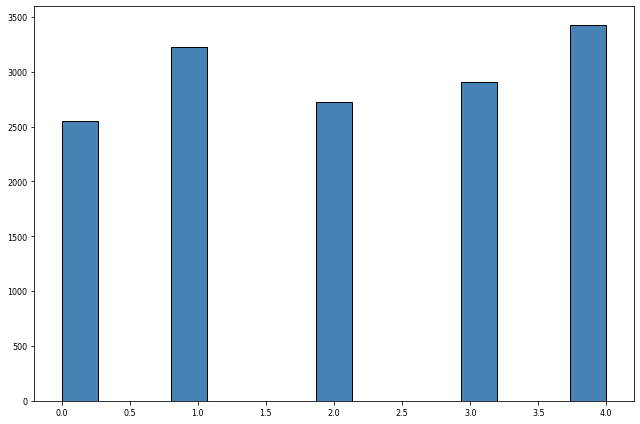

In [132]:
import matplotlib.pyplot as plt
import matplotlib

df2['cluster'].hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.5, 1.5))   

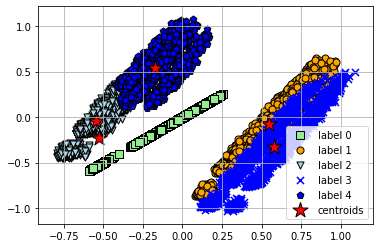

In [137]:
plt.scatter(
    X[clusters == 0, 1], X[clusters == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='label 0'
)

plt.scatter(
    X[clusters == 1, 0], X[clusters == 1, 1],
    s=50, c='orange',
    marker='o', edgecolor='black',
    label='label 1'
)

plt.scatter(
    X[clusters == 2, 0], X[clusters == 2, 1],
    s=50, c='lightblue',
    marker='v', edgecolor='black',
    label='label 2'
)

plt.scatter(
     X[clusters == 3, 0], X[clusters == 3, 1],
    s=50, c='blue',
    marker='x', edgecolor='black',
    label='label 3'
)
plt.scatter(
    X[clusters == 4, 0], X[clusters == 4, 1],    s=50, c='blue',
    marker='p', edgecolor='black',
    label='label 4'
)

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()